### Hourly Coronavirus analytics

The best source of aggregate Covid-19 data i've found is [here](https://ncov2019.live/data); it is consolidated from various sources by [Avi Schiffmann](https://www.linkedin.com/in/avi-schiffmann/). 

Tremendous thanks to Avi for doing all of the scraping and consolidation code.

In [1]:
import pandas as pd
import glob
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_rows', 10000)
import seaborn as sns

In [2]:
pd.__version__

'1.0.1'

In [3]:
def create_df_from_pickle_files(target_dir):
    df = pd.DataFrame()
    for file in glob.glob(target_dir + "/*" ):
        #print(f"processing {file}...")
        fdf = pd.read_pickle(file)
        for i in ['Confirmed', 'Deceased', 'Recovered', 'Serious']:
            fdf[i]= pd.to_numeric(fdf[i])     
        df = pd.concat([df,fdf]) 
    return pd.DataFrame(df)

In [4]:
periods = 1 # hour
data_dir = "./data"
df = create_df_from_pickle_files(data_dir)

df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'],format="%Y-%m-%d:%H:%M:%S") 

df = df.sort_values(['Region','Date'])

In [5]:
df['Percent_Change_Since_Last_Hour'] = df.sort_values('Date').groupby(['Region']).Confirmed.pct_change()

In [6]:
df.set_index('Date',inplace=True)

Below represents aggregate reported infection rates over time in hours. 

Mainland China


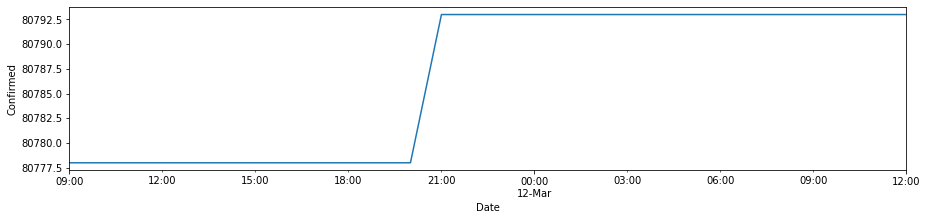

Hubei province (includes Wuhan)


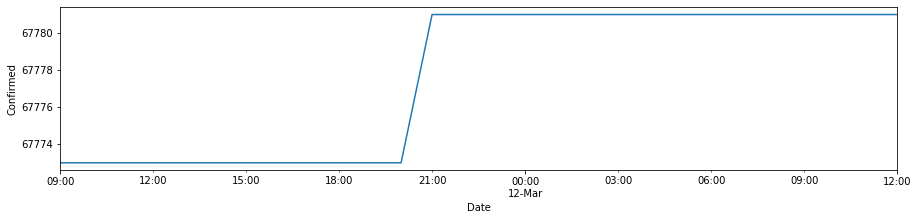

Italy


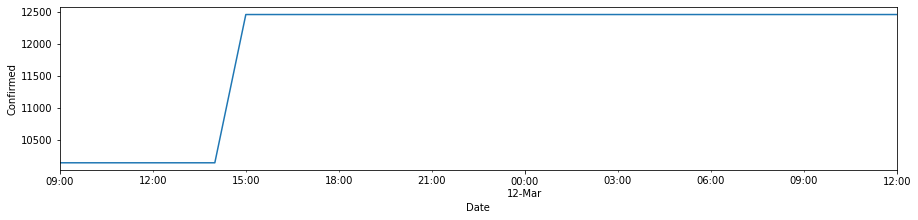

Iran


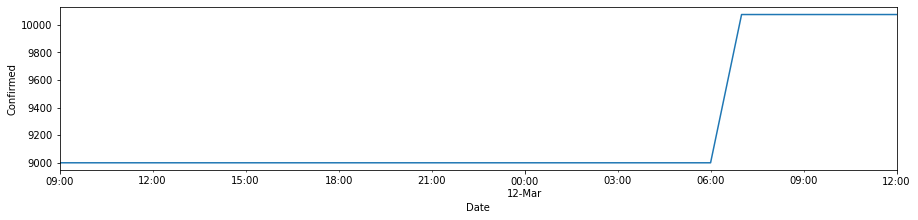

South Korea


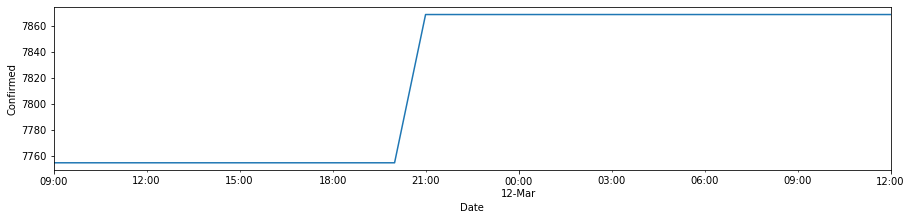

Other regions


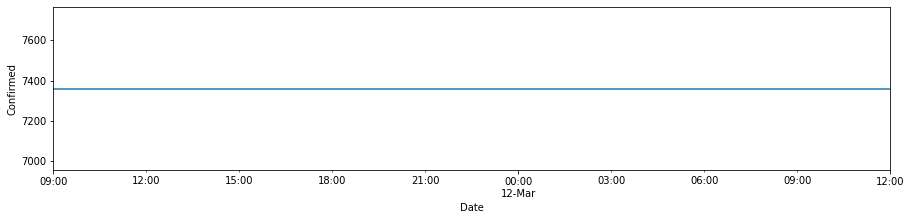

France


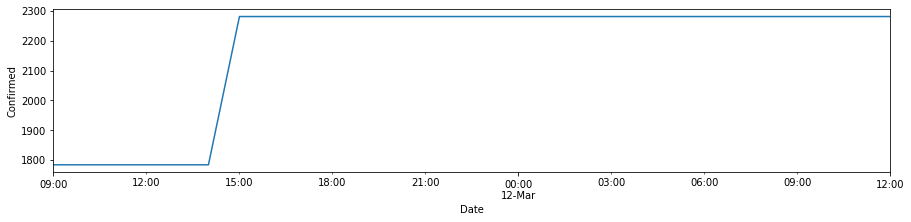

Spain


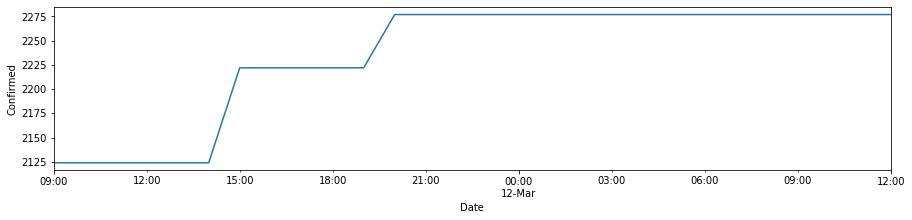

Germany


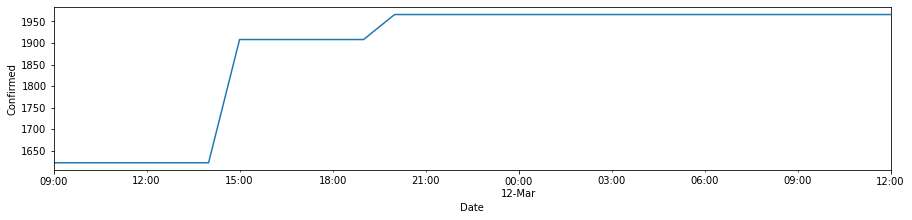

España


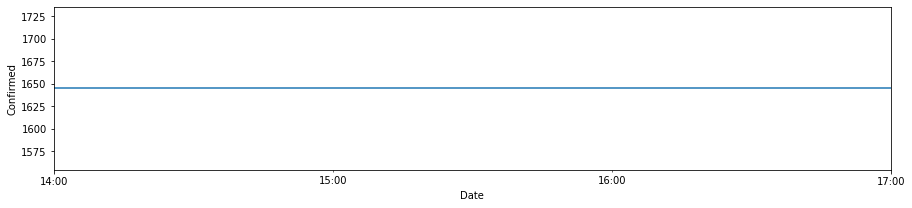

Guangdong province


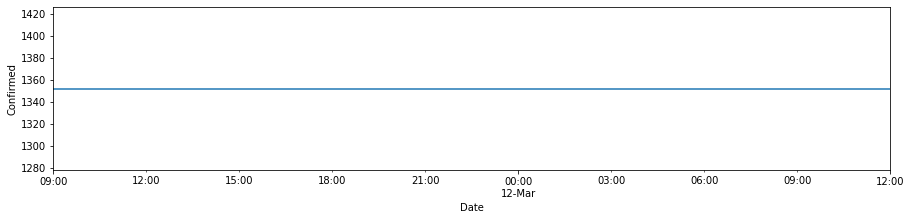

United States


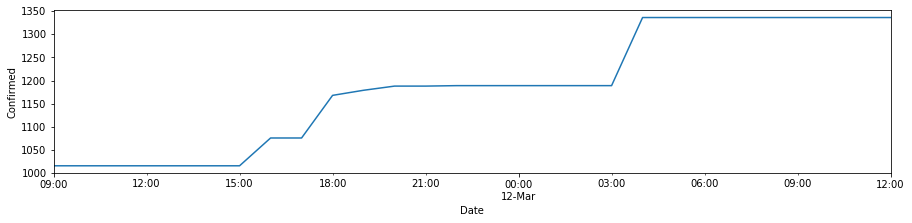

Henan province


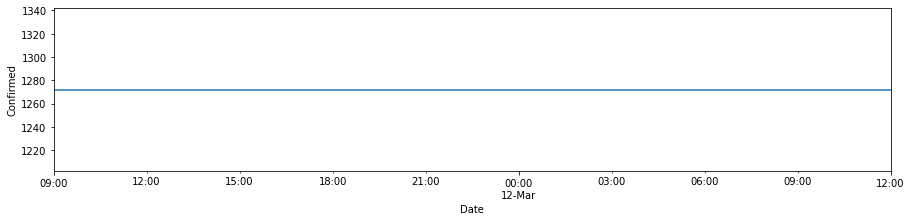

Zhejiang province


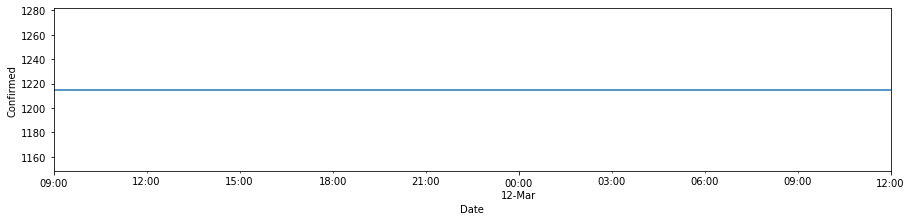

Hunan province


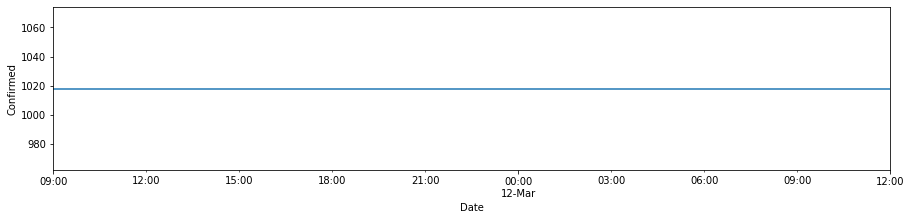

Switzerland


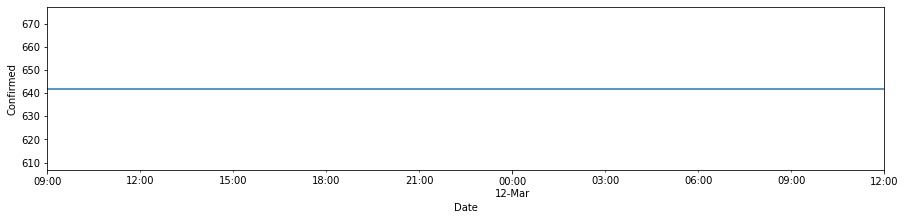

Japan


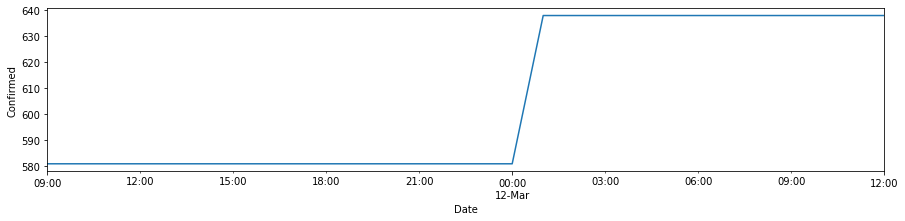

Norway


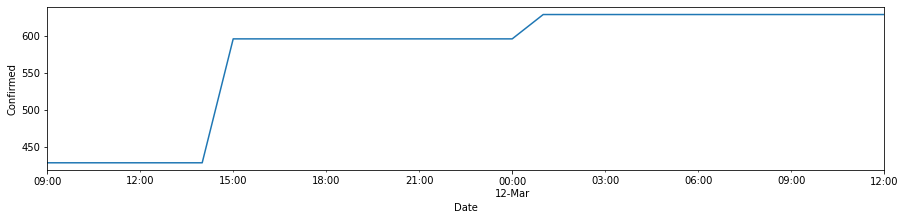

Denmark*


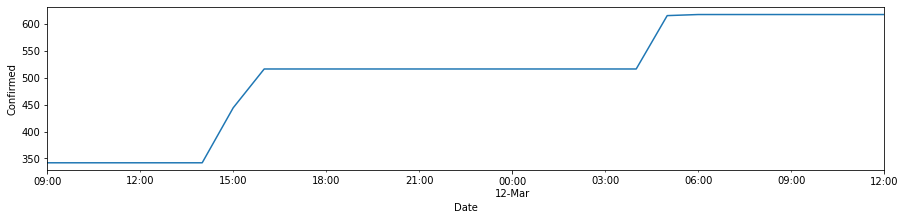

Netherlands


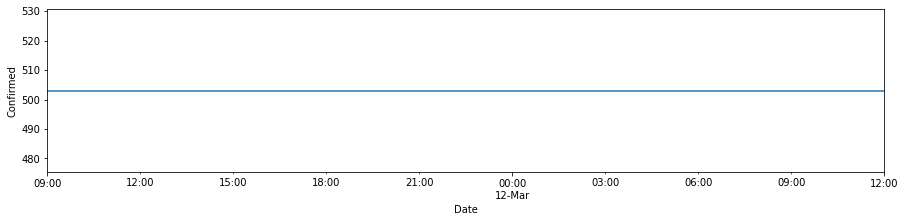

Sweden


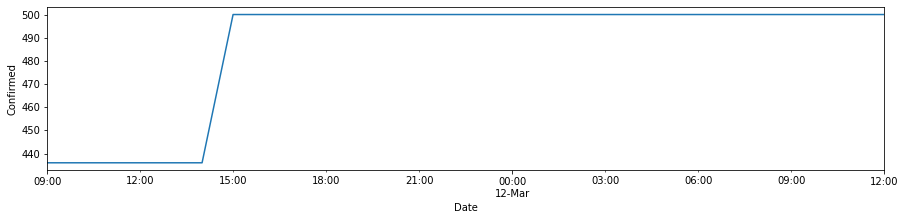

United Kingdom


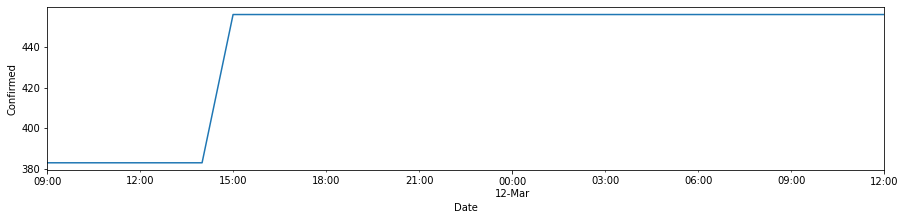

Beijing


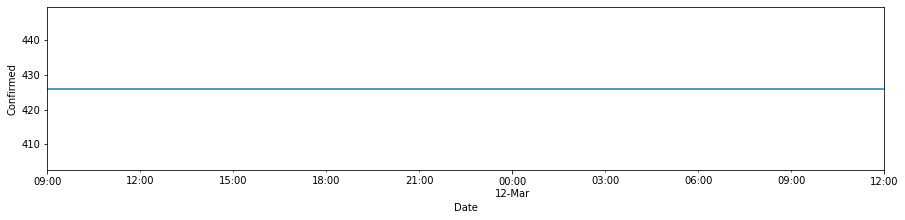

Washington


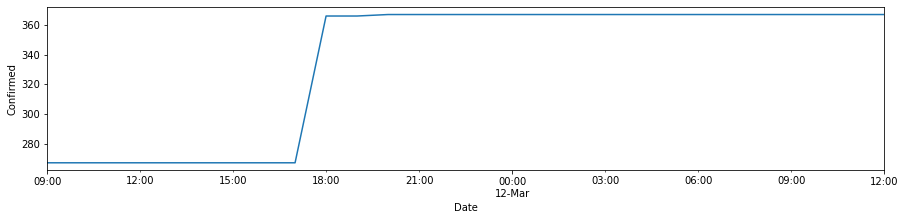

Shanghai


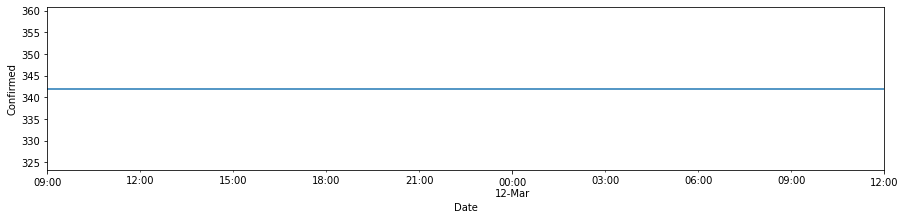

Belgium


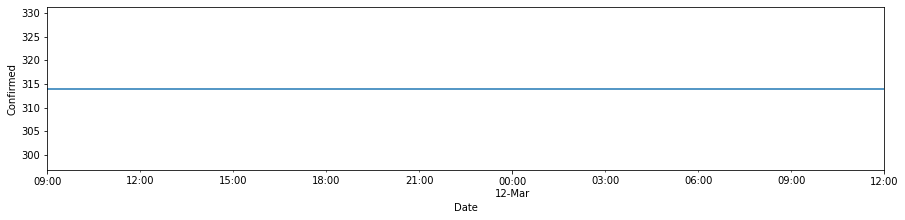

Austria


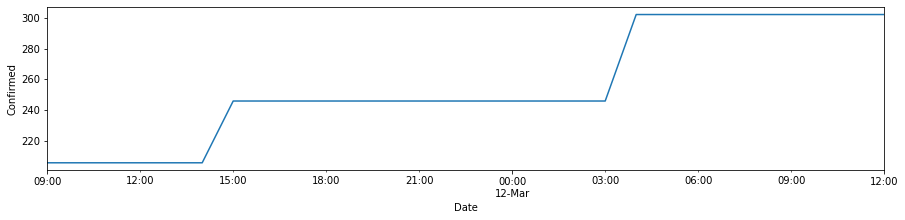

Qatar


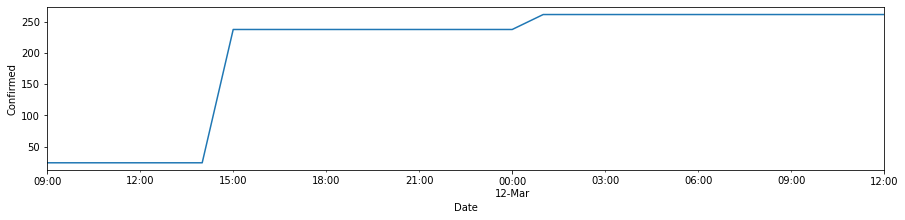

New York


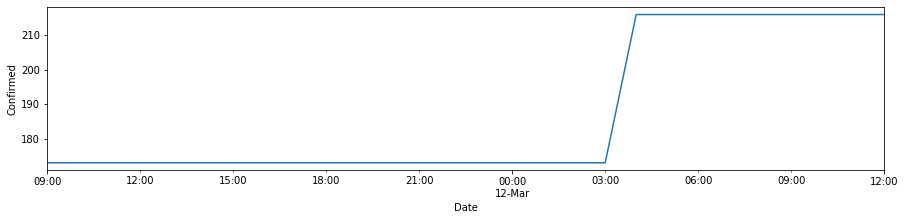

Bahrain


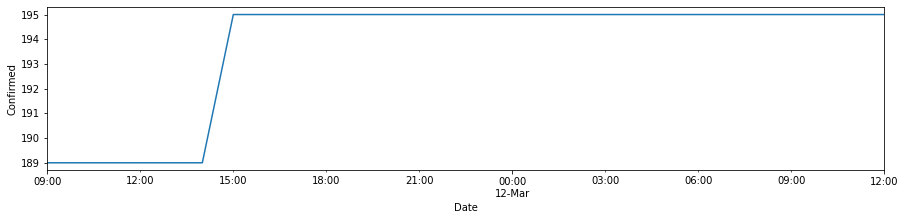

Singapore


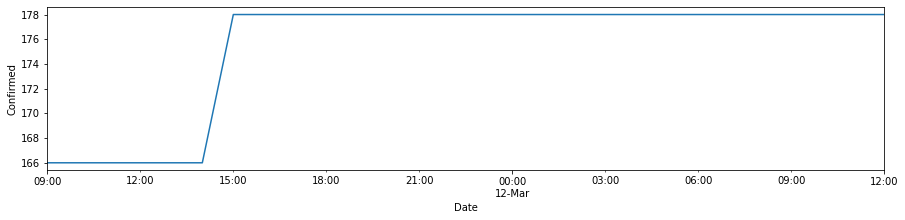

Australia


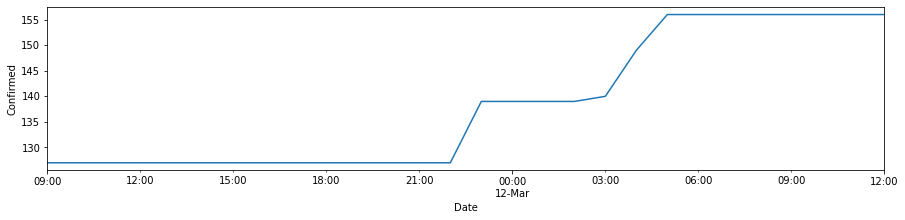

Malaysia


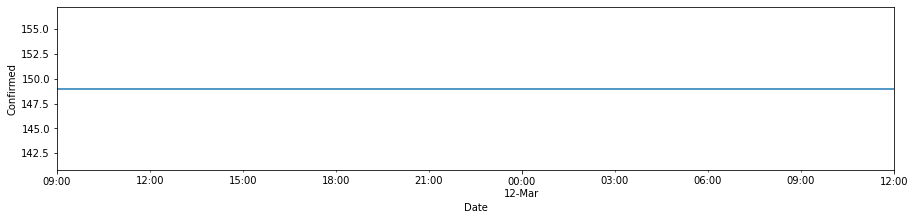

Hong Kong


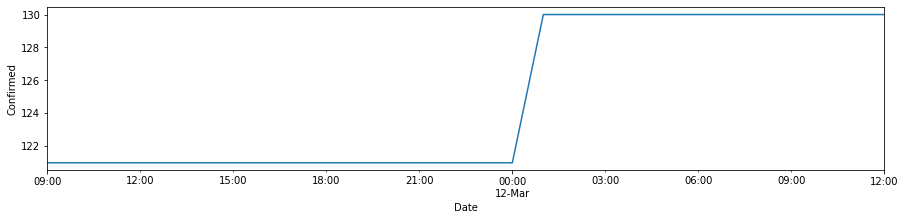

California


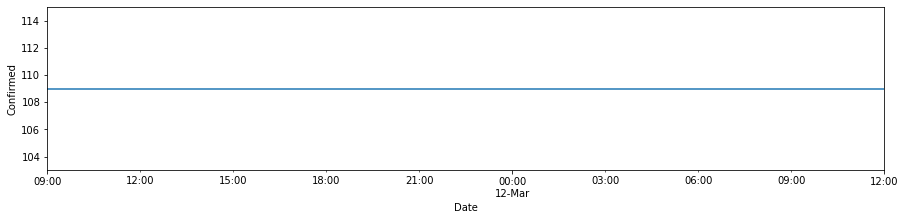

Canada


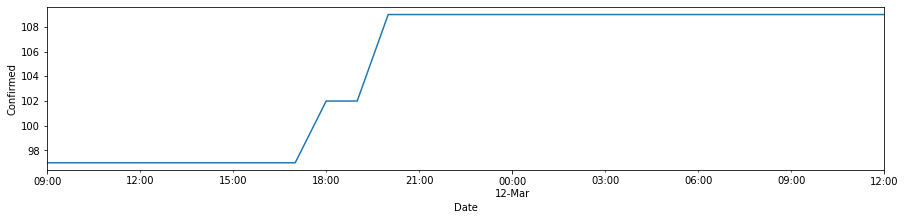

TBD


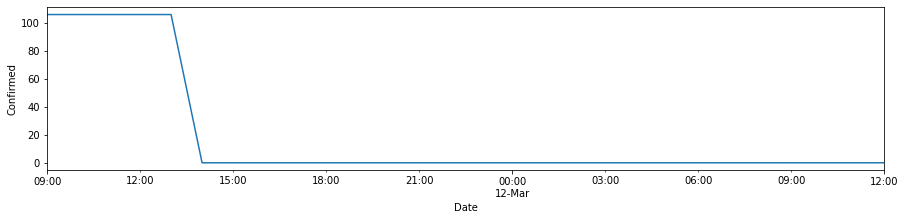

Israel


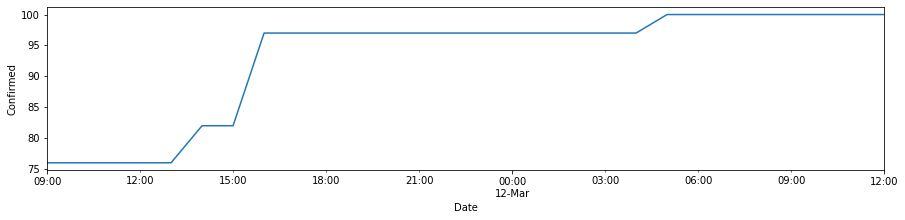

Greece


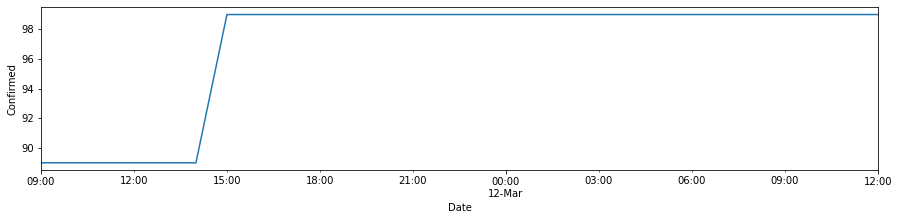

Czech Republic


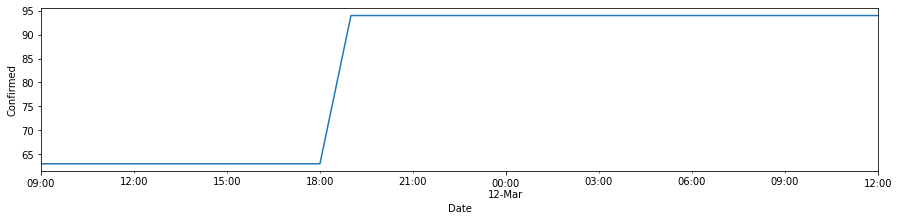

Massachusetts


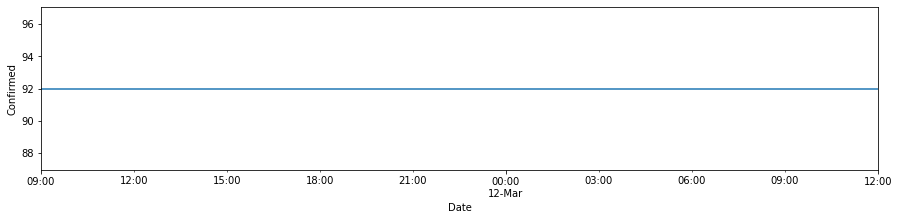

Iceland


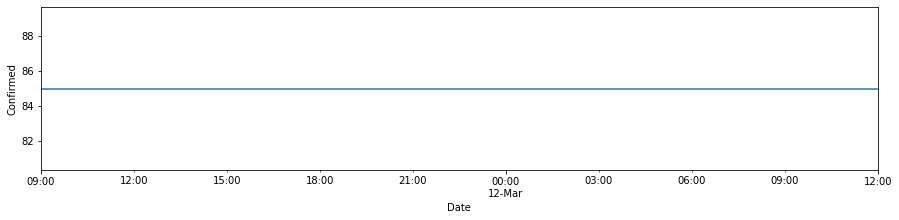

Kuwait


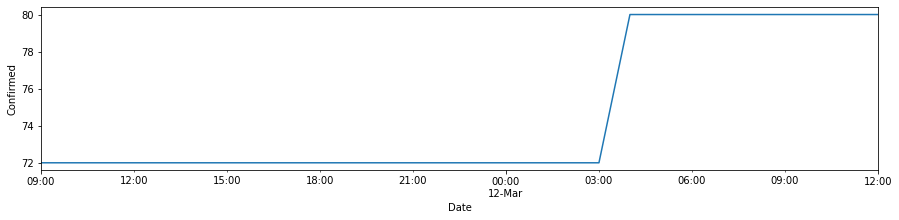

New South Wales


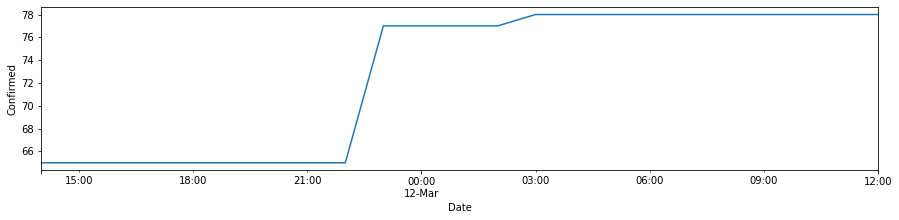

UAE


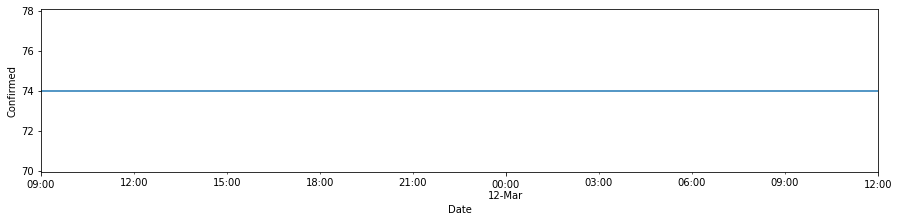

India


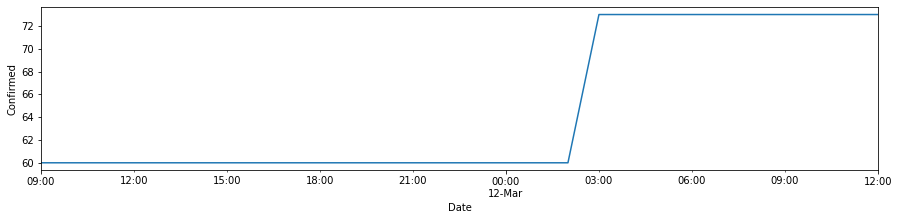

Iraq


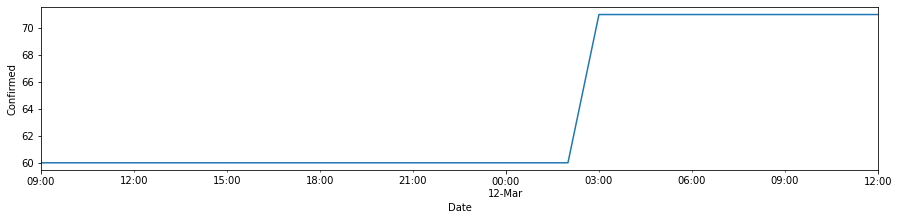

Thailand


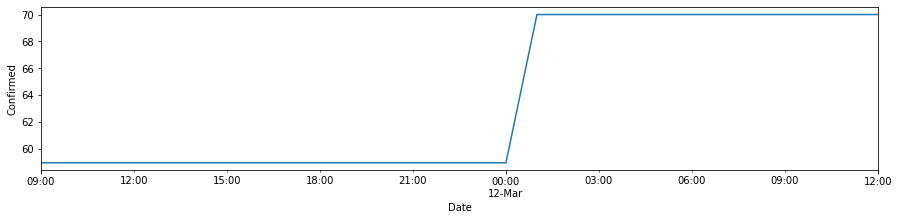

Brasil


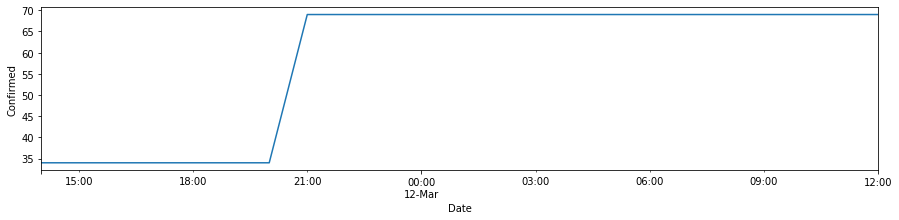

Egypt


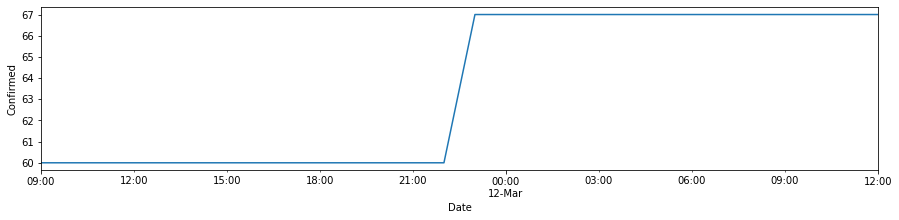

San Marino


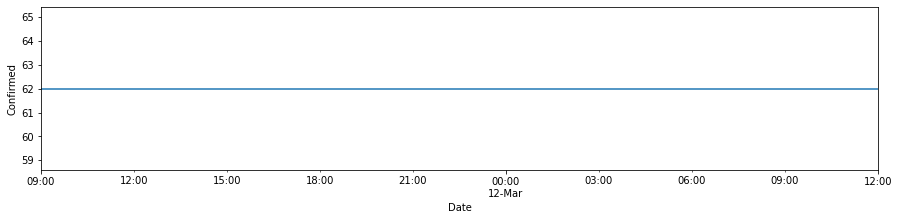

Lebanon


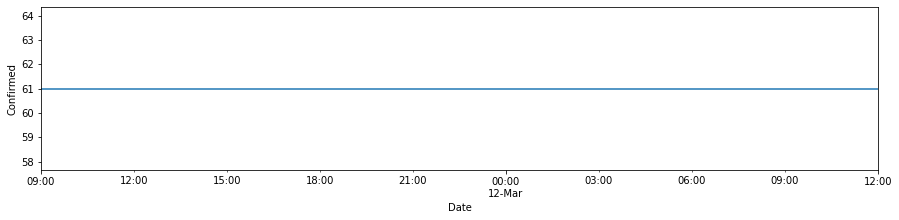

Finland


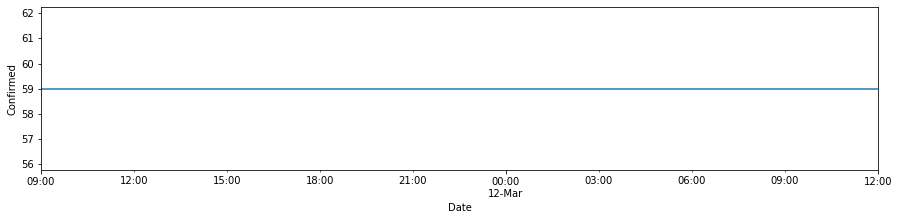

Portugal


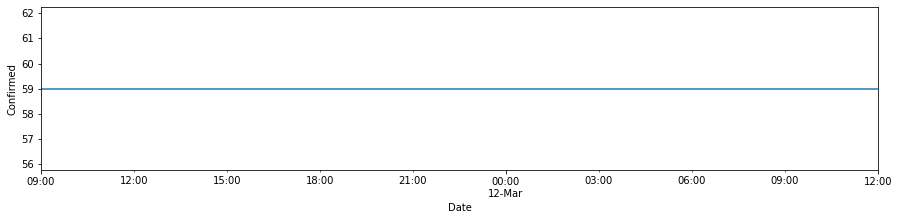

Slovenia


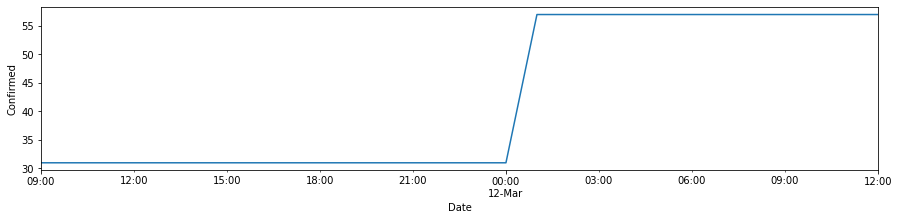

Brazil


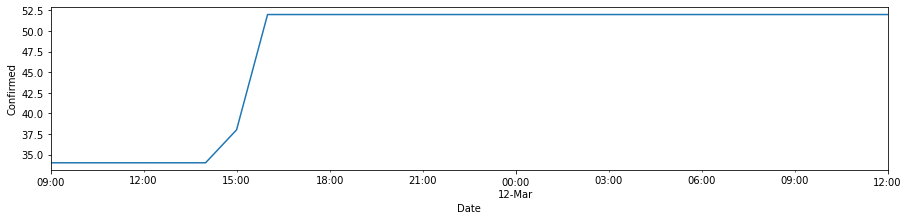

Philippines


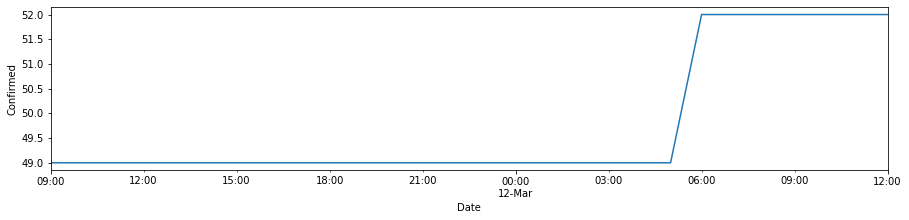

Taiwan


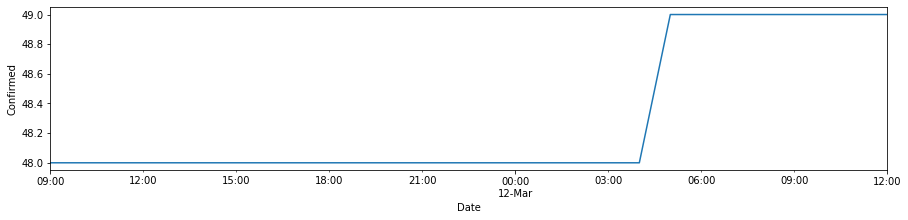

Romania


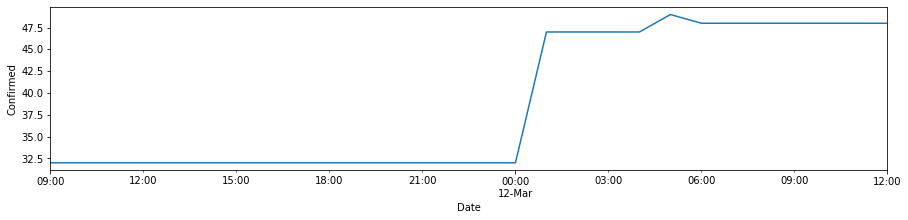

Poland


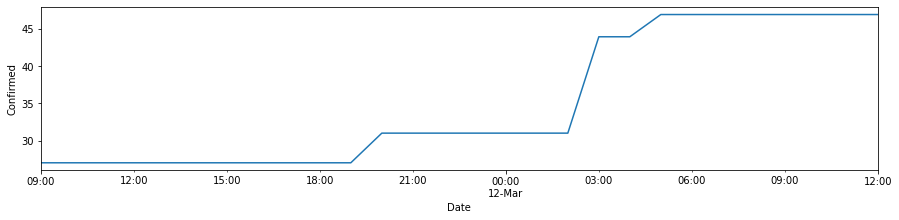

British Columbia


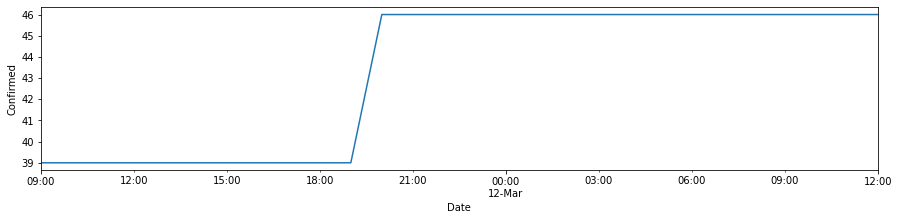

Saudi Arabia


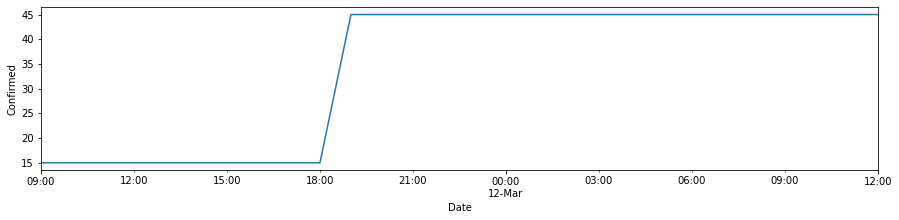

Diamond Princess


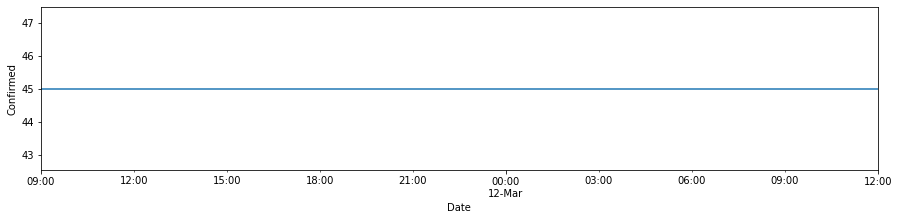

Ireland


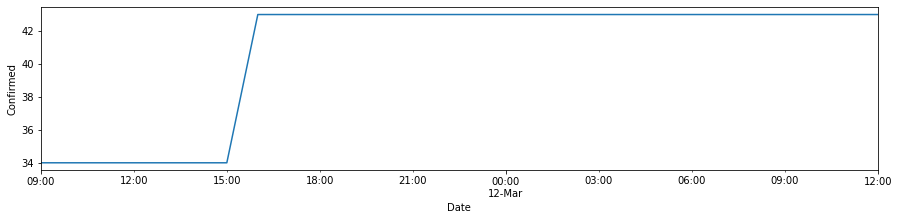

Vietnam


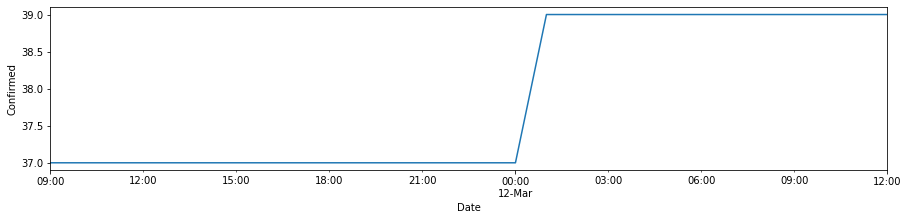

Ontario


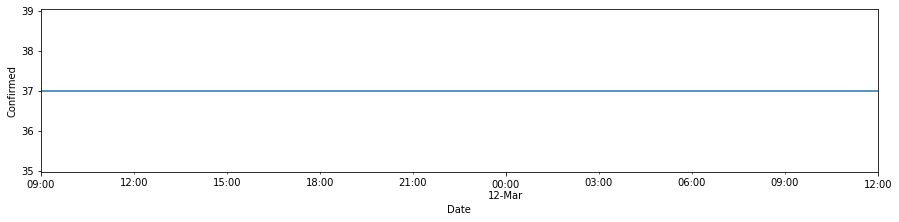

Indonesia


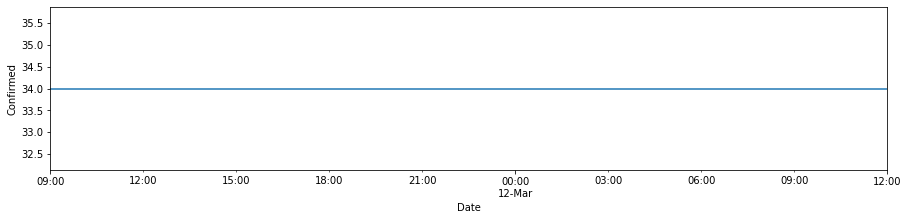

Palestine


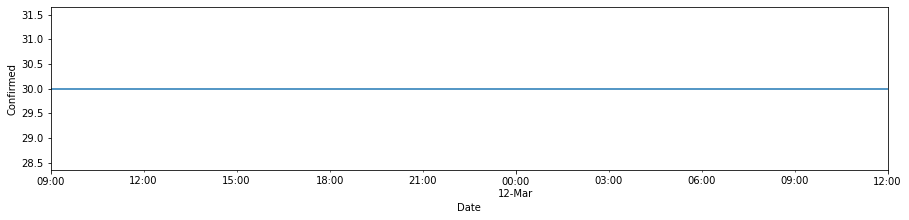

Russia


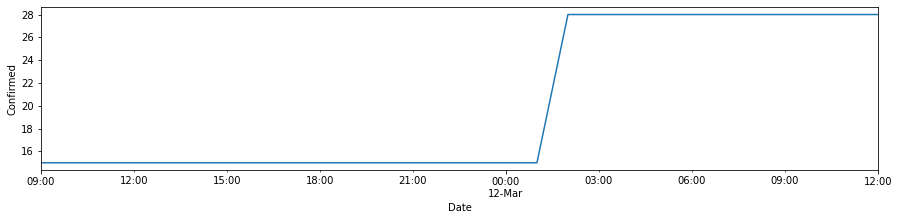

Undisclosed


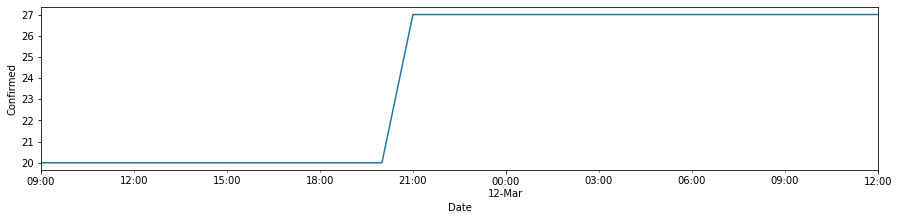

Victoria


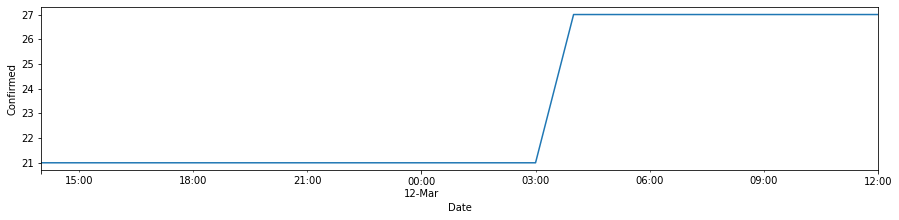

Queensland


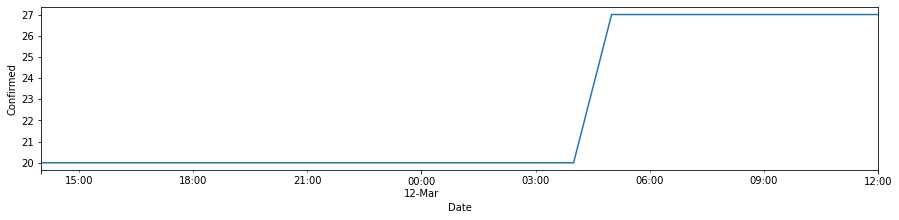

Algeria


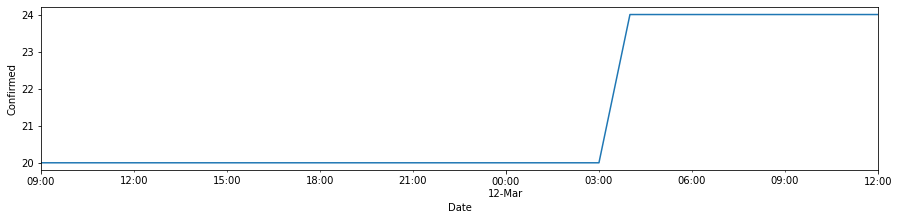

Chile


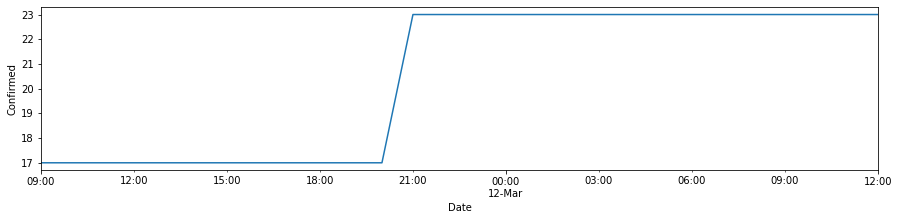

New Jersey


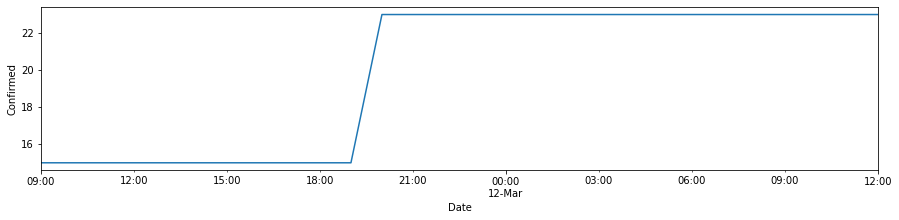

Costa Rica


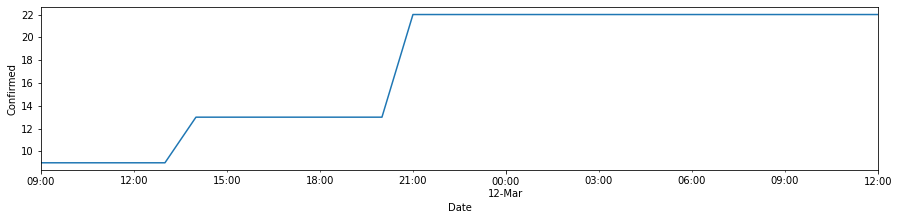

Georgia


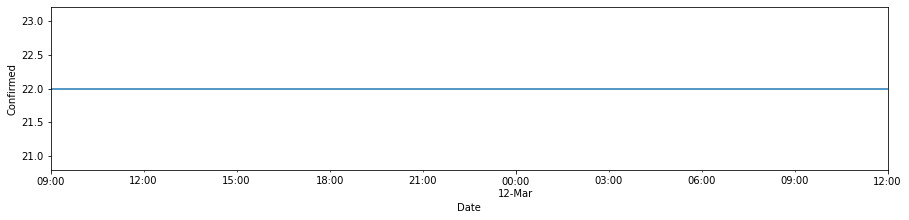

Argentina


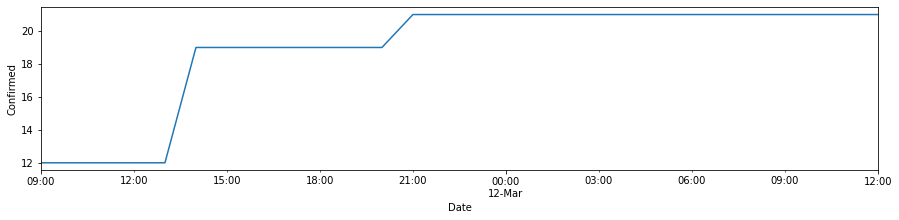

Florida


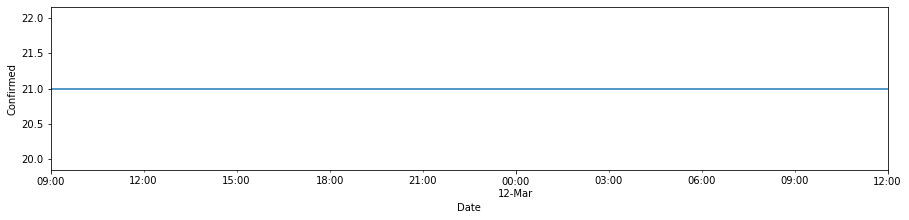

Grand Princess


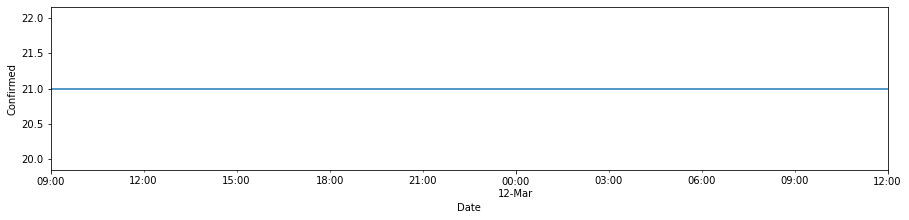

Serbia


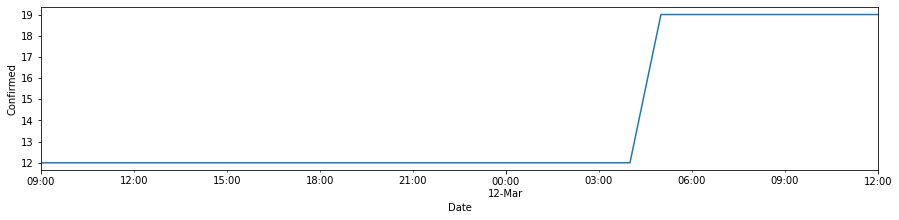

Pakistan


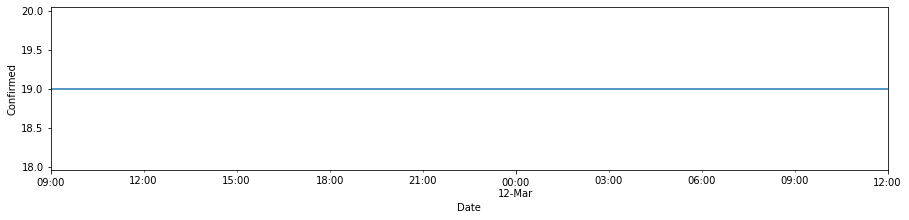

Illinois


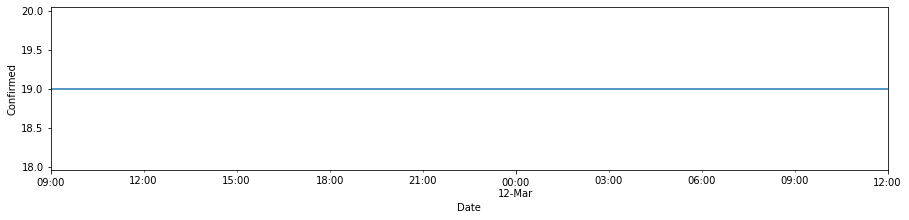

Alberta


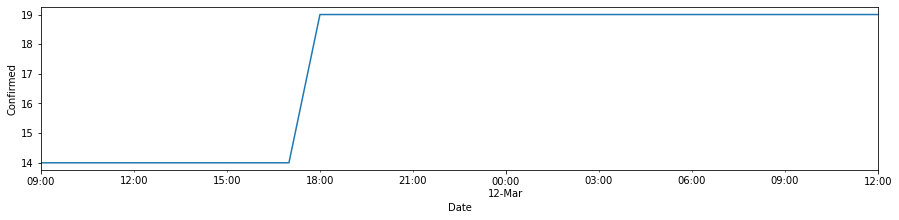

Croatia


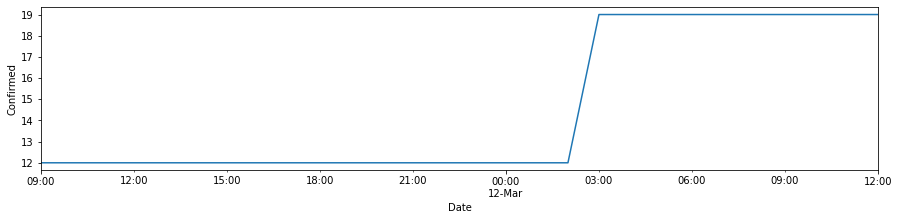

Luxembourg


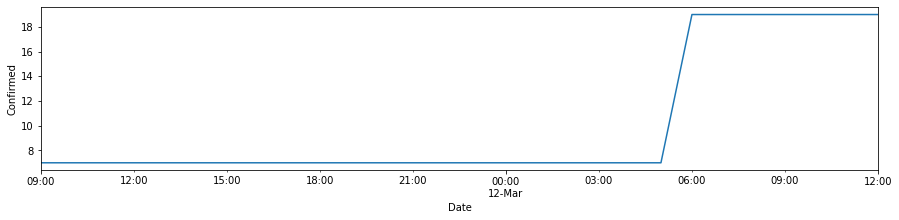

Oman


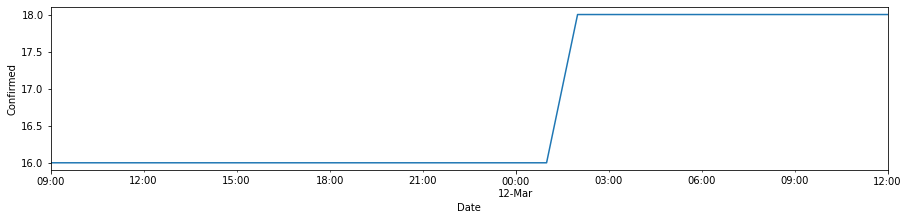

Ecuador


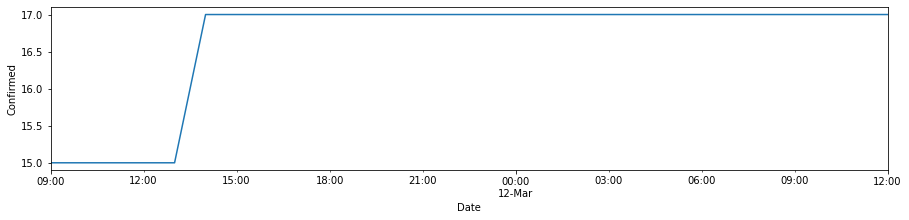

Peru


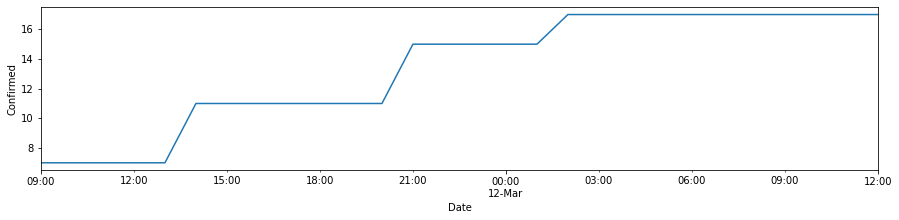

South Africa


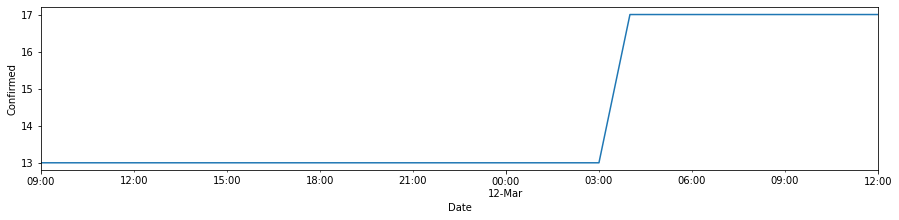

Latvia


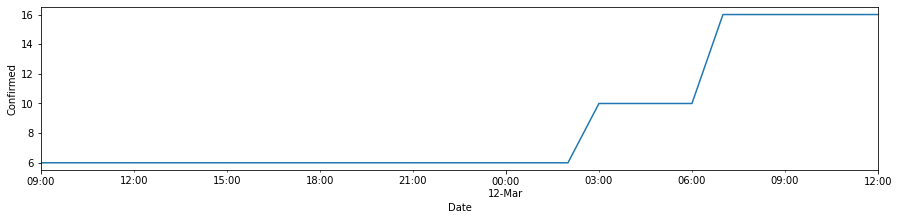

Albania


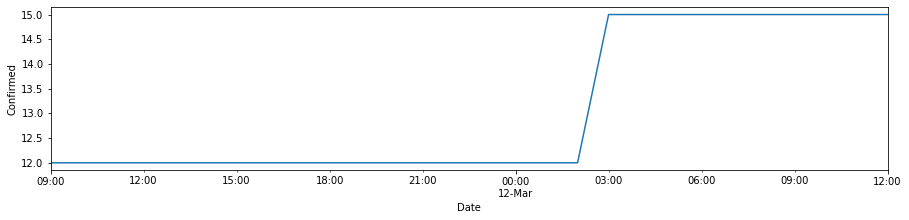

Oregon


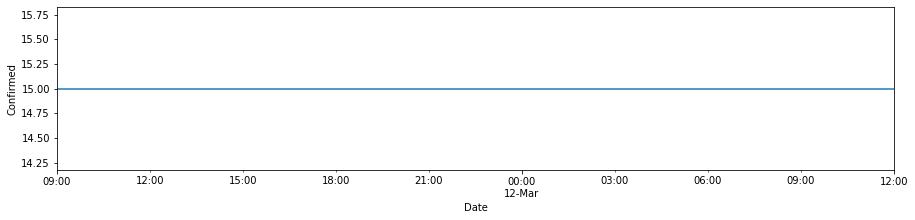

Panamá


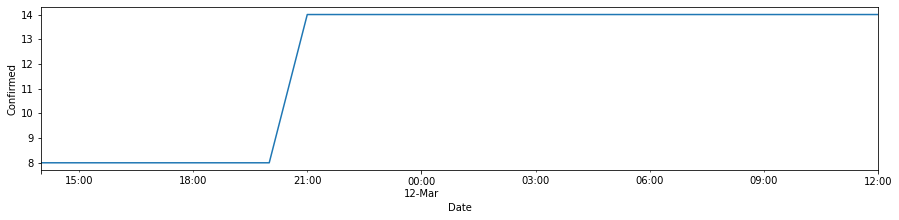

Iowa


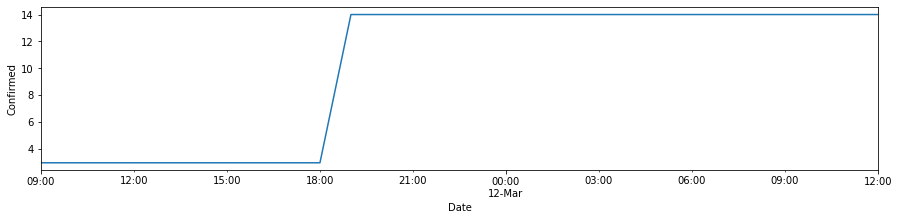

México


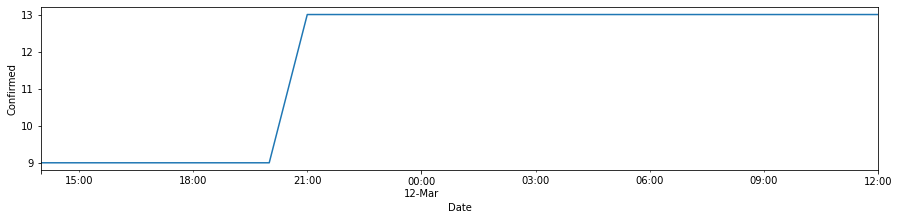

Hungary


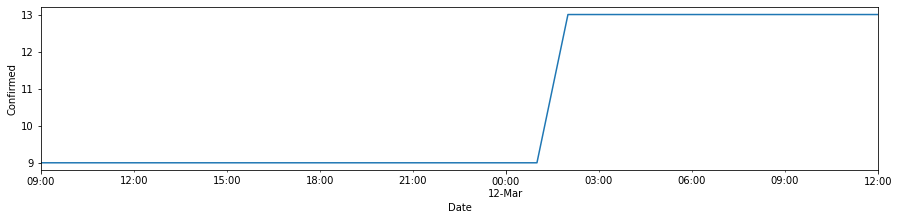

Mexico


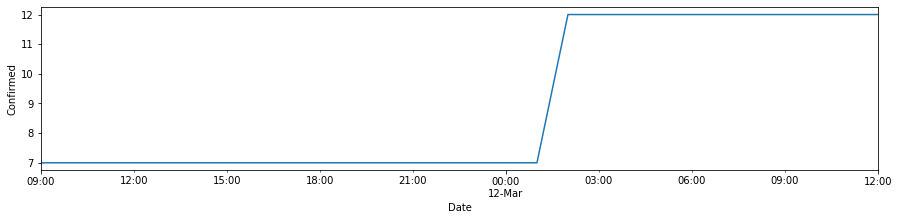

Belarus


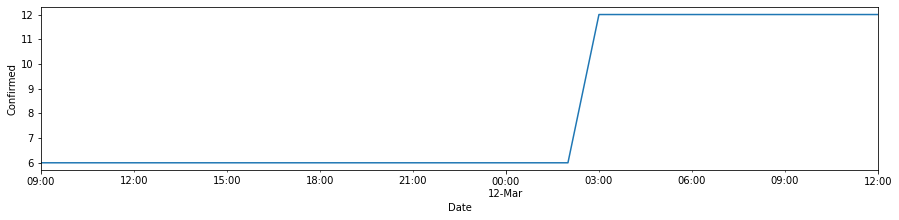

South Australia


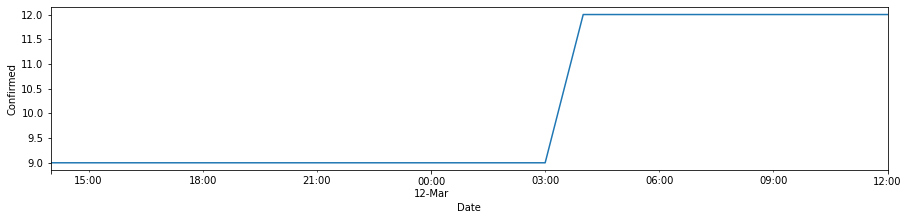

Azerbaijan


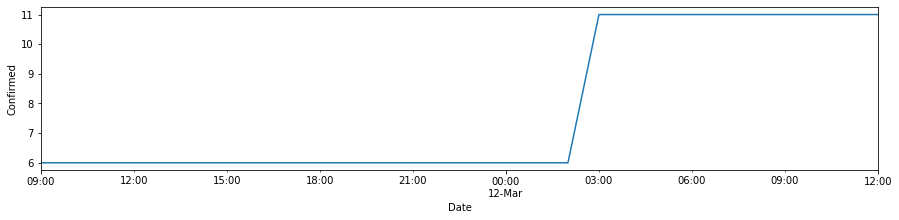

Bosnia


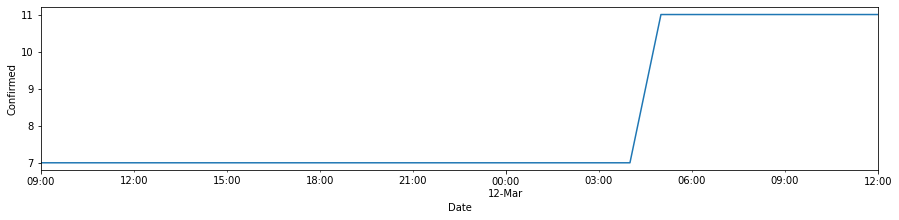

Pennsylvania


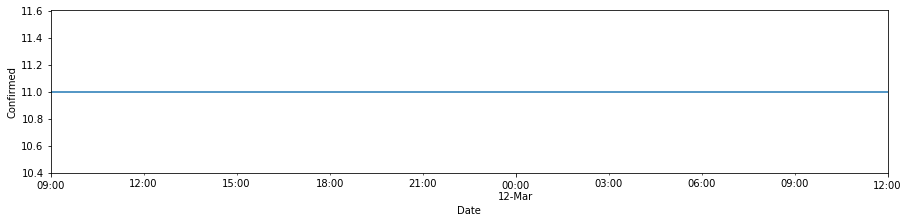

Macau


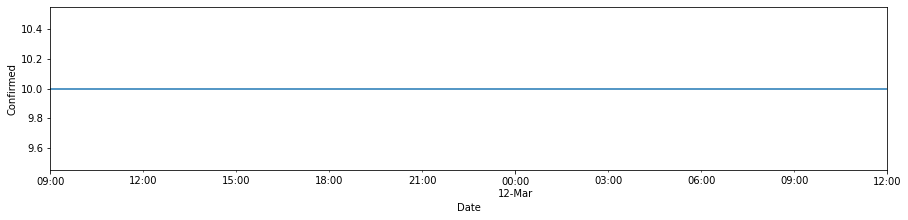

Slovakia


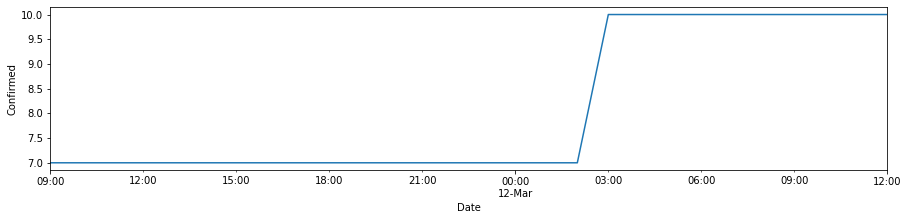

Estonia


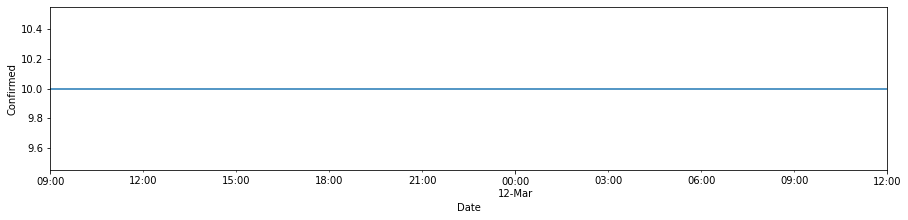

Western Australia


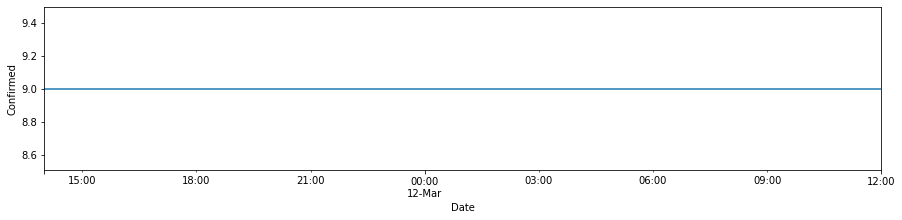

South Carolina


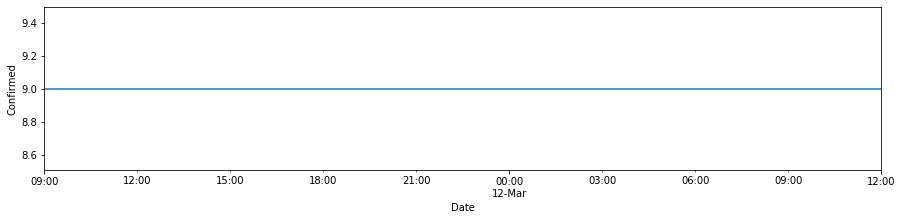

Colombia


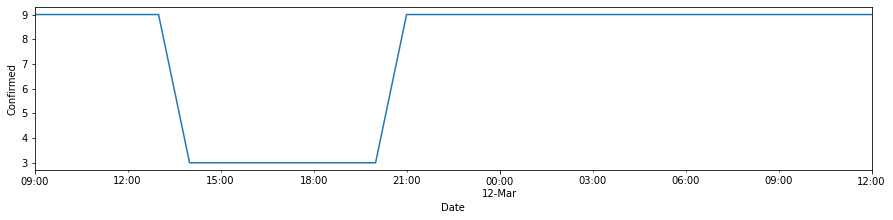

Arizona


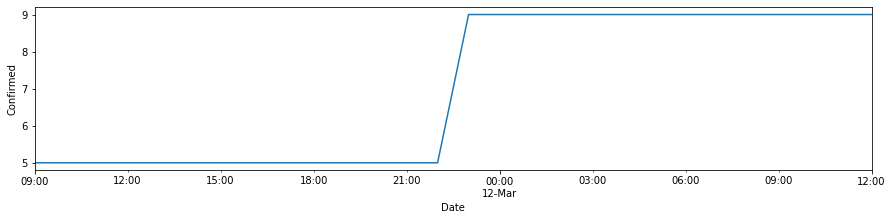

Colorado


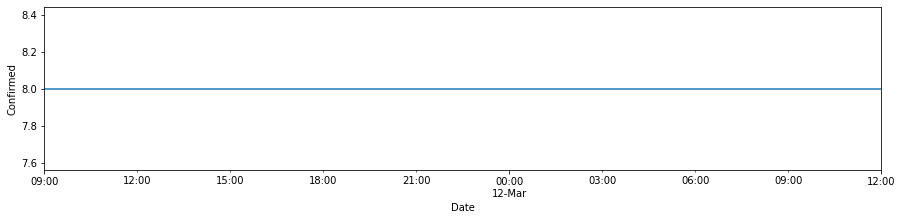

Maldives


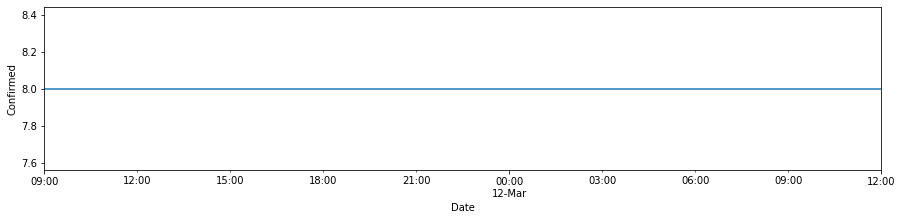

Panama


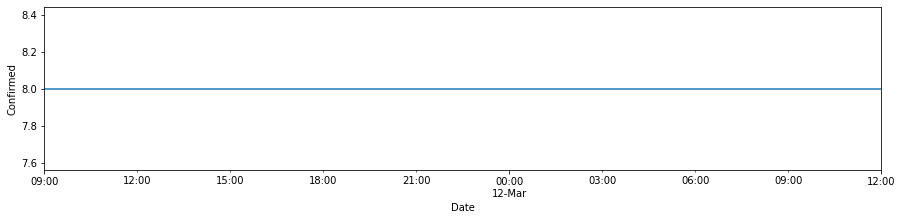

Kentucky


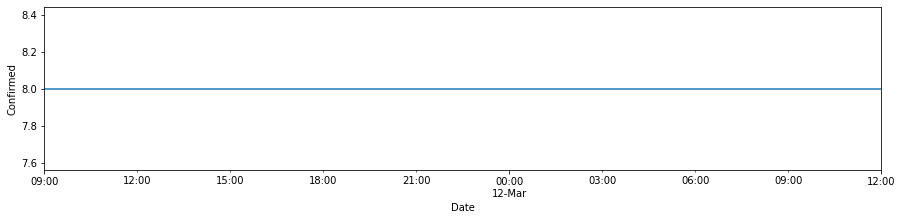

Tunisia


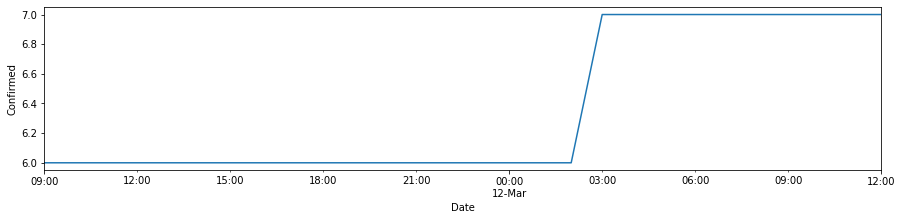

Texas


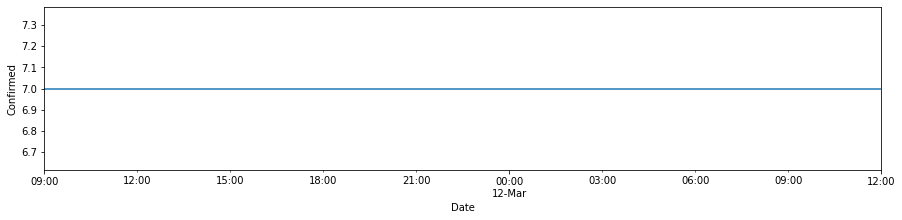

North Macedonia


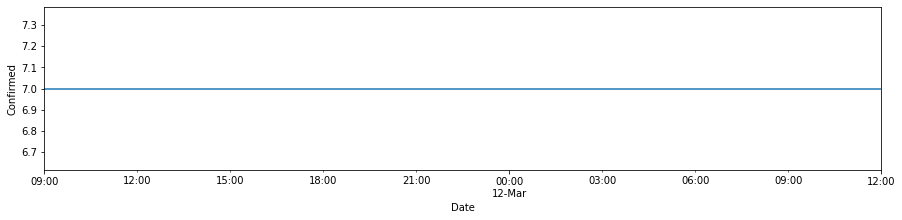

Quebec


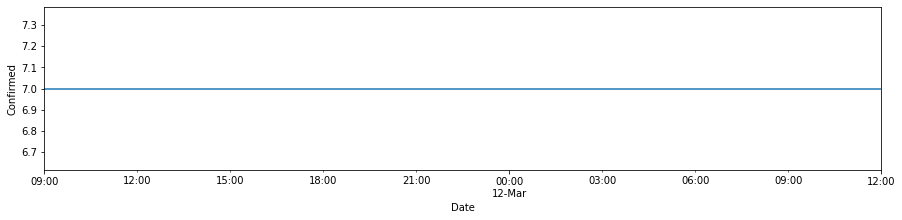

Afghanistan


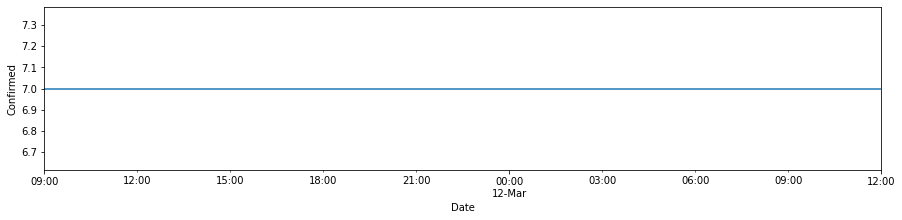

Bulgaria


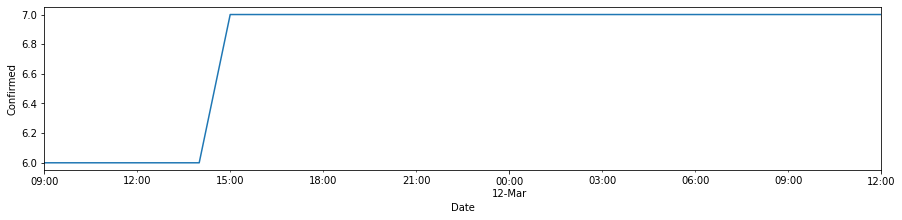

Malta


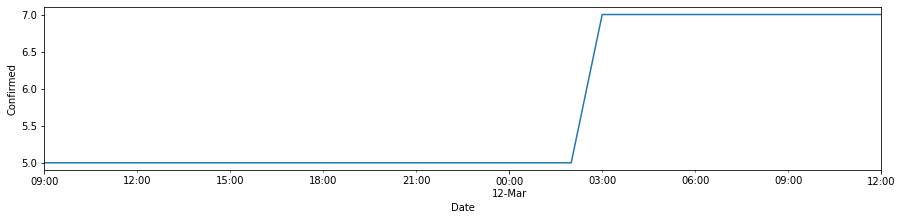

Cyprus


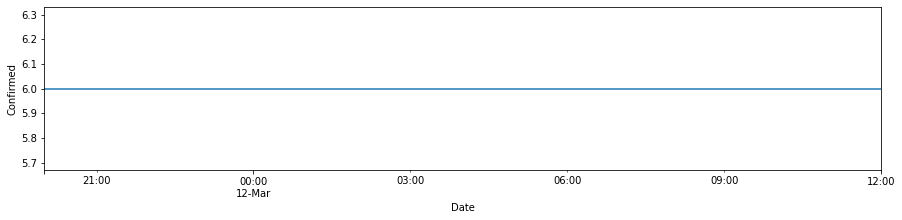

Maryland


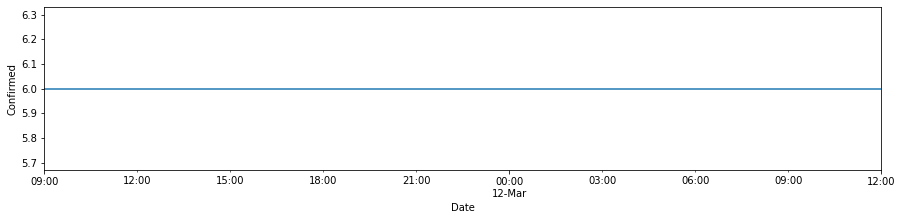

Morocco


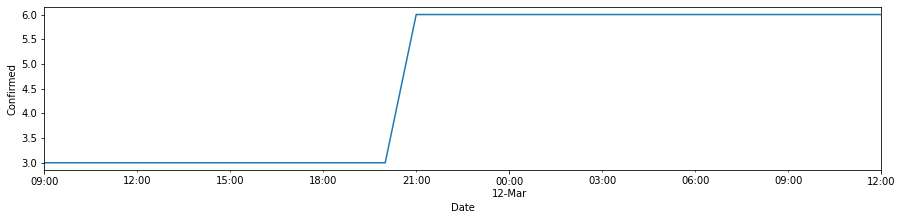

Wisconsin


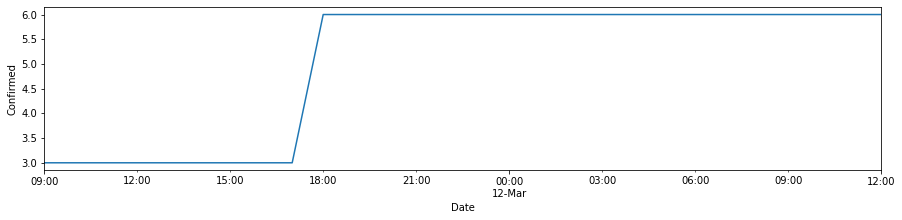

Paraguay


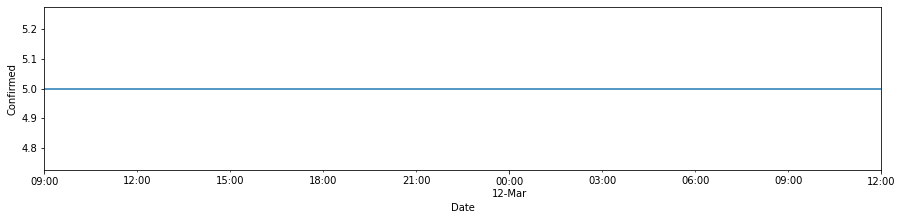

Rep. Dominicana


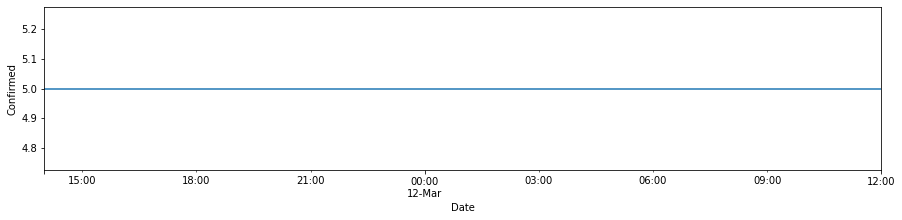

South Dakota


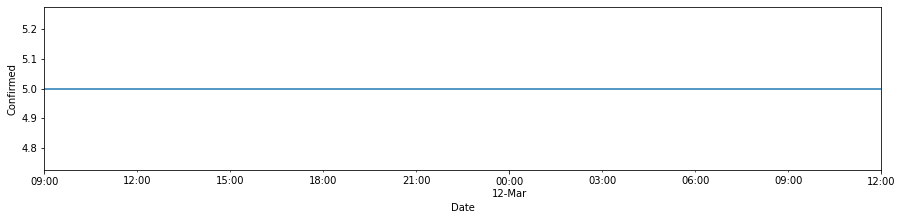

Dominican Republic


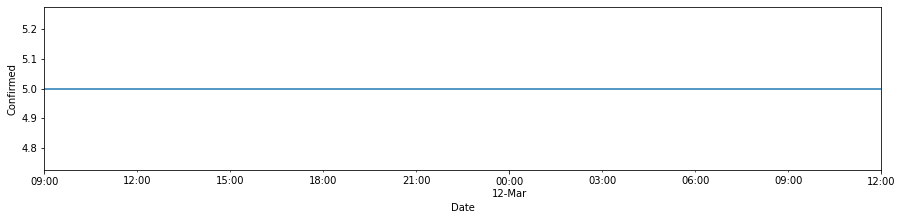

New Zealand


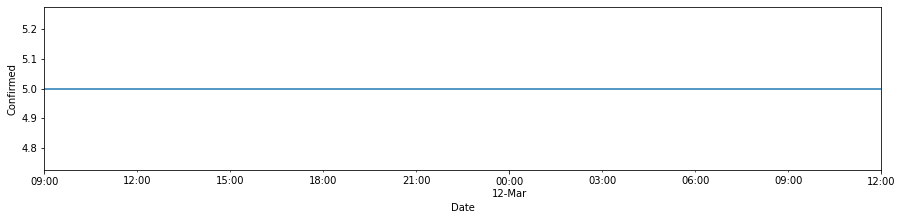

Virginia


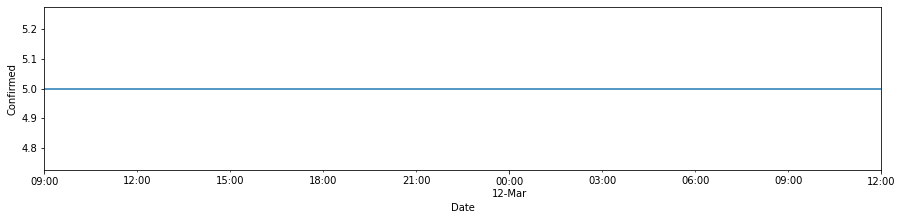

New Hampshire


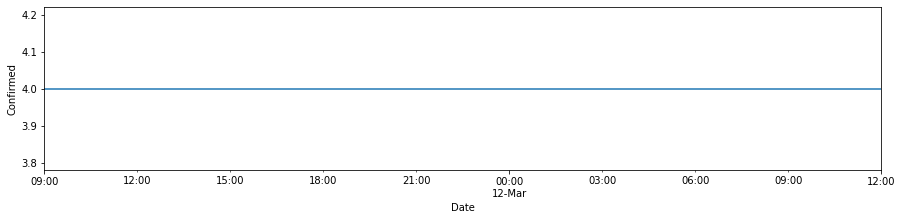

Senegal


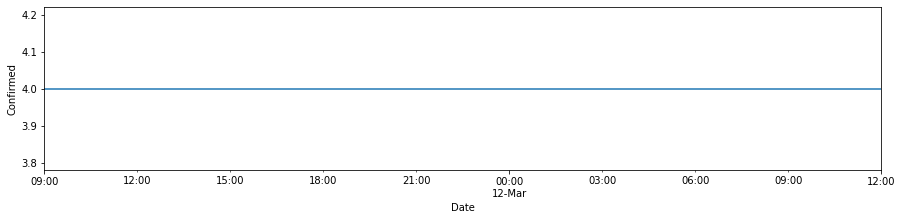

Nevada


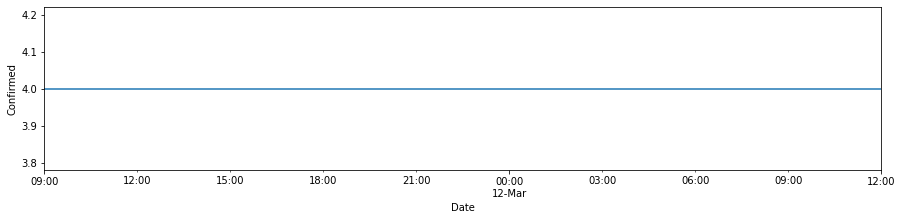

Minnesota


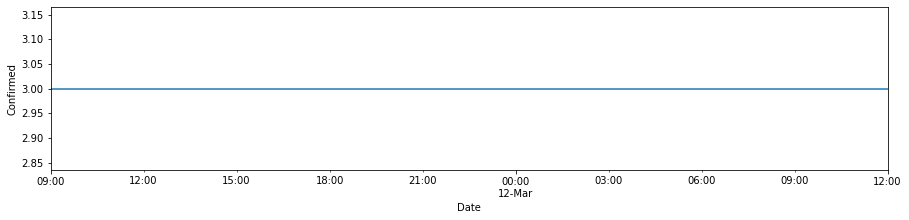

Bangladesh


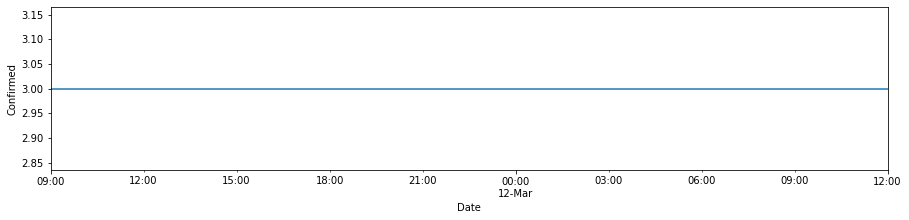

Moldova


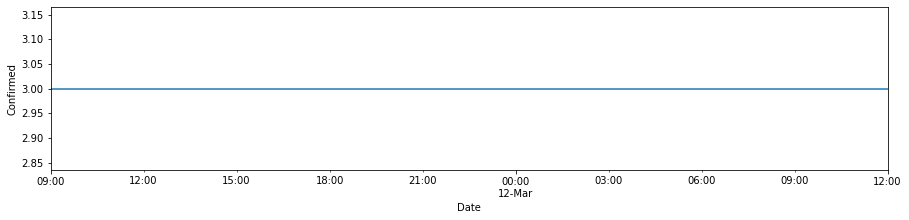

Lithuania


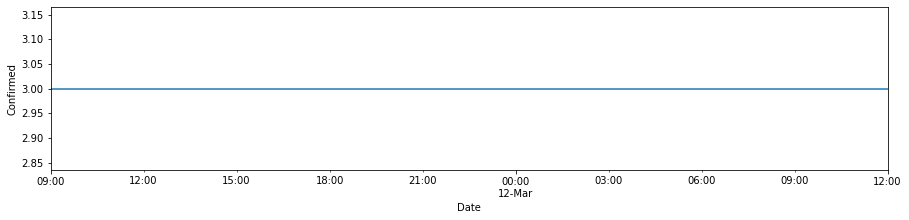

Rhode Island


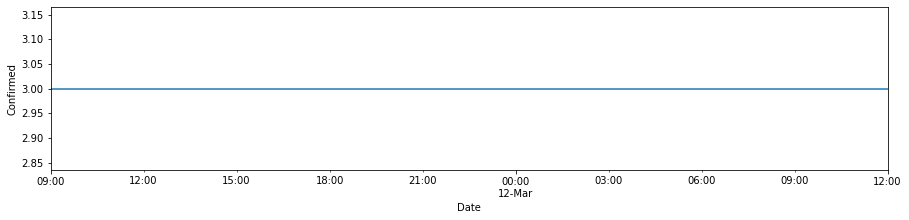

Tennessee


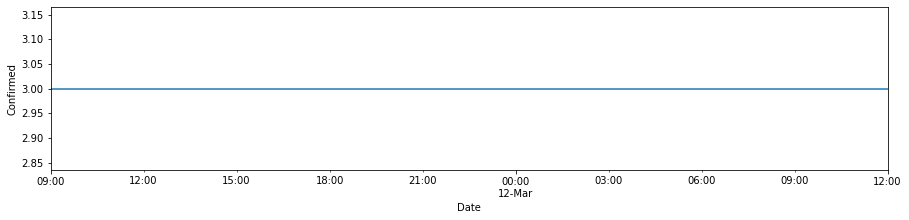

Cambodia


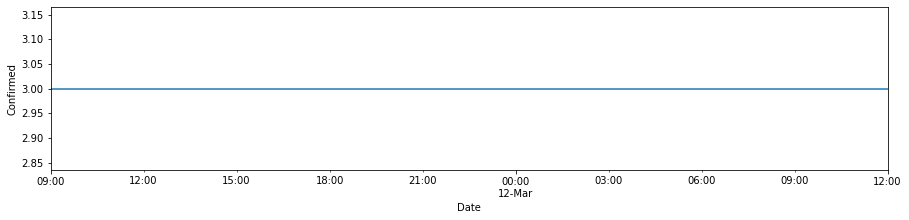

Ohio


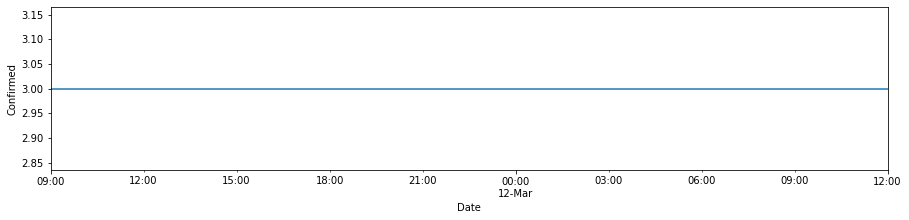

Cuba


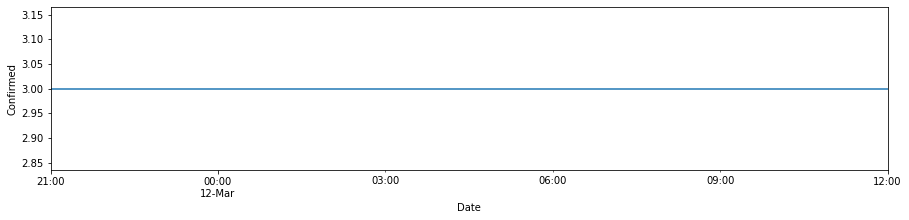

Honduras


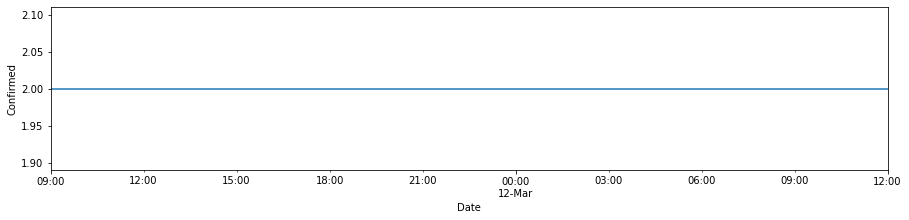

Jamaica


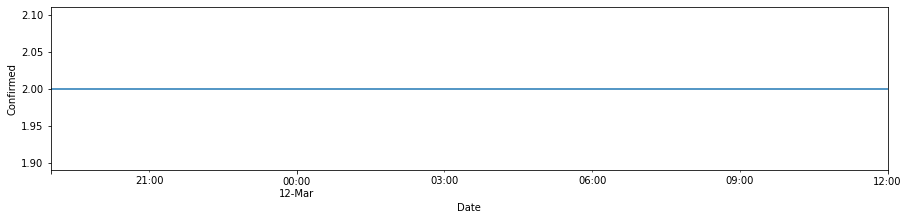

Indiana


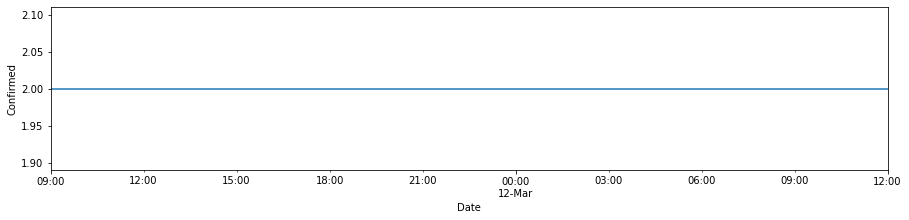

Sri Lanka


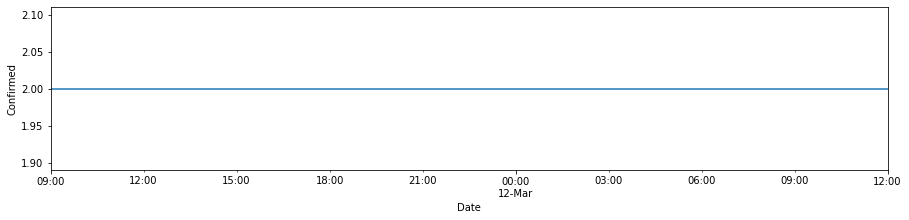

Bolivia


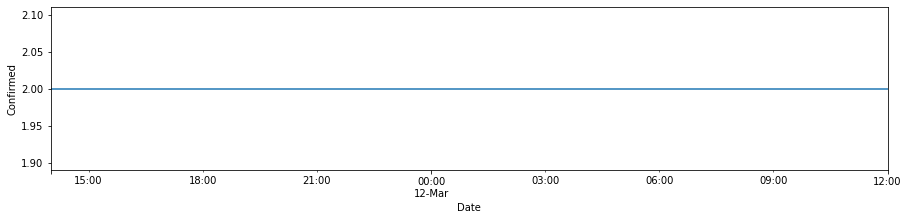

Cameroon


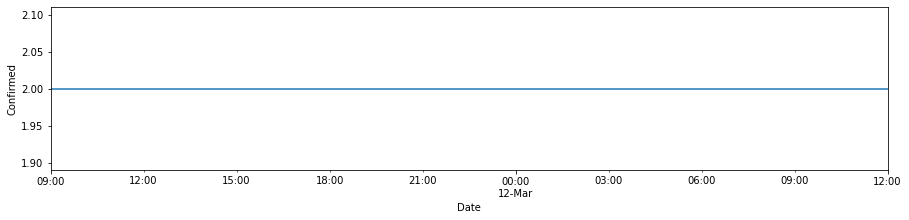

Tasmania


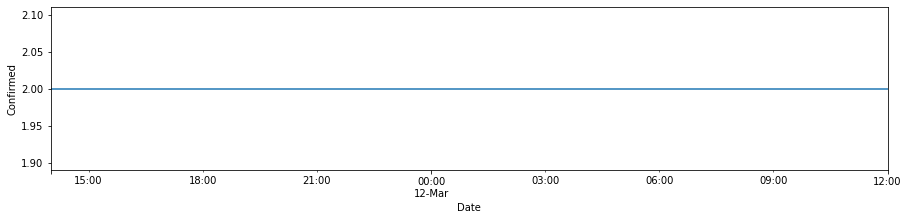

Hawaii


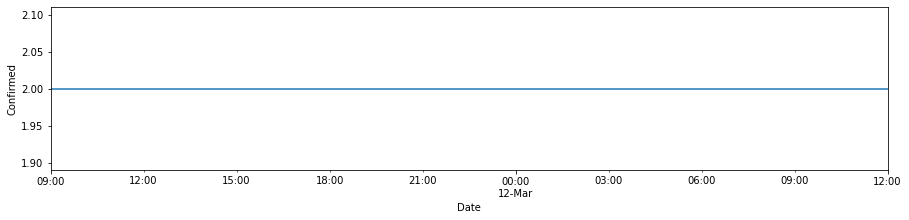

Connecticut


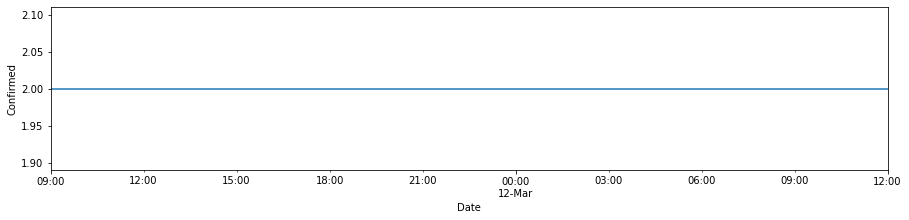

Michigan


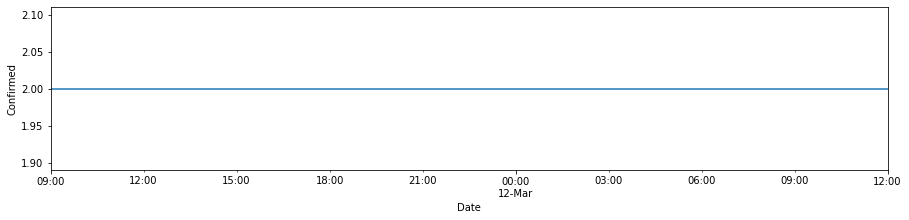

Nigeria


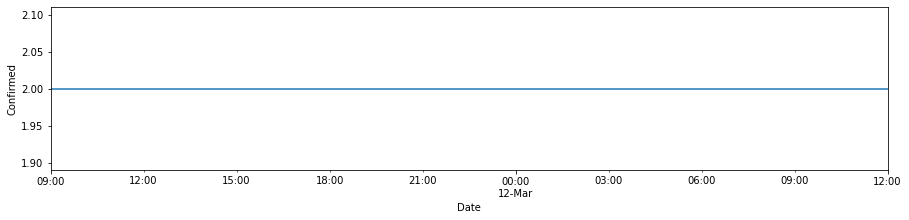

North Carolina


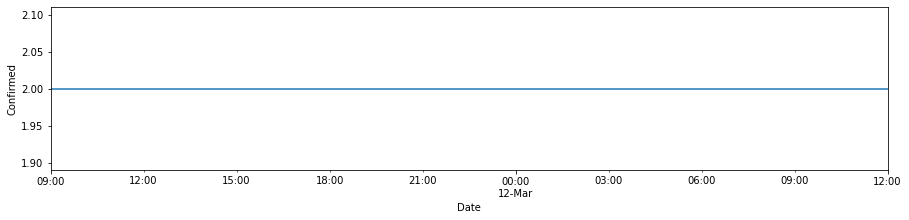

Missouri


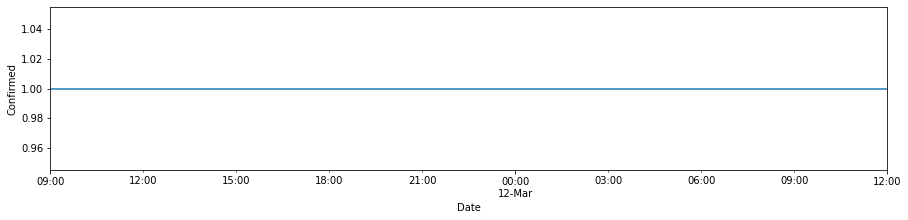

Andorra


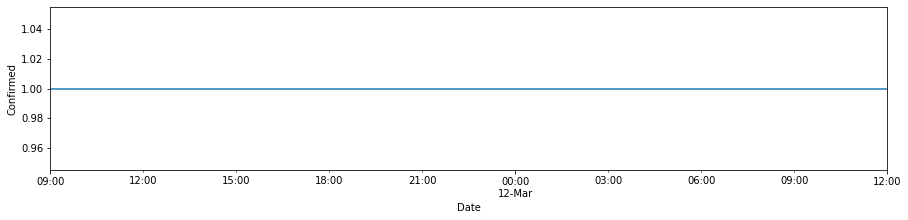

Utah


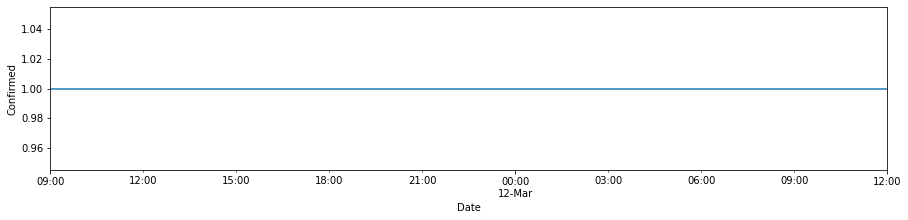

Northern Territory


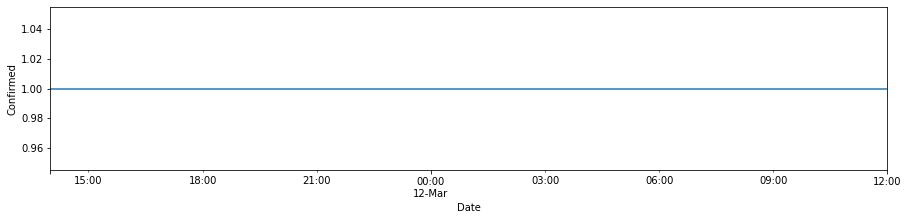

Mississippi


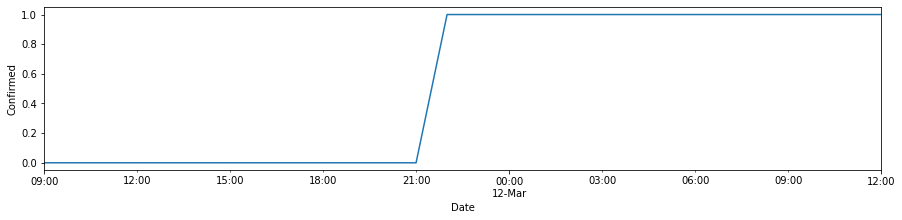

Nebraska


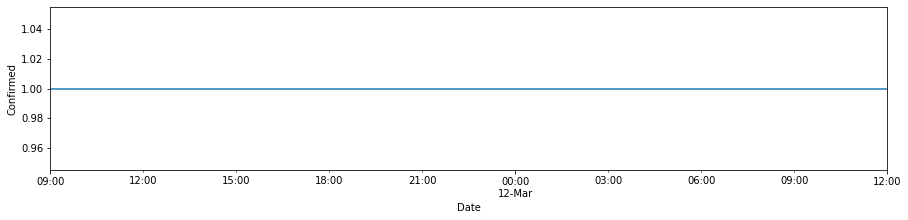

Oklahoma


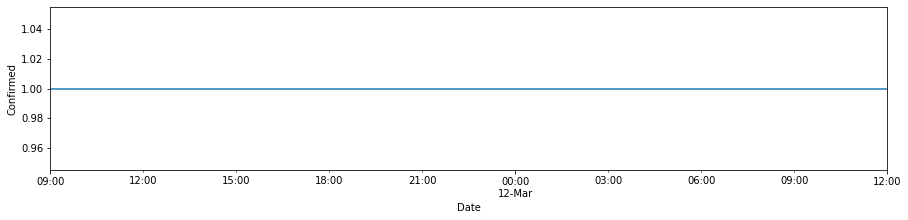

Vermont


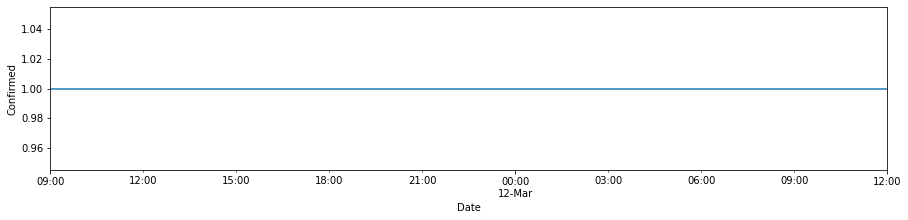

Vatican City


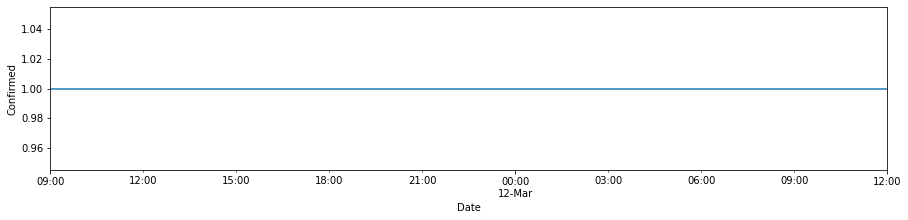

Togo


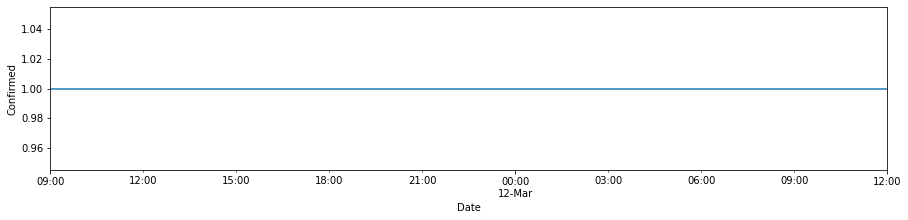

Bhutan


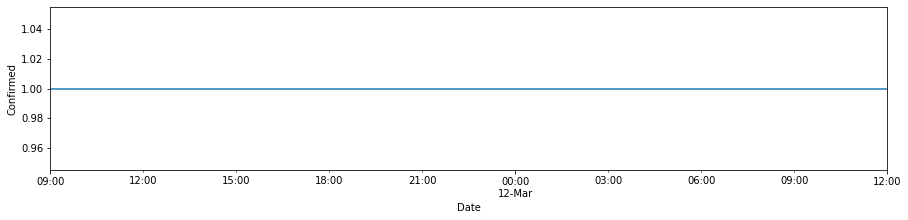

Monaco


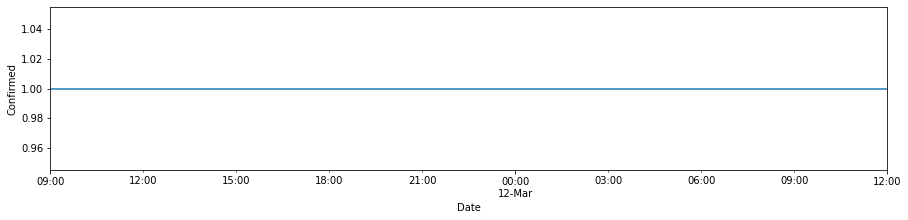

Turkey


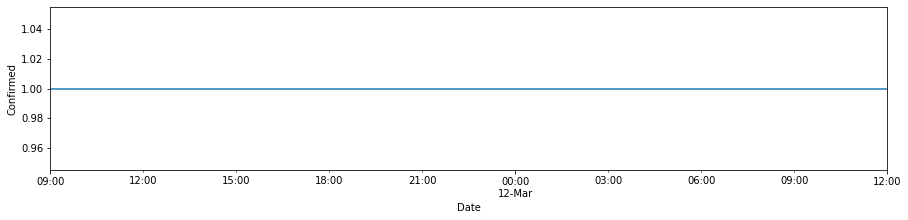

District of Columbia


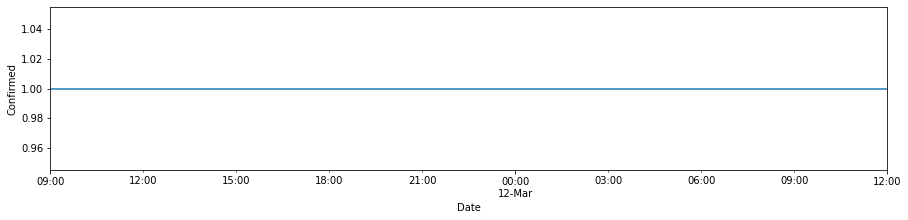

Armenia


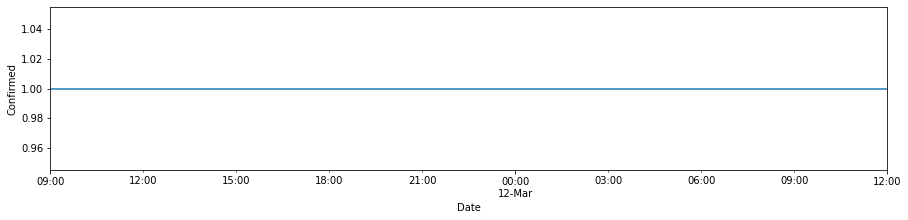

Ukraine


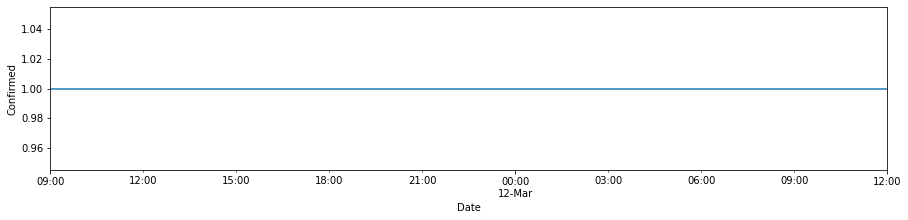

Louisiana


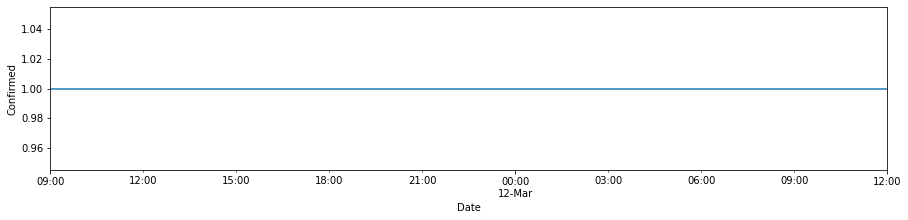

Liechtenstein


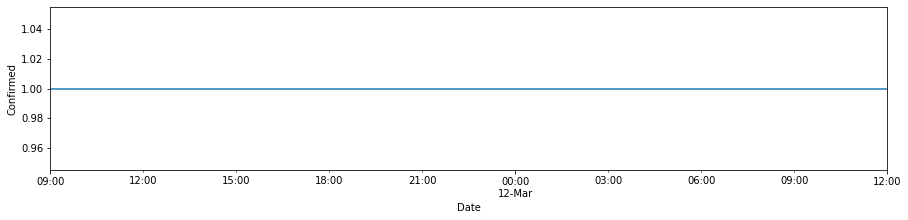

Nepal


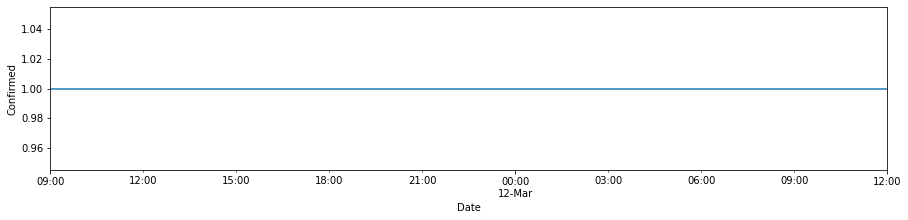

Kansas


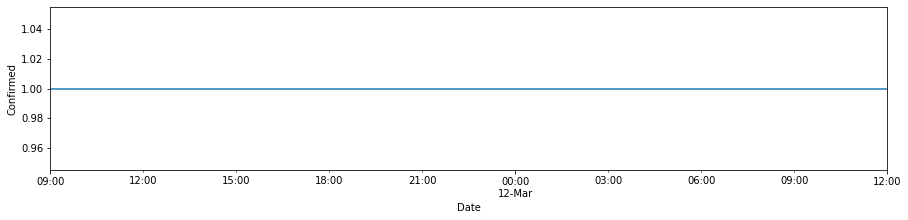

Jordan


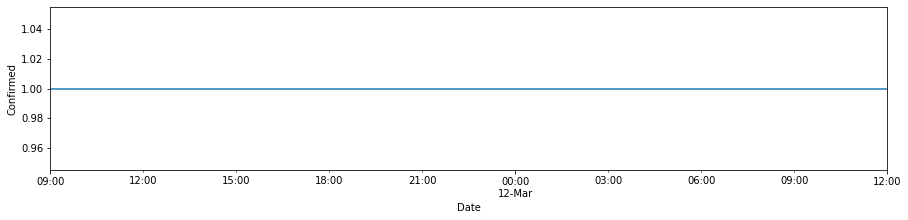

Gibraltar


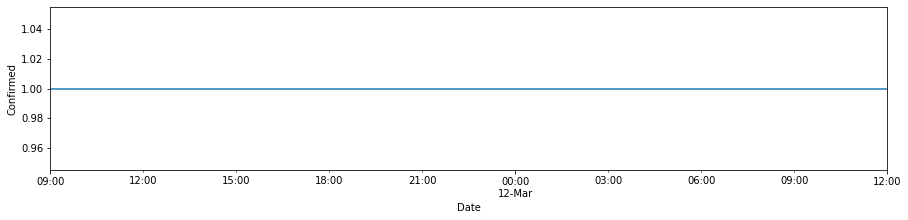

American Samoa


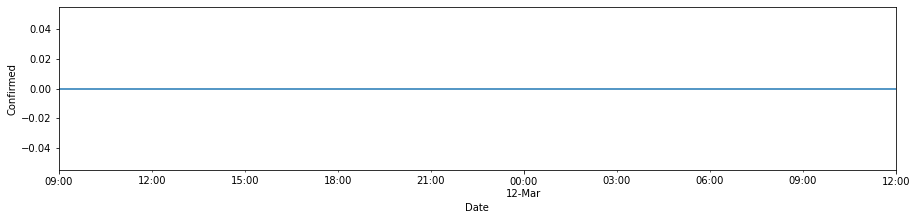

Wyoming


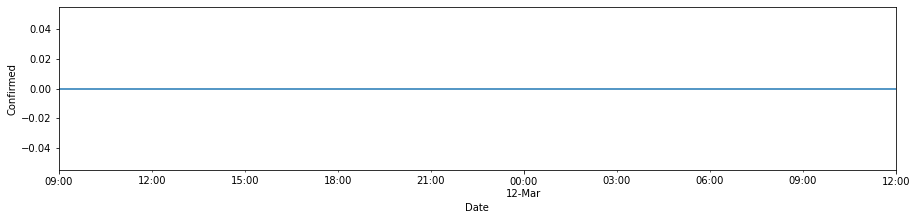

Alaska


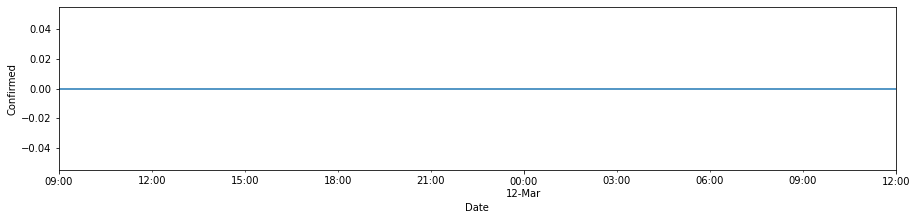

New Mexico


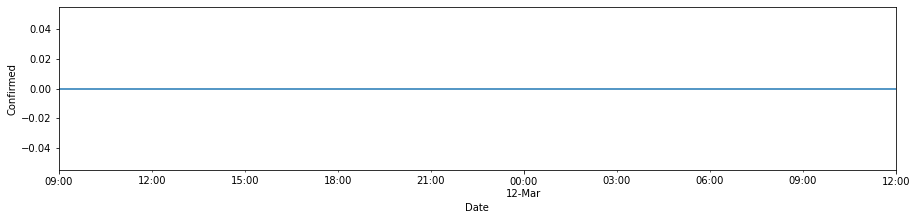

U.S. Virgin Islands


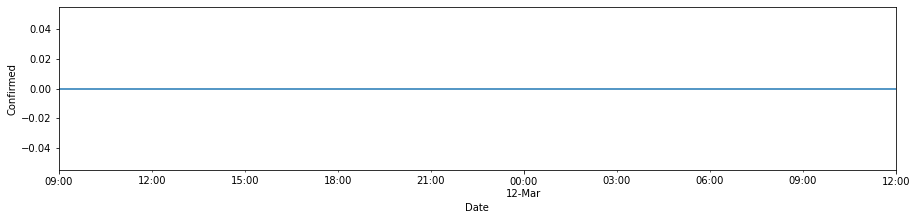

New Brunswick


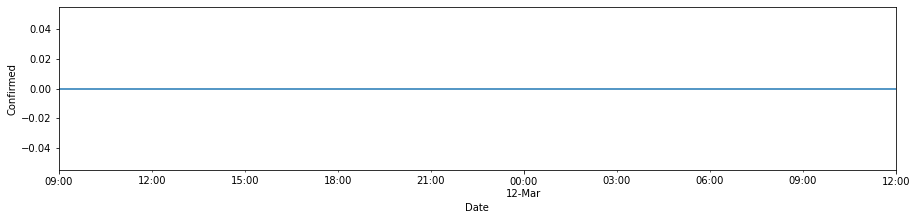

Yukon


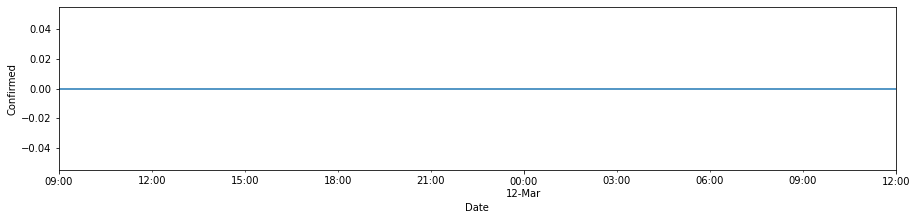

Alabama


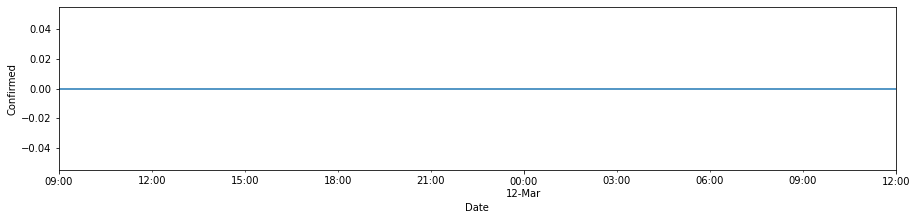

Montana


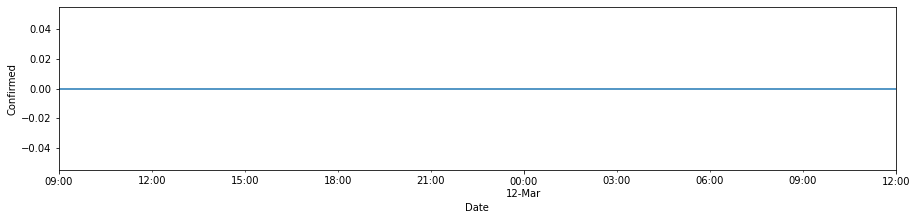

West Virginia


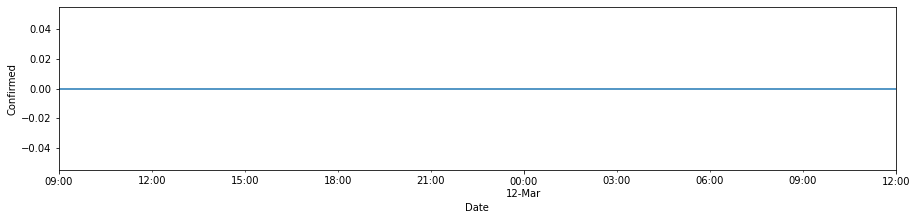

Arkansas


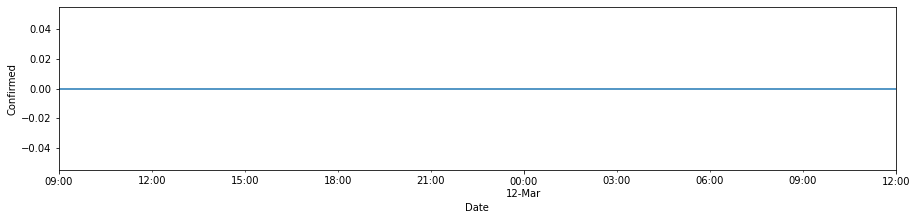

Prince Edward Island


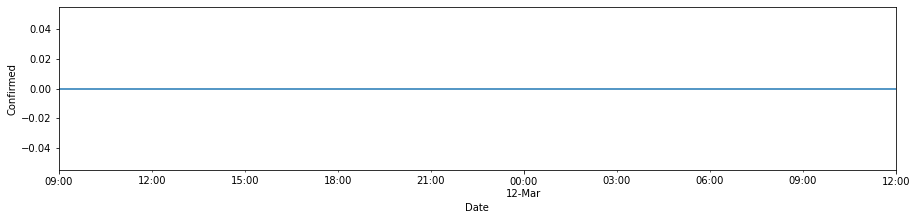

Delaware


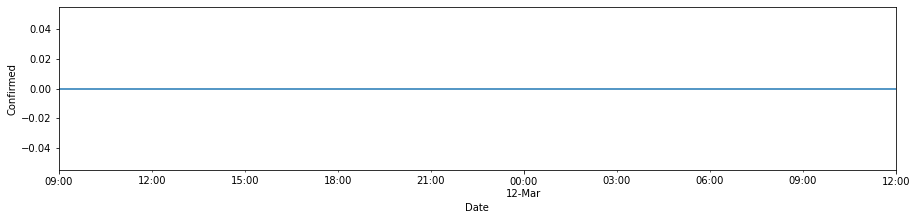

Maine


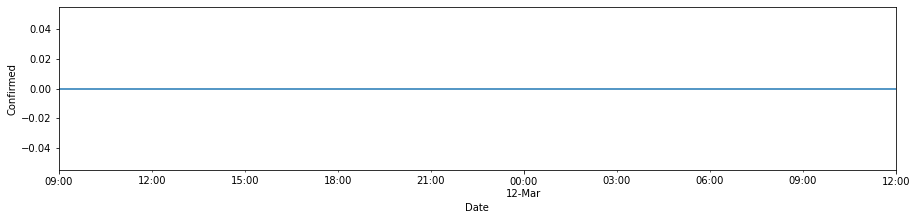

Manitoba


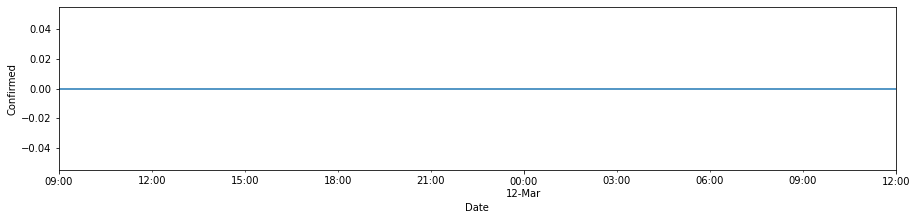

Guam


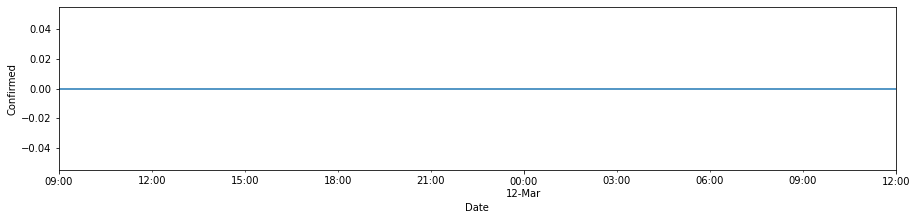

Saskatchewan


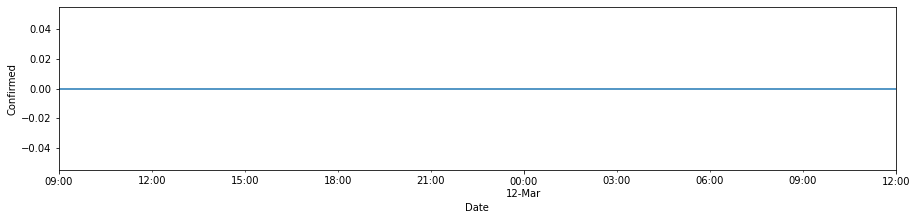

External territories


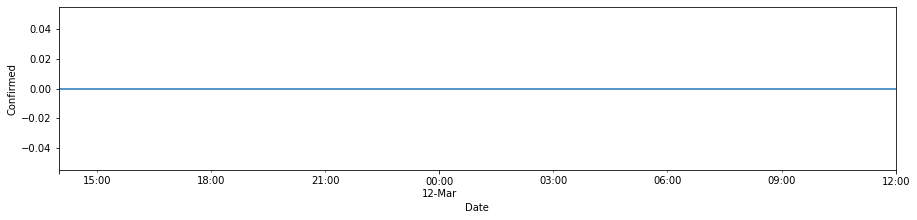

Jervis Bay Territory


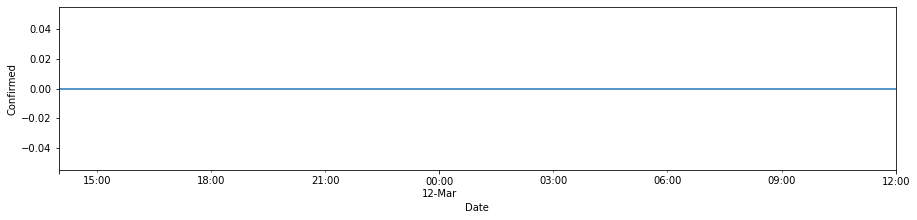

Puerto Rico


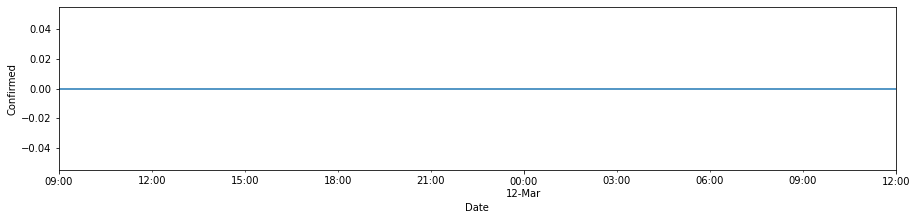

Idaho


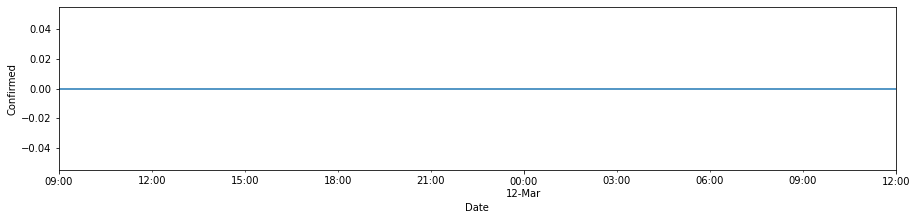

North Dakota


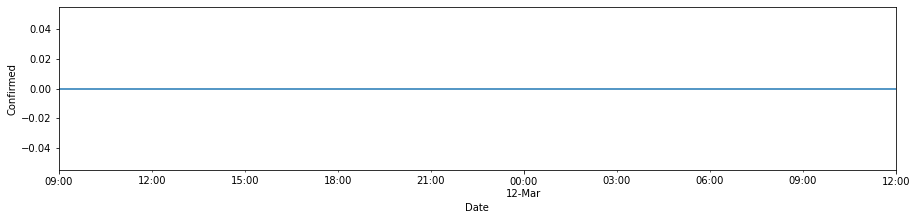

Northern Mariana Islands


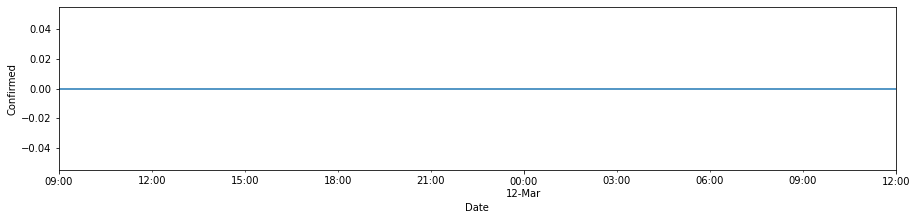

Northwest Territories


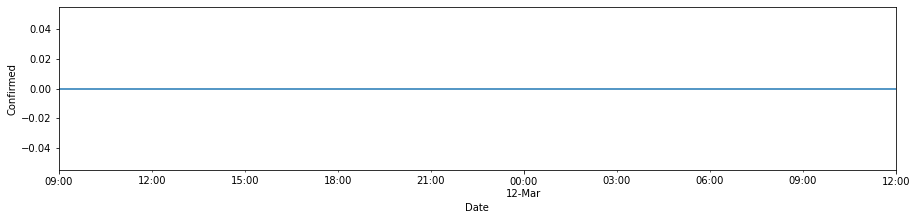

Newfoundland & Labrador


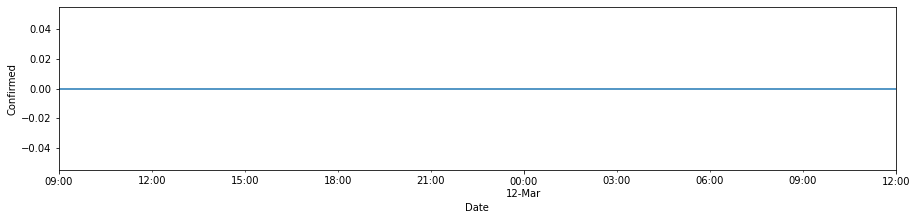

Nunavut


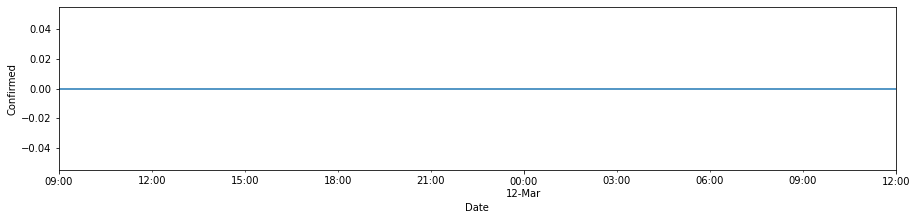

Nova Scotia


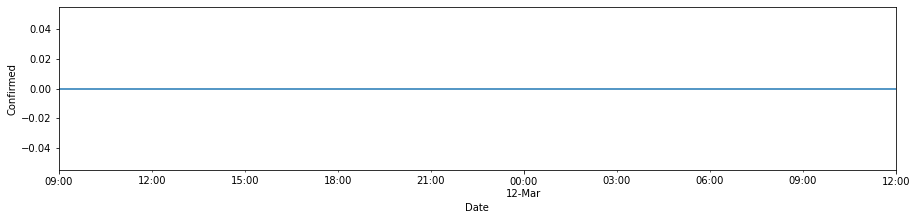

Canberra (ACT)


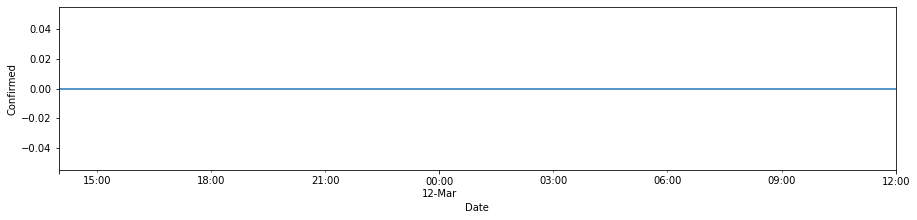

In [7]:
key = 'Confirmed'
for region in df.sort_values(key, ascending=False)['Region'].unique():
    plt.figure(figsize=(15,3))
    print(region)
    display(df[df.Region == region][key].plot() ) 
    plt.ylabel(key)
    plt.show();

Below represents regional percentage upticks in reported Confirmed infection rates since the previous period.  Presuming accurate data ( a bad assumption) we can surmise an accelerating infection rate from charts showing more frequent and severe spikes.

Mississippi


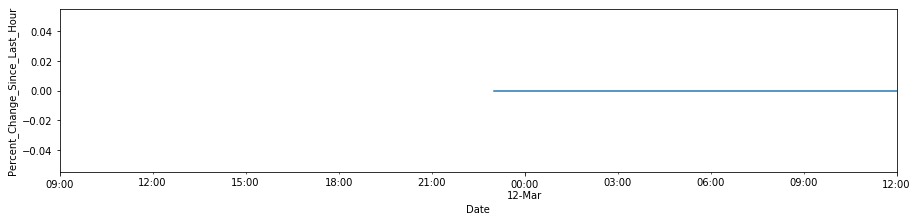

Qatar


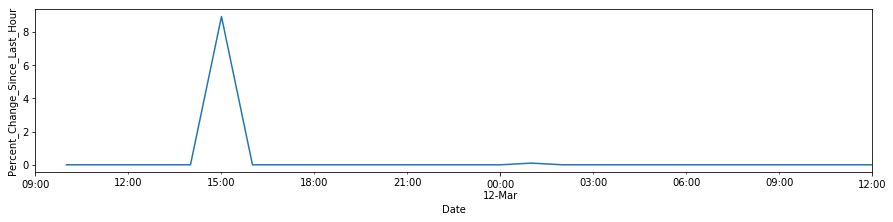

Iowa


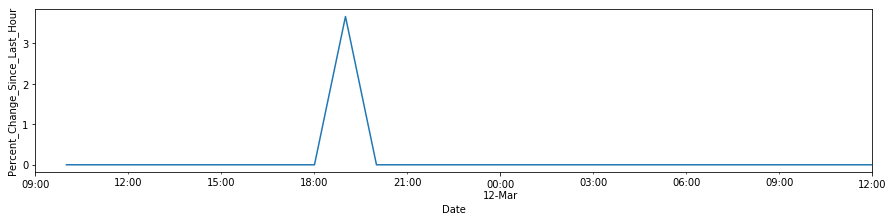

Saudi Arabia


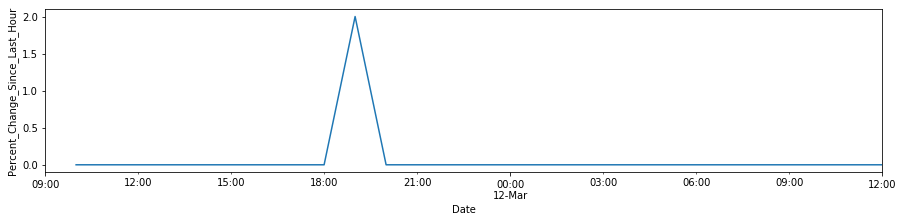

Colombia


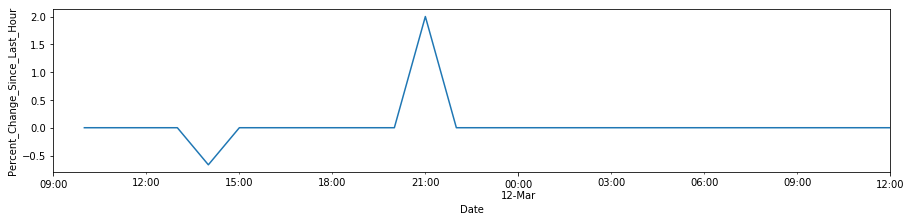

Luxembourg


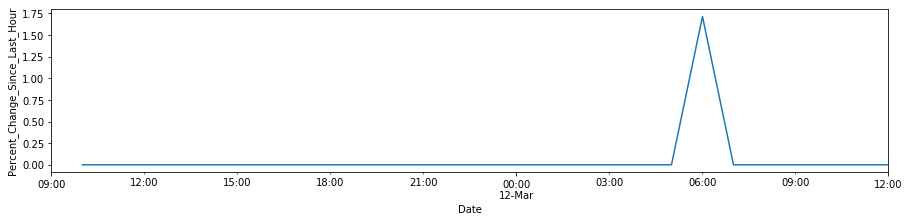

Brasil


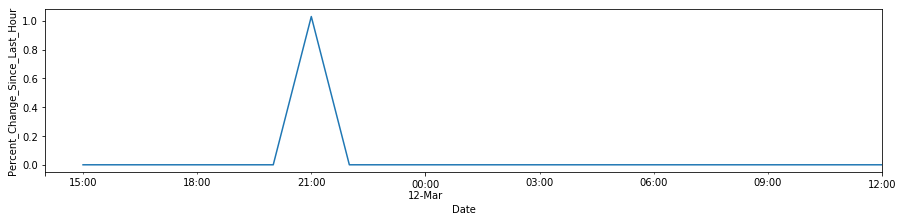

Belarus


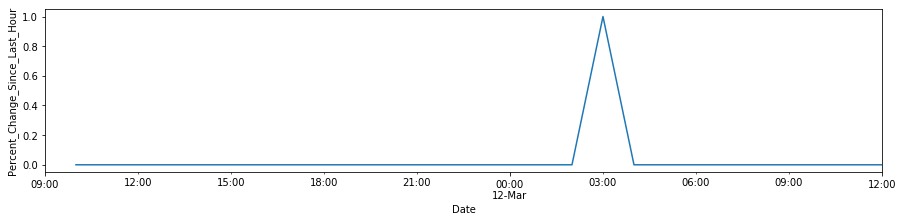

Morocco


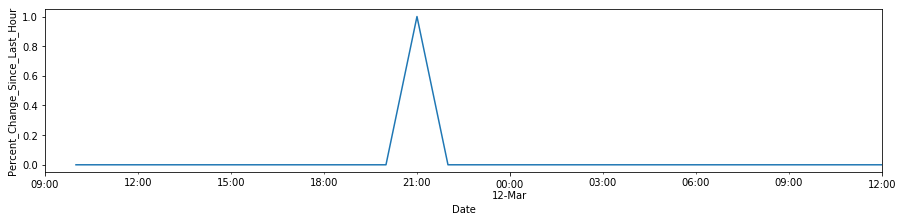

Wisconsin


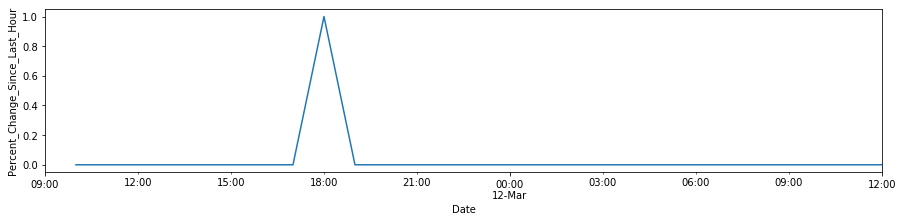

Russia


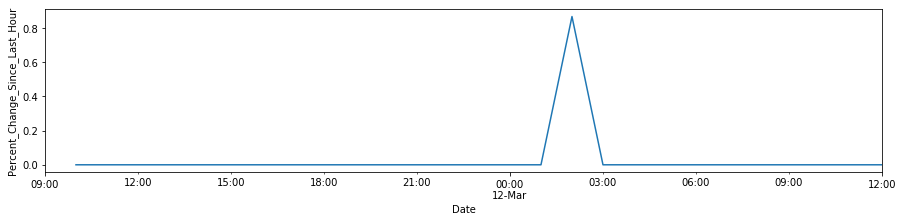

Slovenia


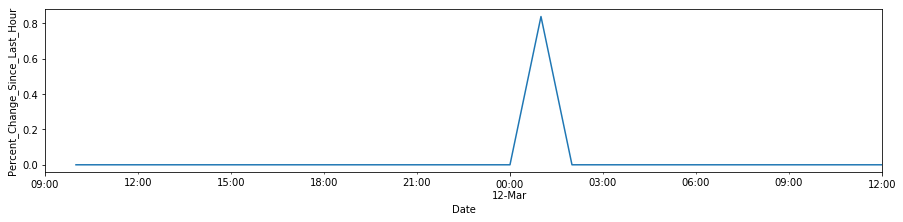

Azerbaijan


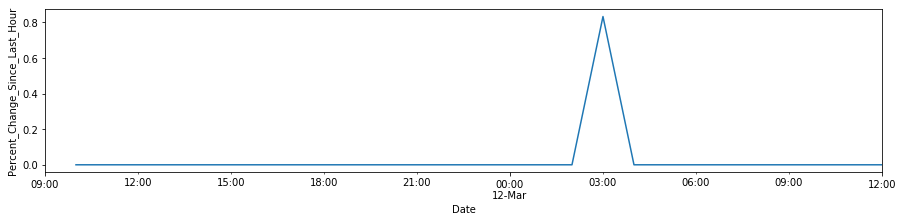

Arizona


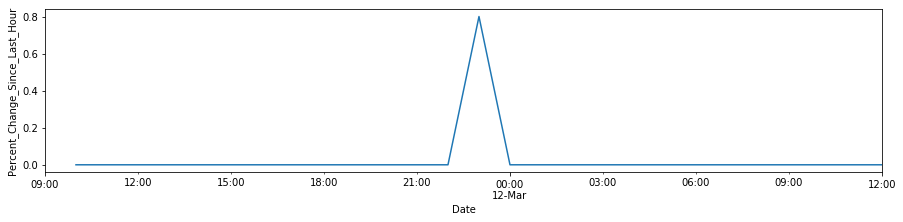

Panamá


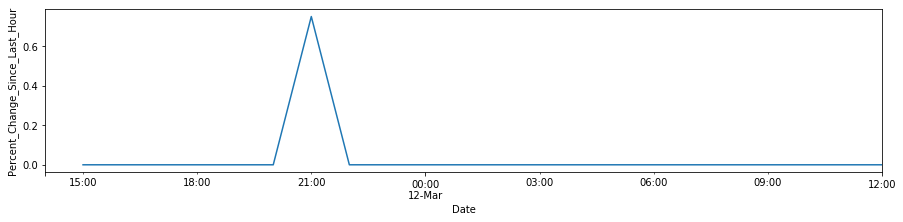

Mexico


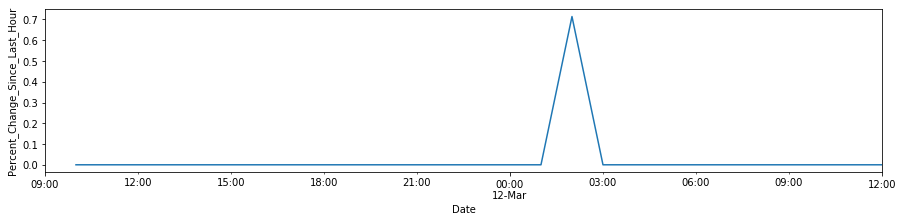

Costa Rica


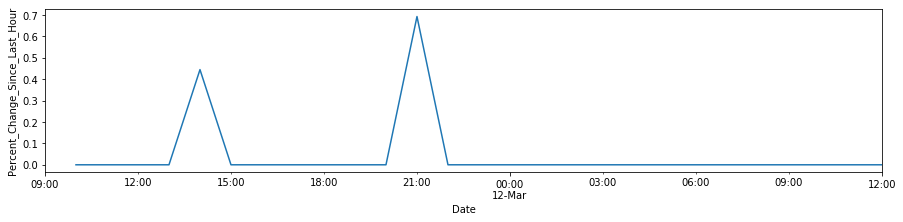

Latvia


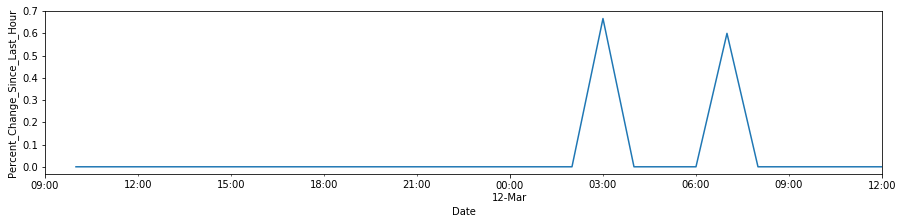

Serbia


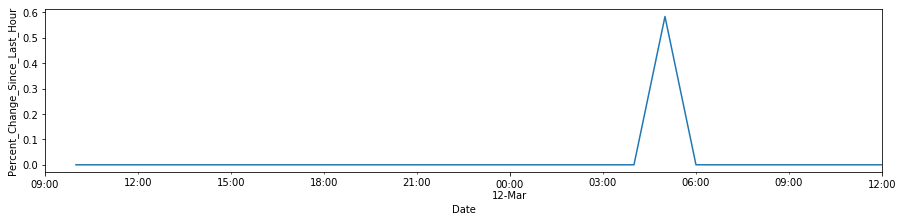

Croatia


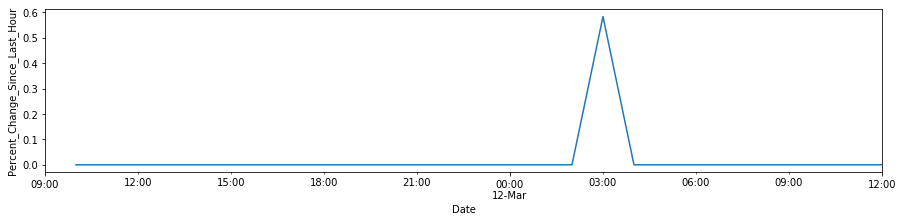

Argentina


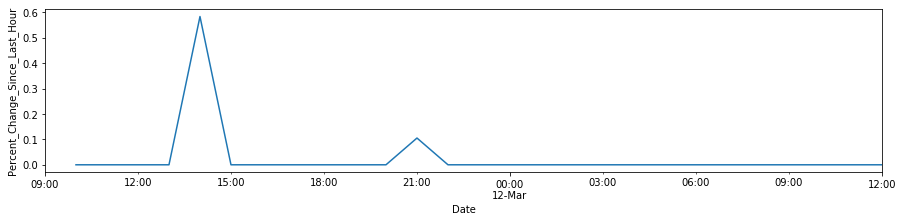

Peru


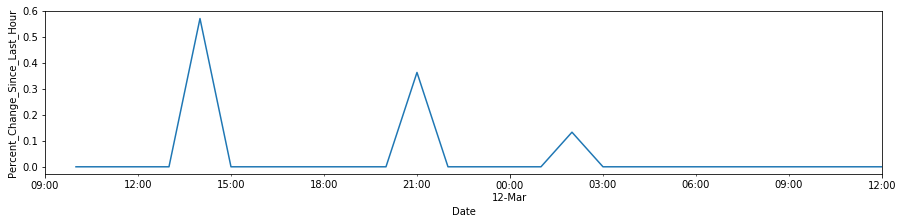

Bosnia


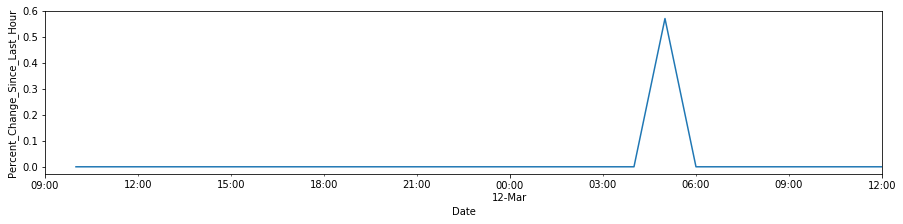

New Jersey


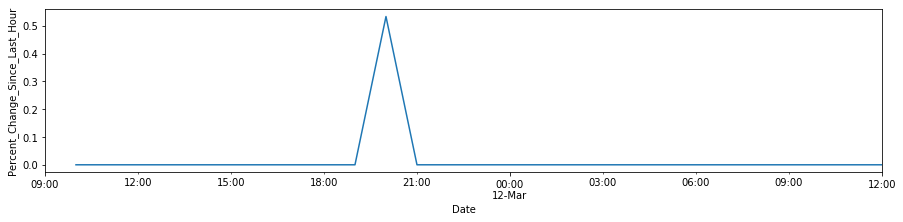

Czech Republic


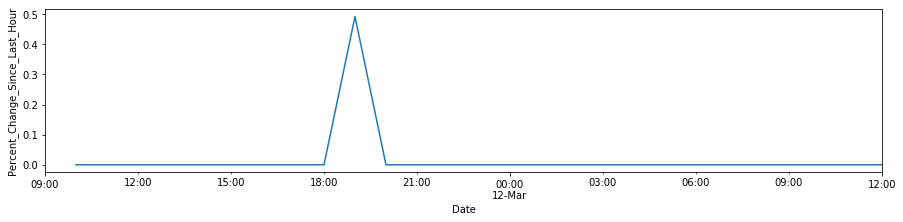

Romania


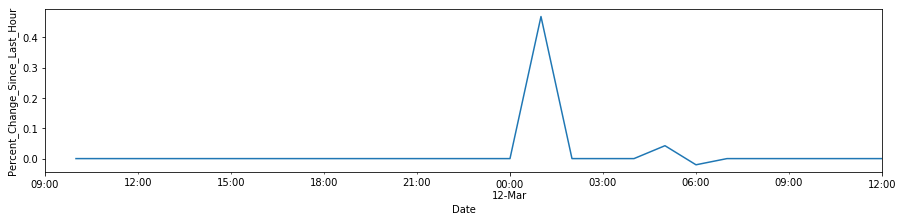

México


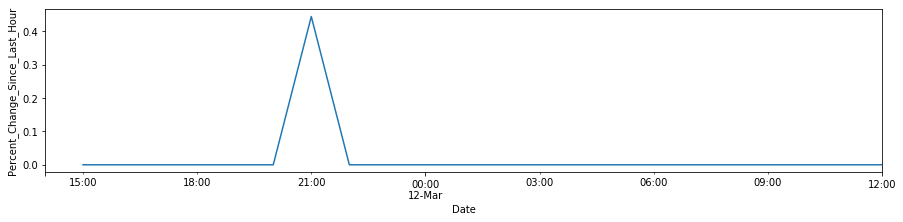

Hungary


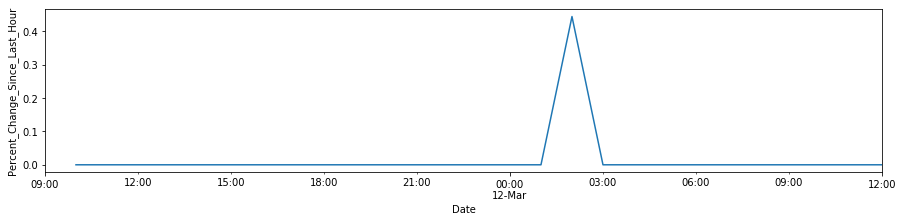

Slovakia


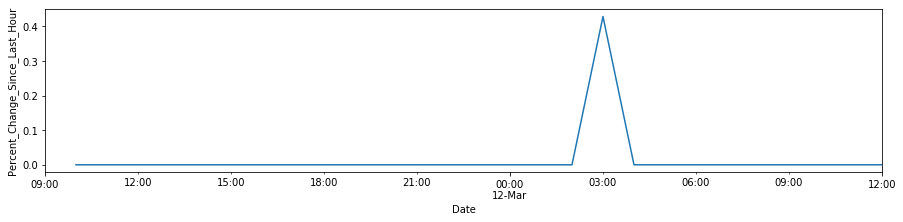

Poland


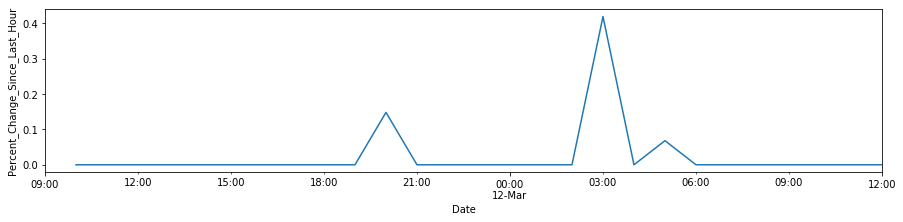

Malta


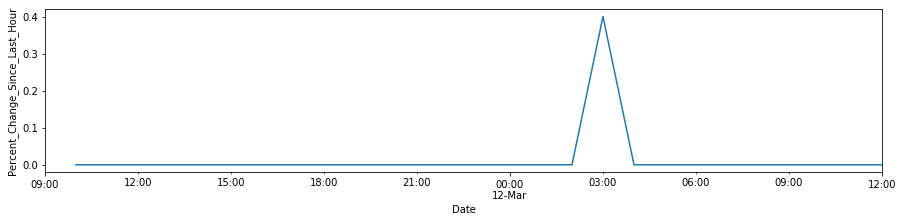

Norway


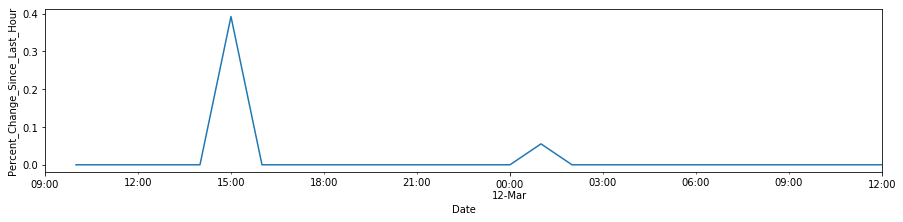

Washington


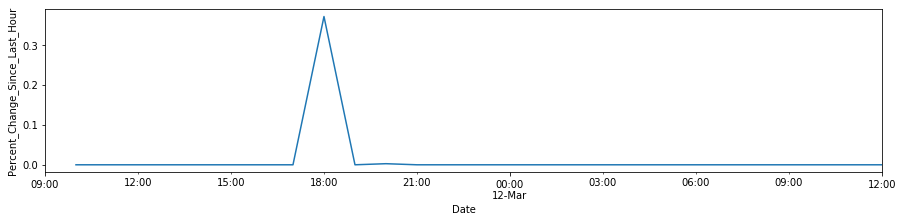

Brazil


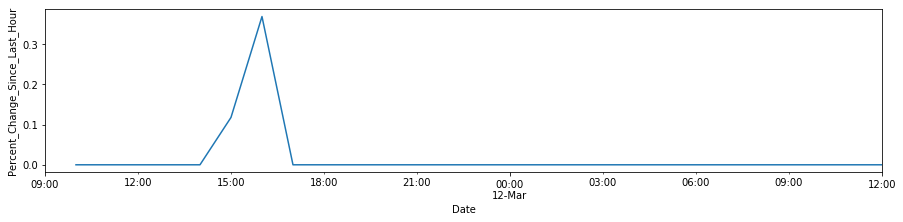

Alberta


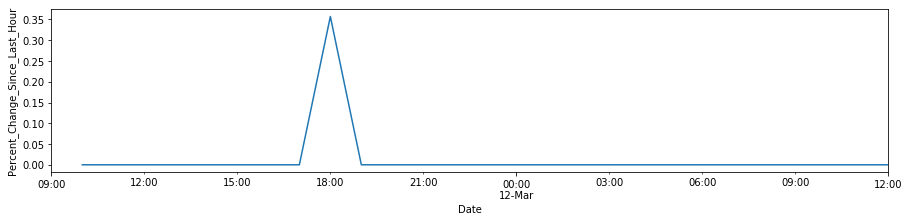

Chile


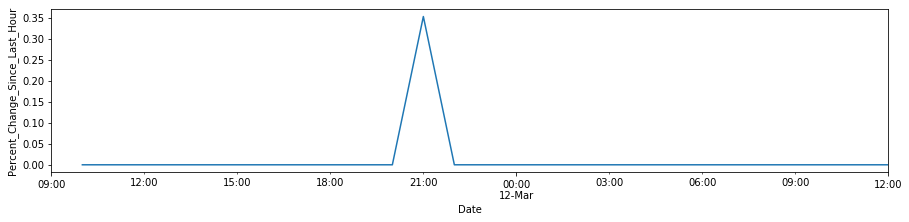

Undisclosed


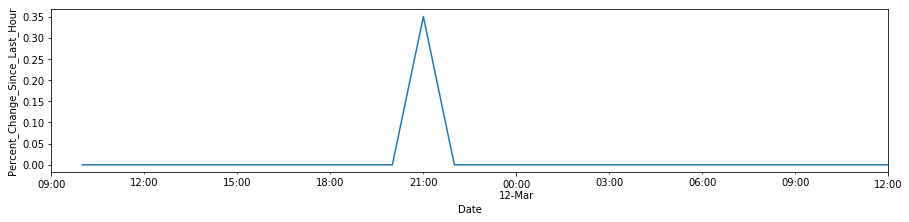

Queensland


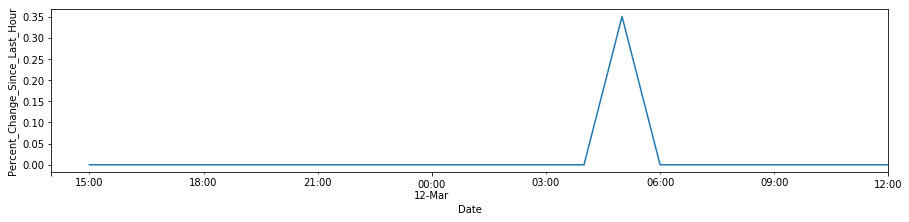

South Australia


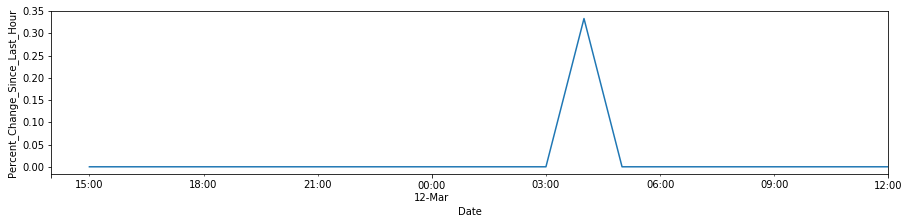

South Africa


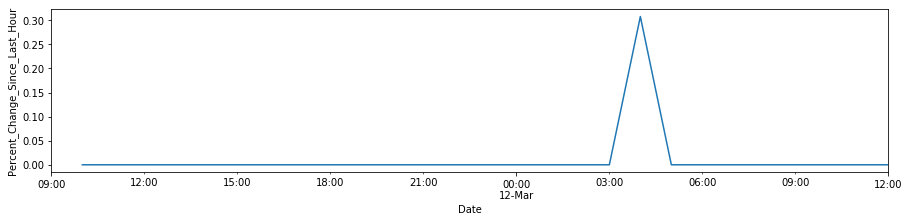

Denmark*


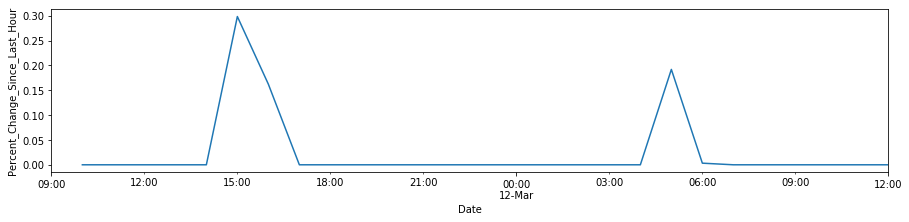

Victoria


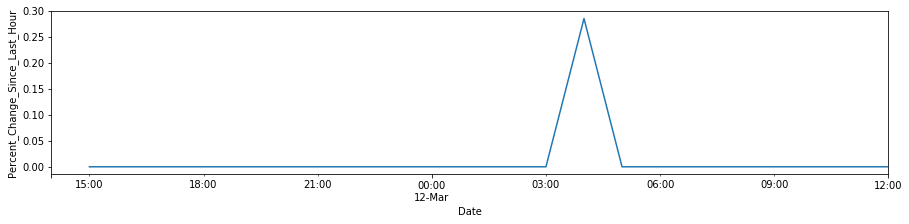

France


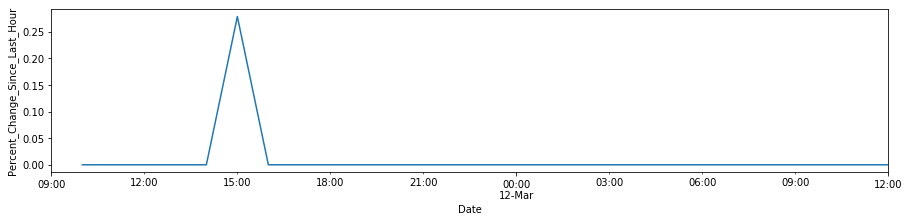

Ireland


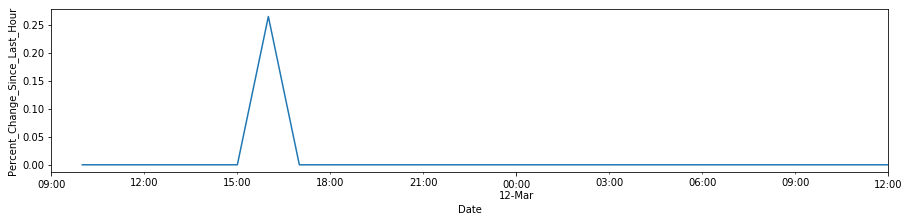

Albania


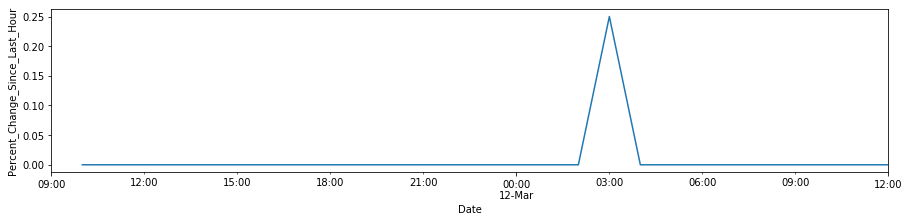

New York


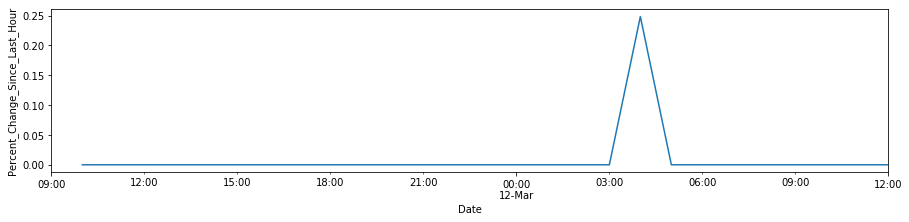

Italy


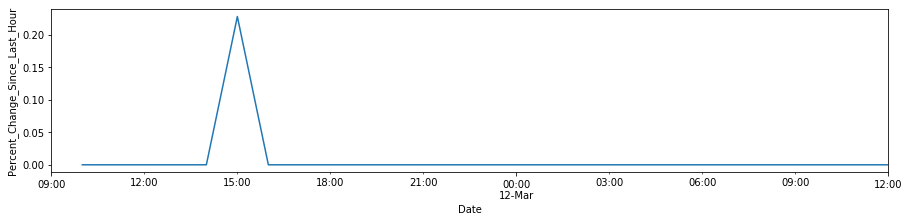

Austria


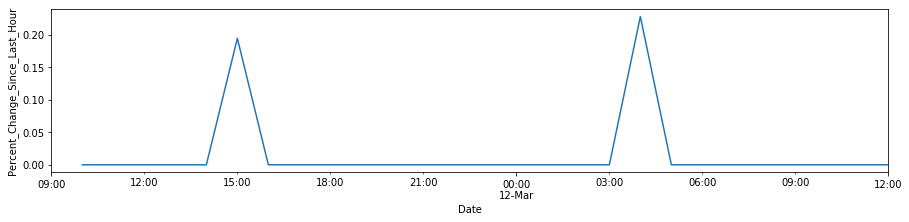

India


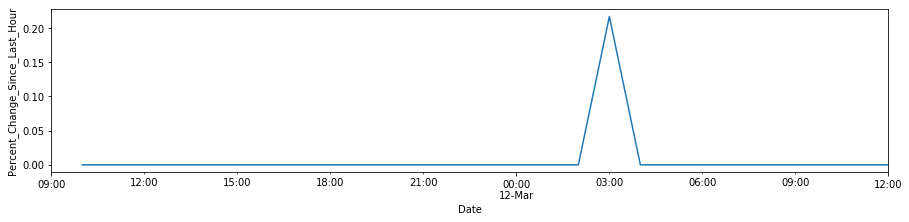

Algeria


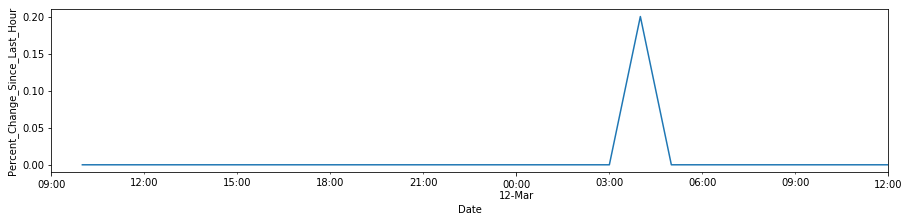

United Kingdom


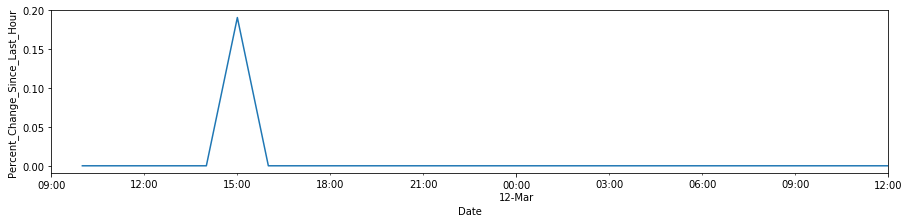

Thailand


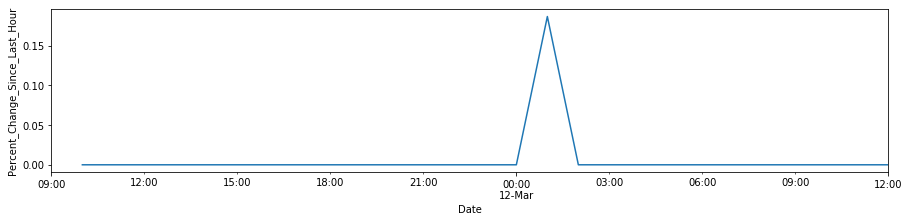

New South Wales


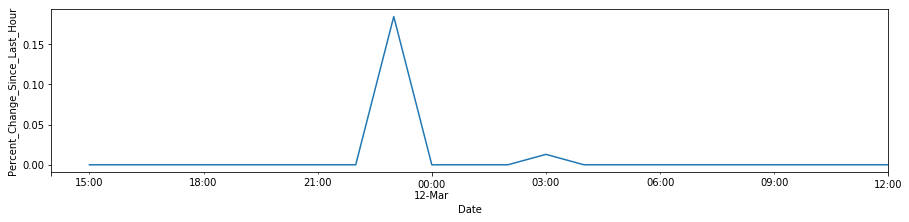

Iraq


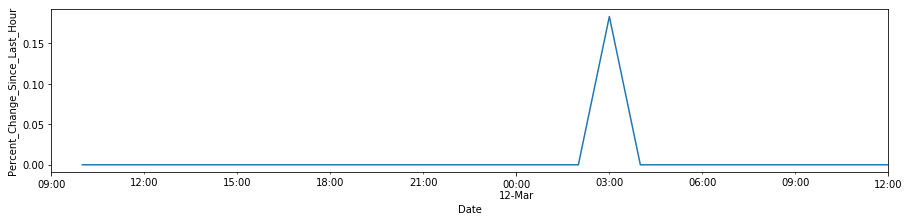

Israel


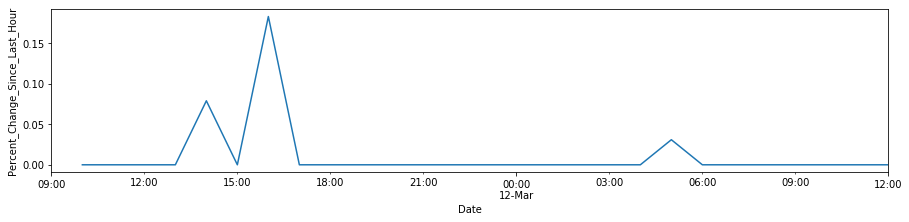

British Columbia


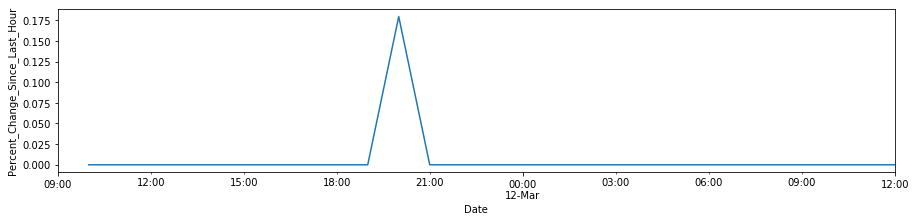

Germany


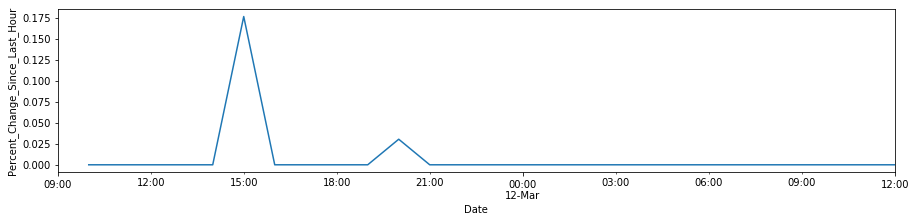

Tunisia


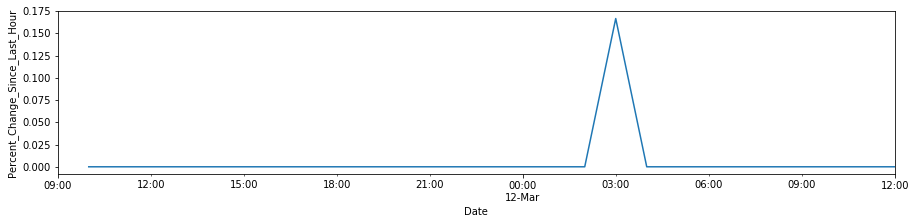

Bulgaria


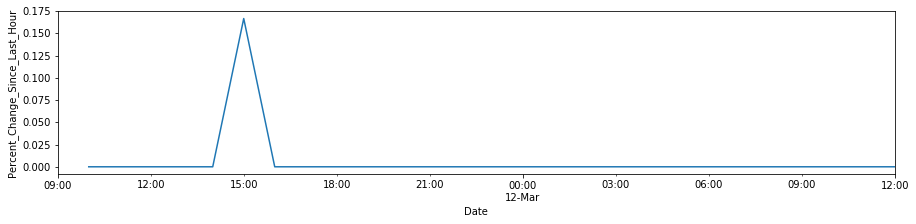

Sweden


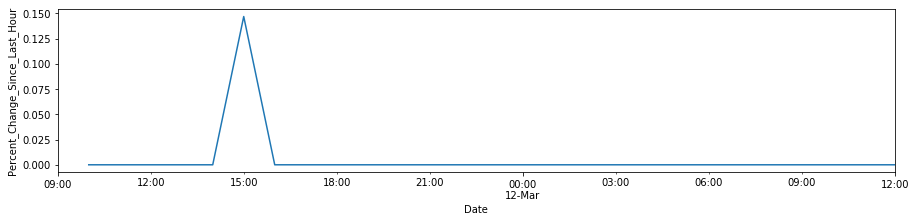

Ecuador


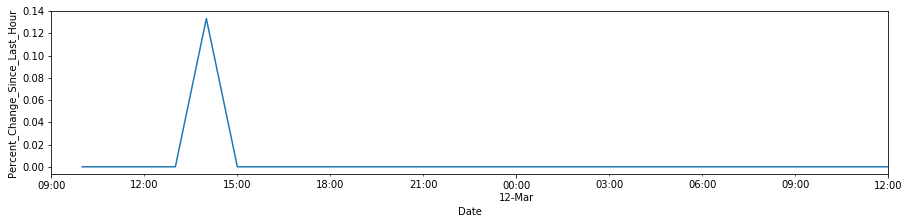

Oman


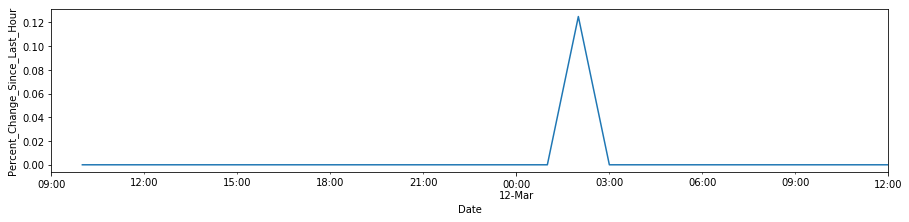

United States


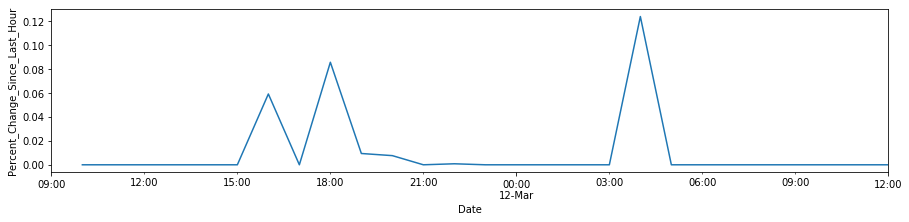

Iran


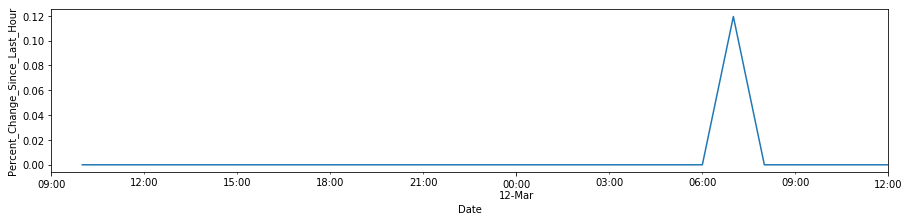

Egypt


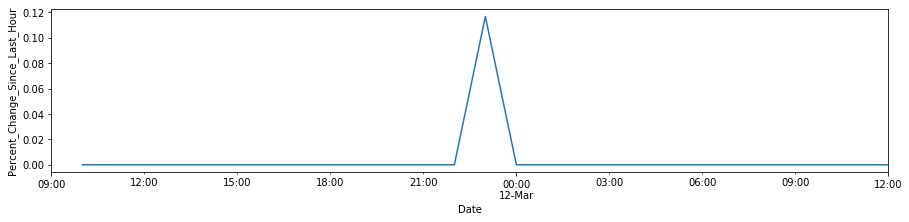

Greece


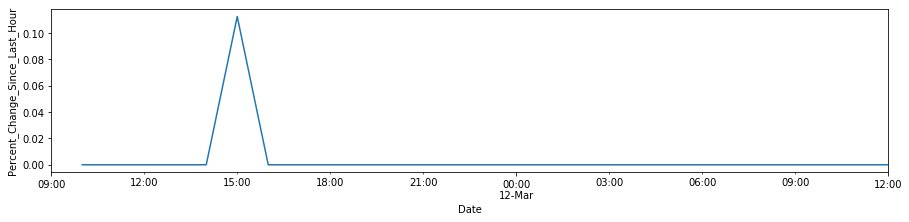

Kuwait


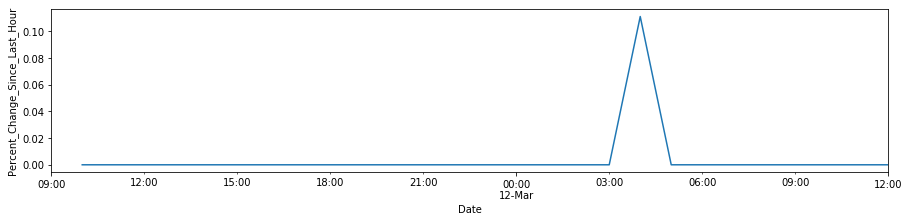

Japan


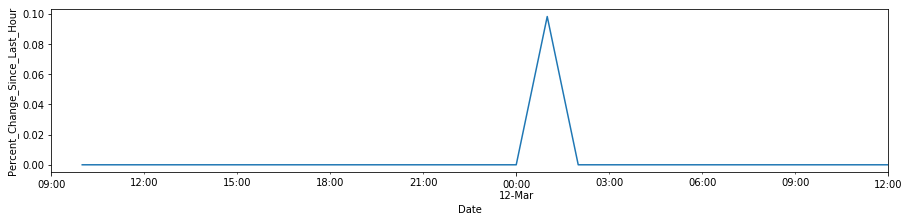

Australia


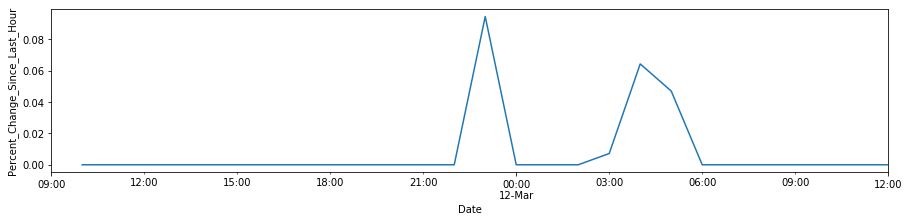

Hong Kong


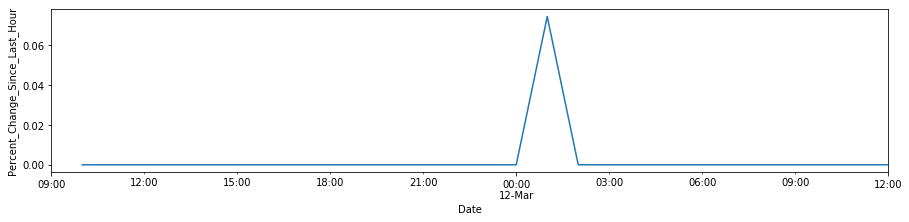

Singapore


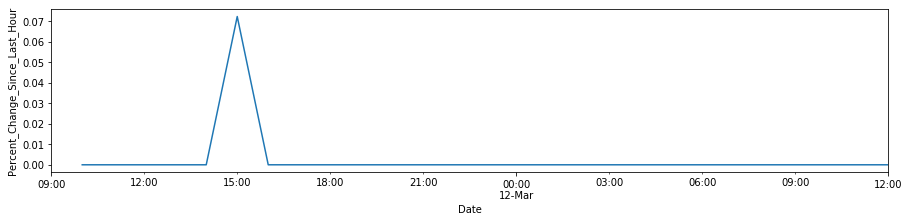

Canada


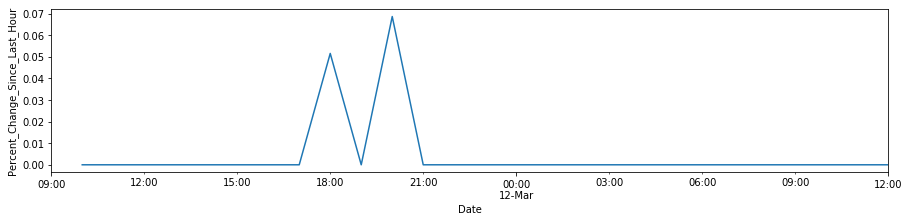

Philippines


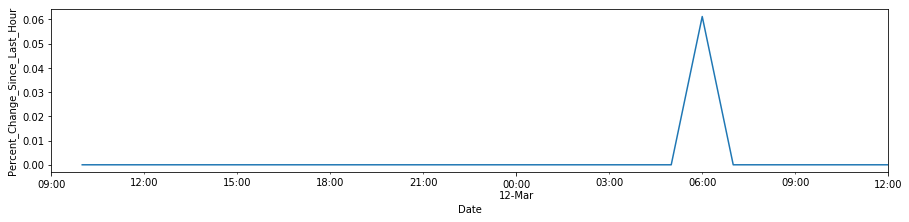

Vietnam


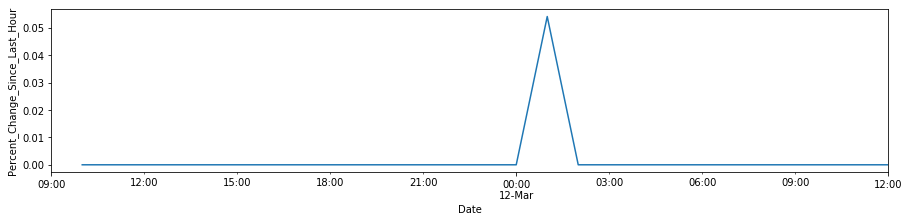

Spain


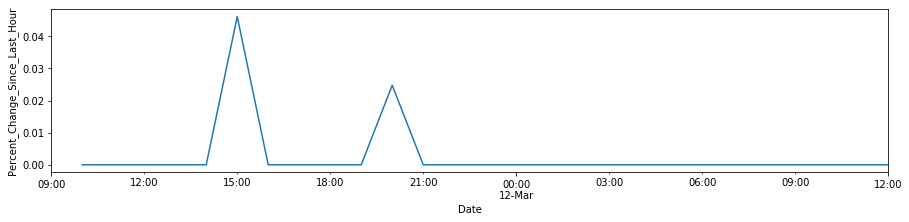

Bahrain


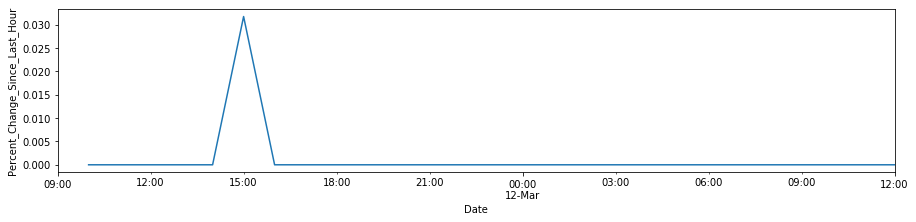

Taiwan


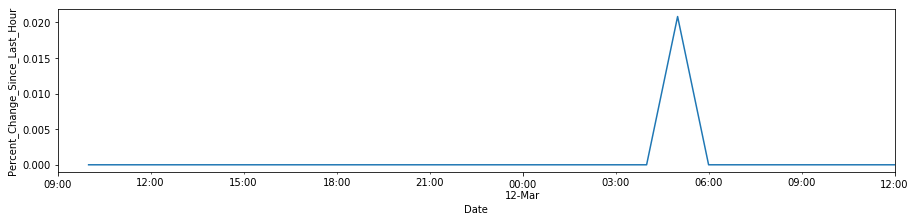

South Korea


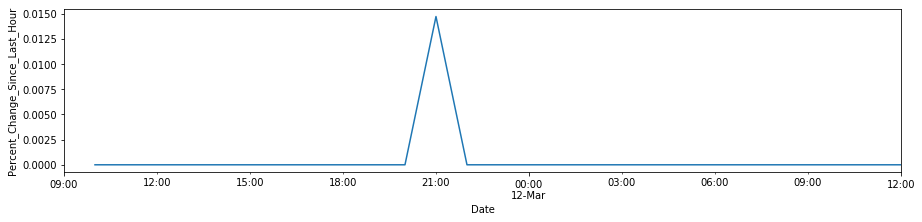

Mainland China


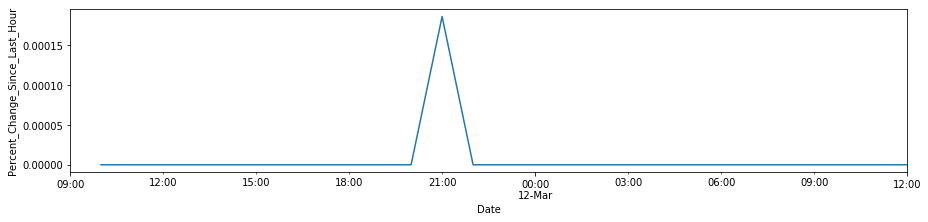

Hubei province (includes Wuhan)


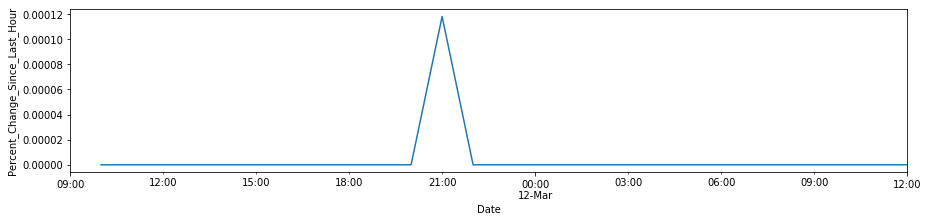

Oregon


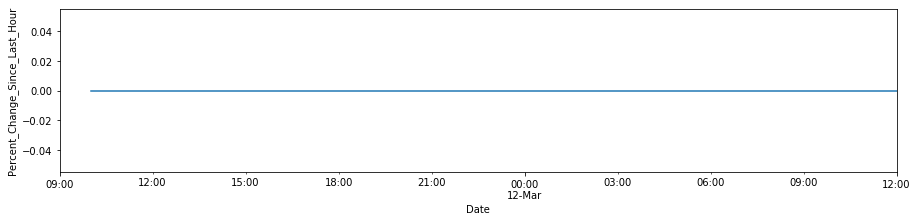

Other regions


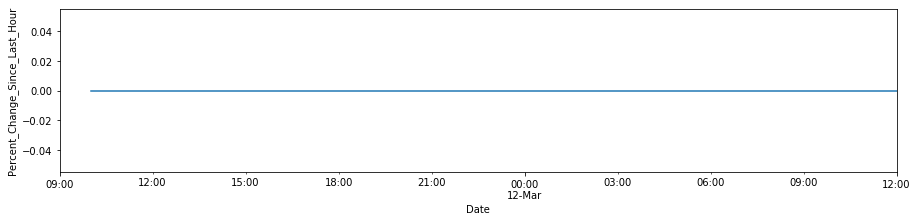

Pakistan


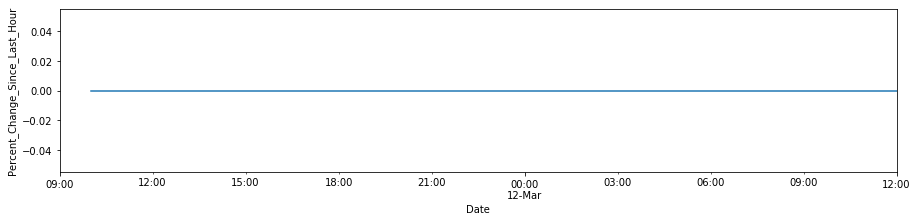

Palestine


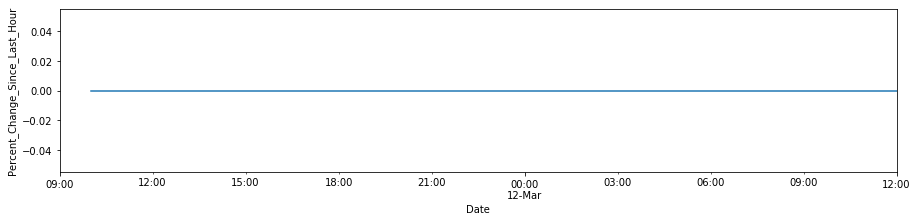

Ontario


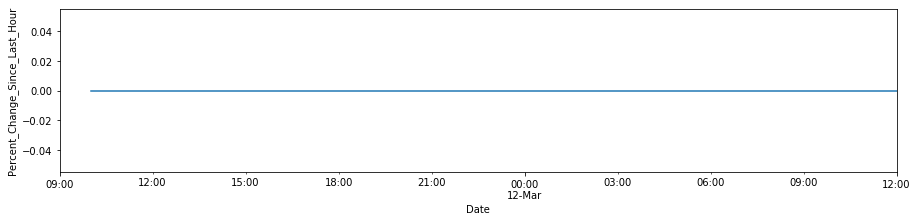

Ohio


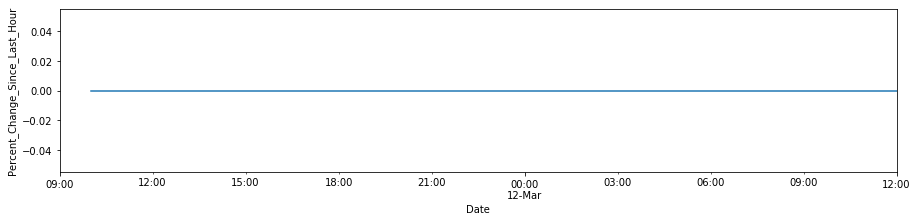

Oklahoma


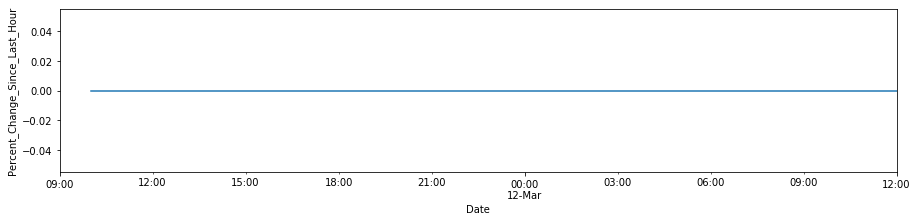

Northern Territory


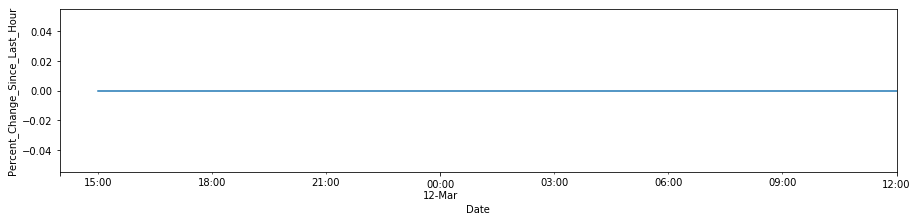

Afghanistan


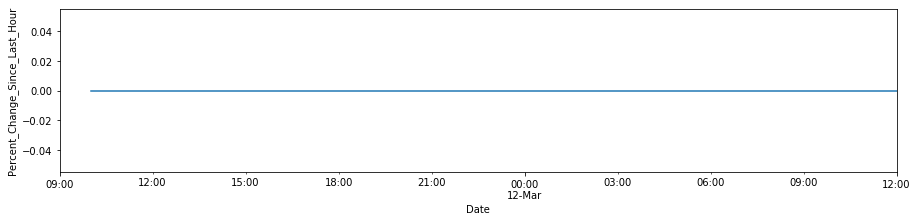

Portugal


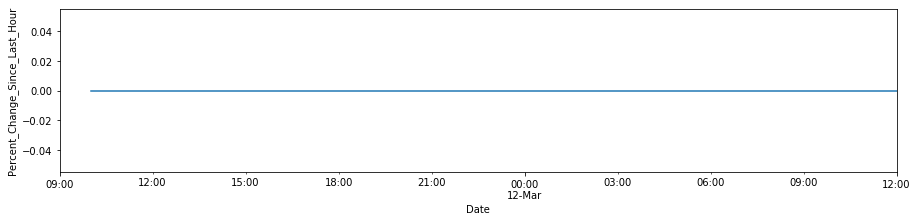

Quebec


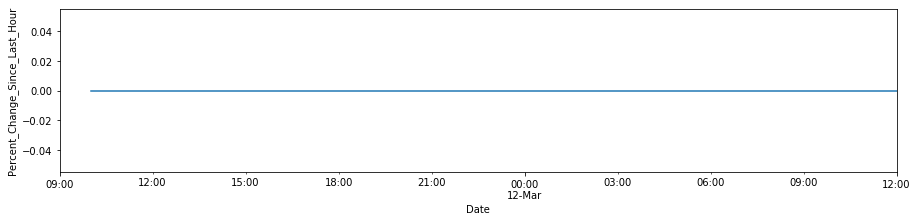

Paraguay


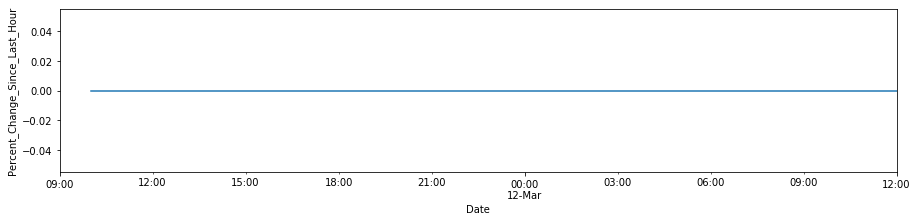

Panama


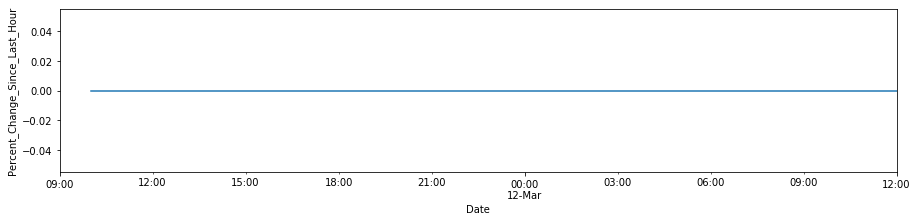

Pennsylvania


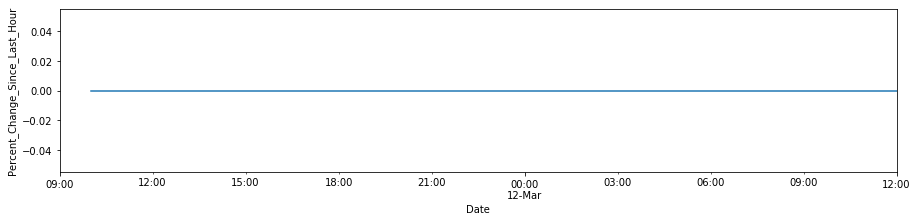

North Macedonia


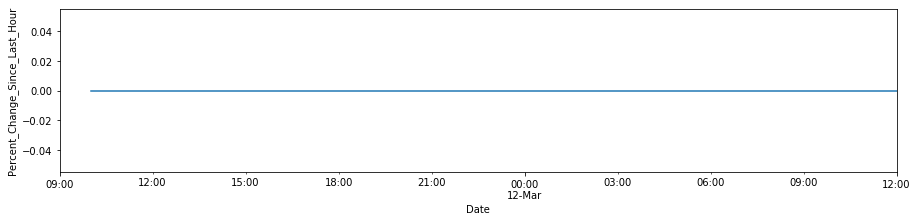

Monaco


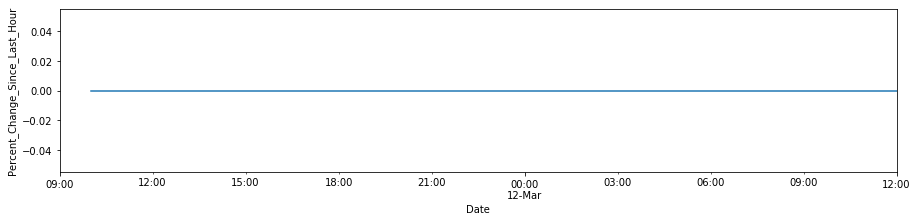

Moldova


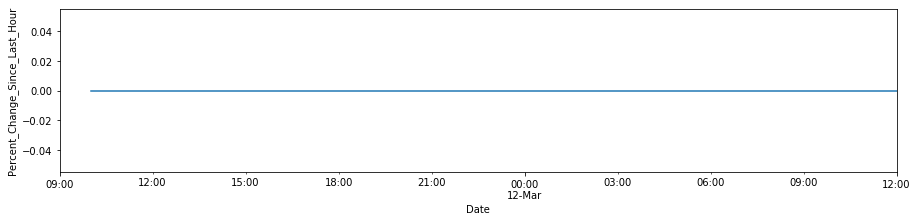

Nebraska


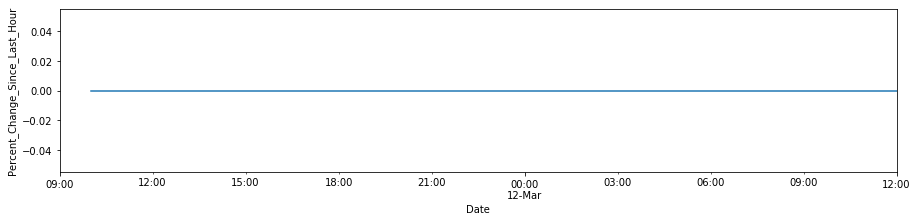

Nepal


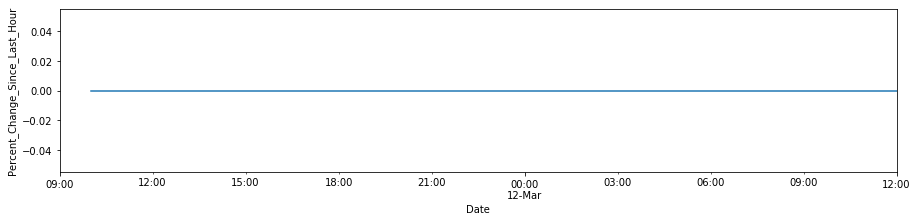

Michigan


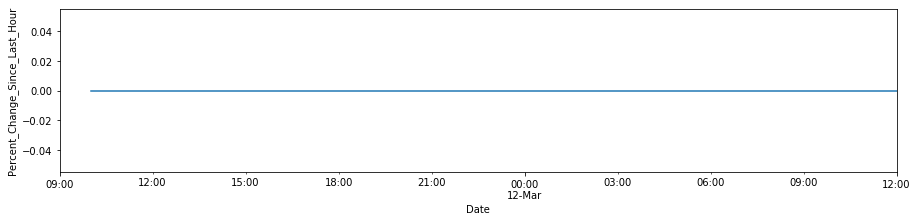

Missouri


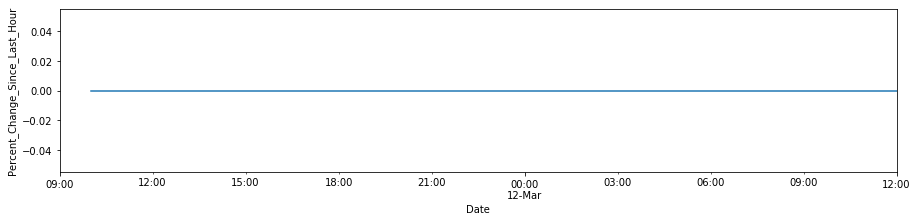

Massachusetts


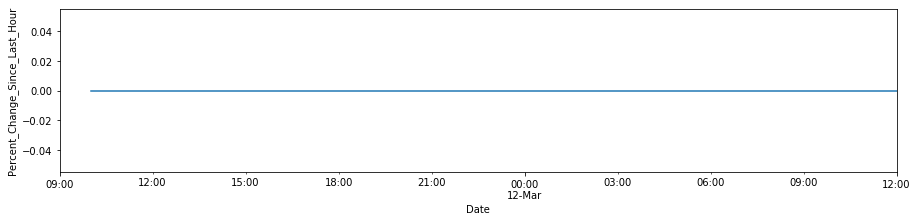

Minnesota


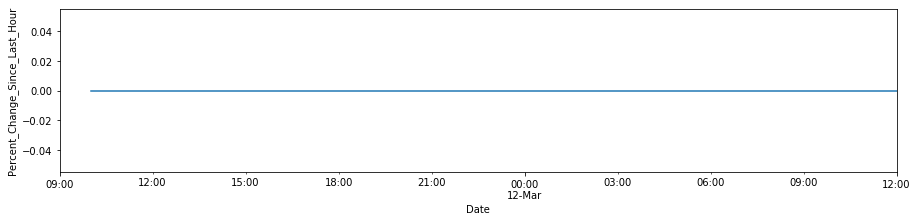

New Zealand


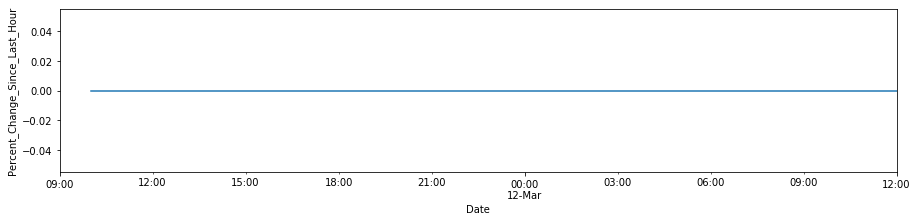

Nigeria


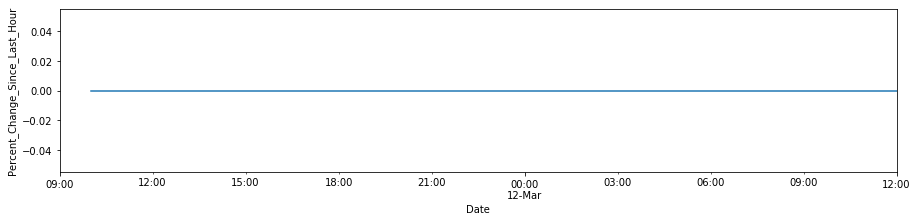

North Carolina


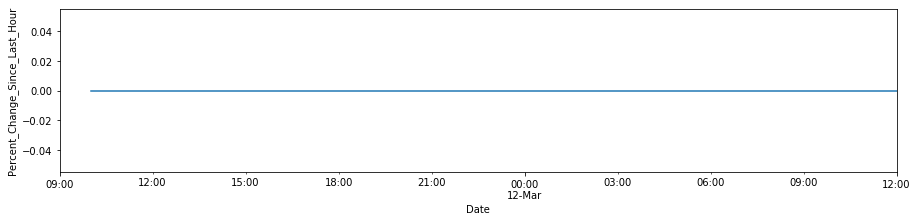

Nevada


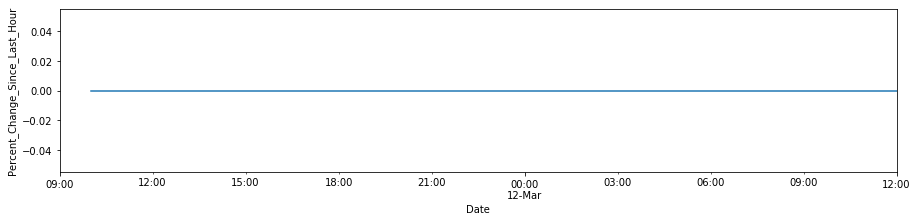

Netherlands


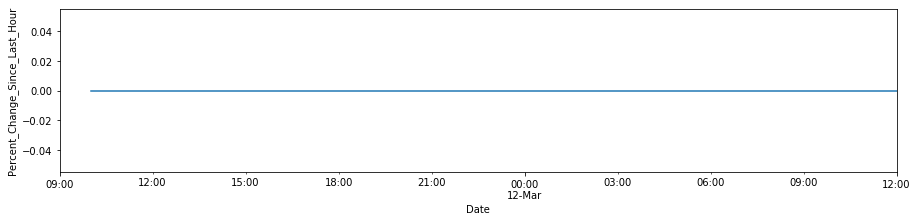

New Hampshire


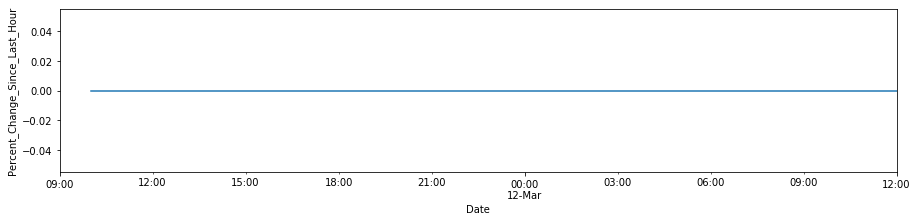

Rhode Island


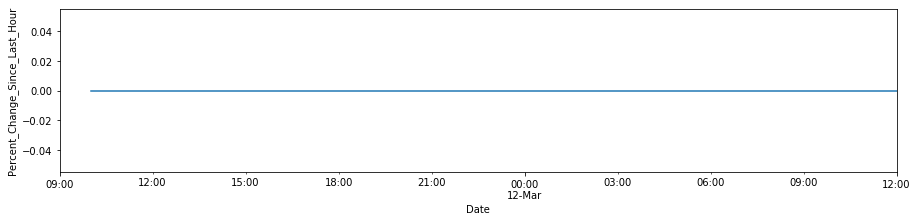

UAE


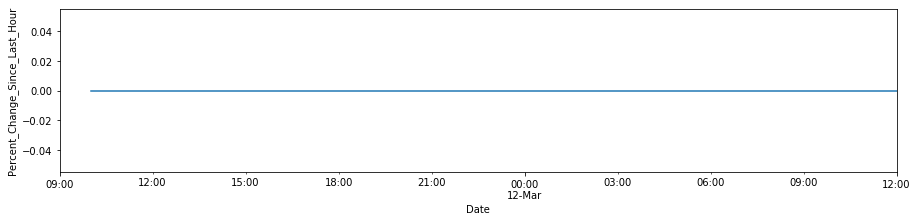

Turkey


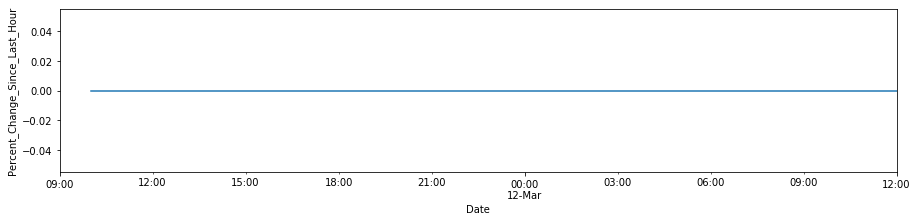

Ukraine


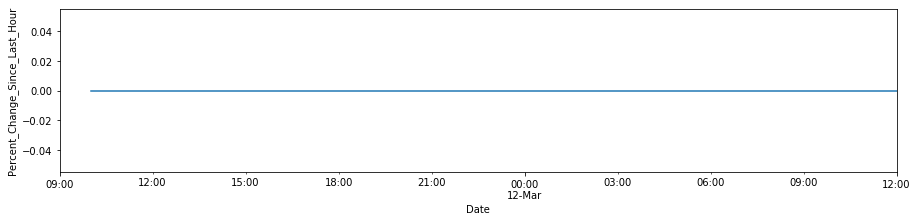

Tennessee


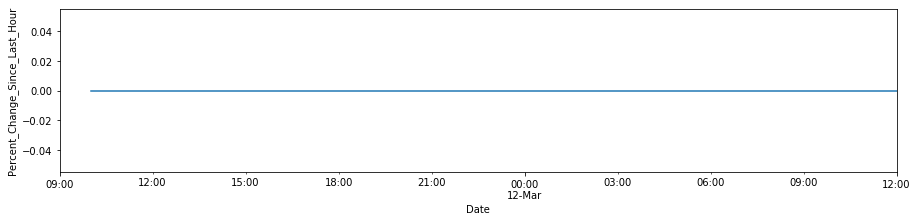

Texas


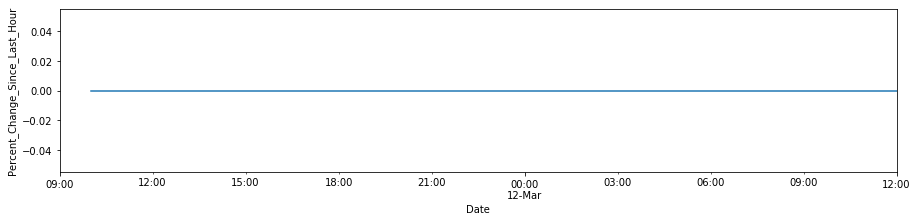

Tasmania


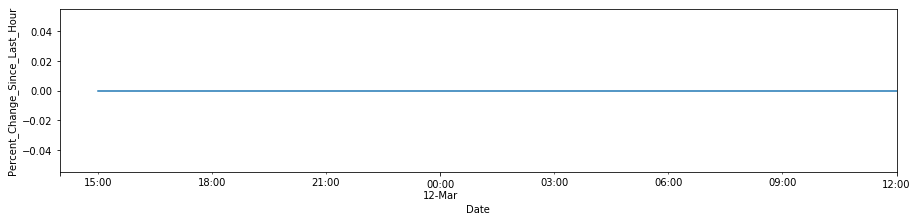

Togo


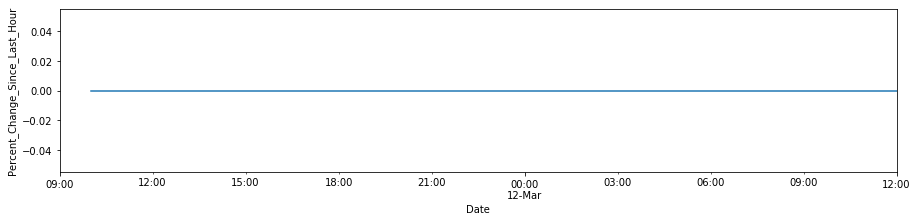

Virginia


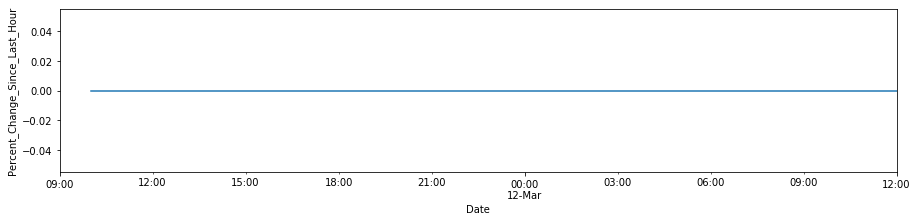

Western Australia


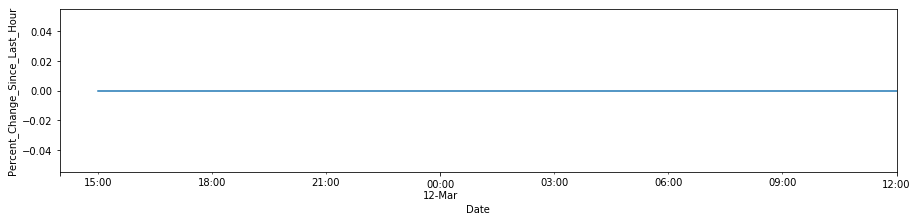

Zhejiang province


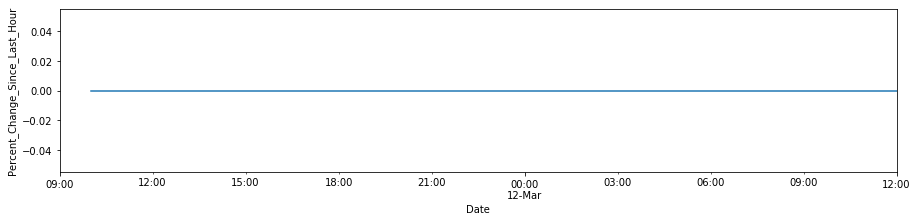

Utah


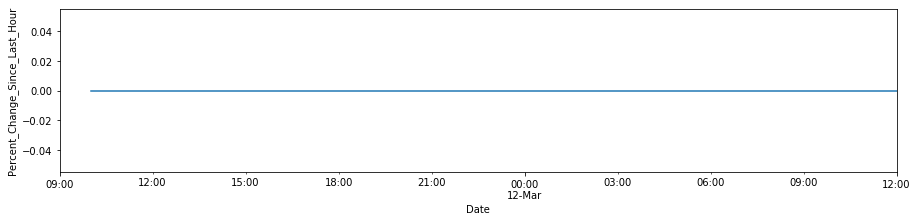

Vatican City


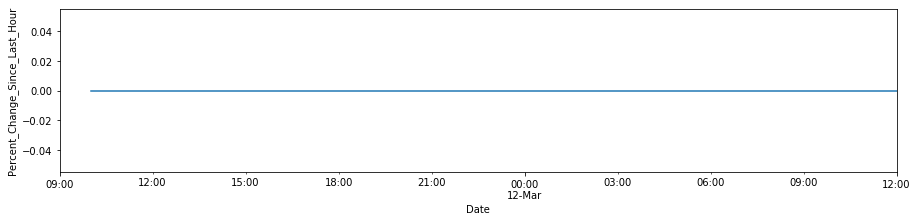

Vermont


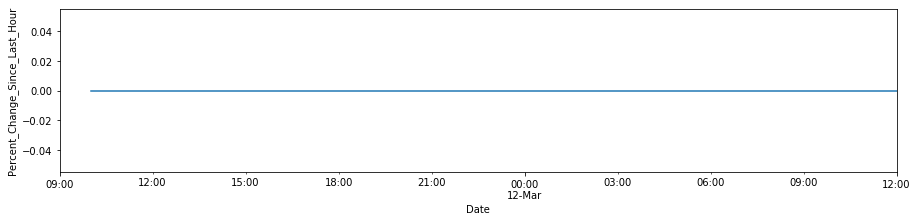

Rep. Dominicana


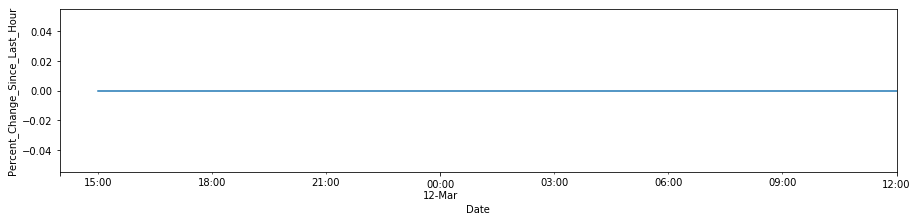

Senegal


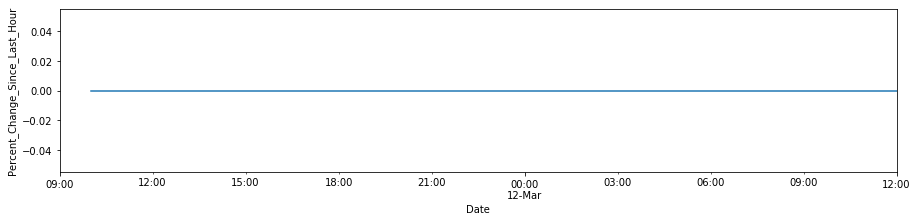

Shanghai


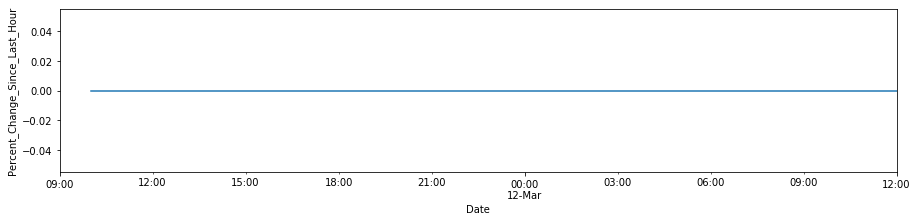

San Marino


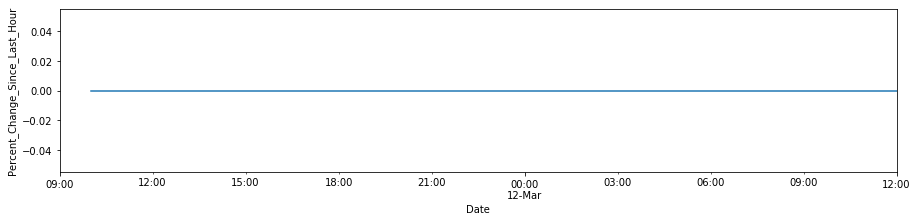

Sri Lanka


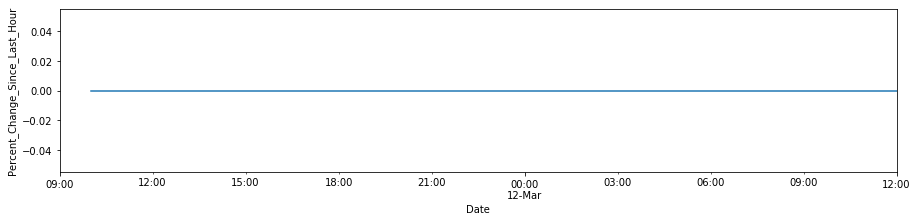

Switzerland


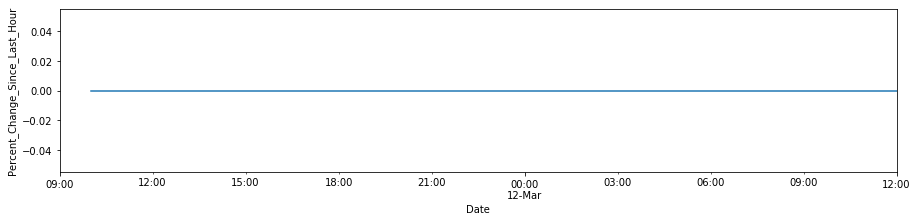

TBD


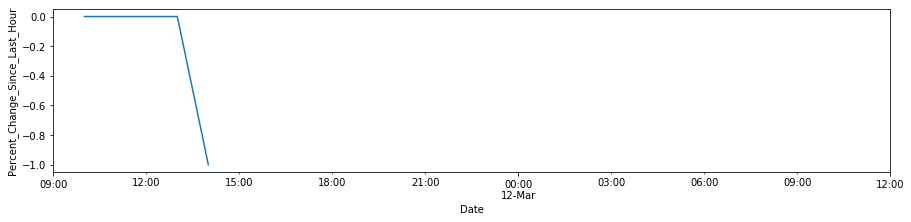

South Dakota


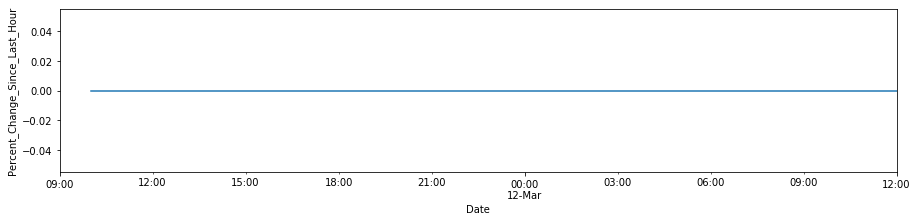

South Carolina


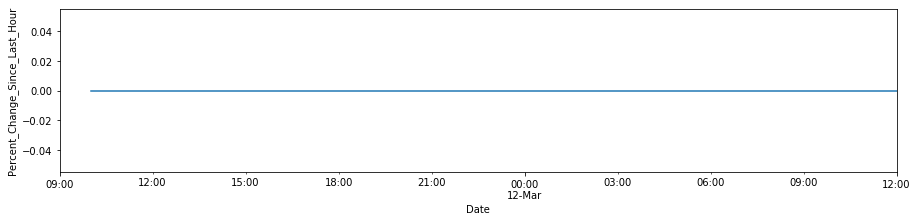

Maryland


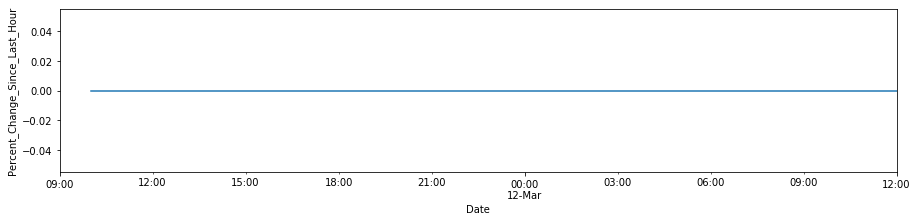

Colorado


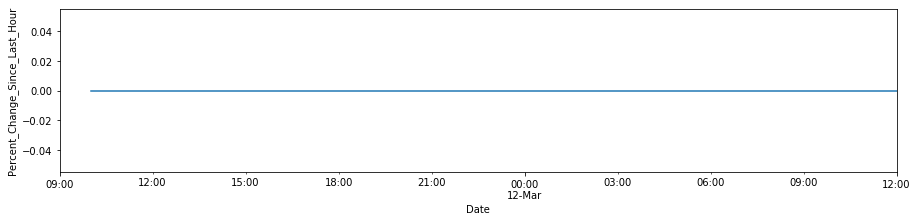

Connecticut


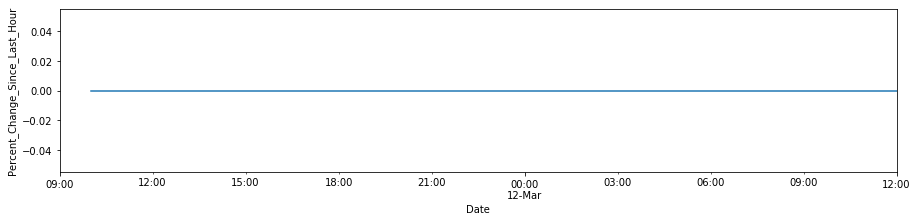

Cuba


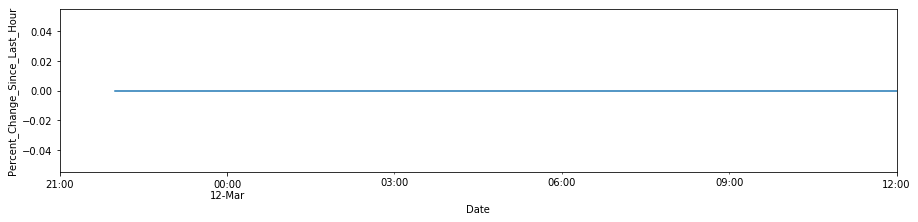

California


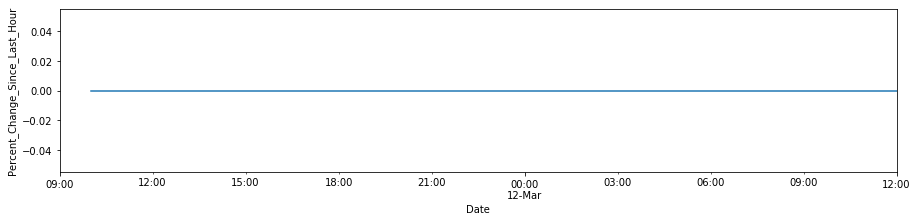

Cambodia


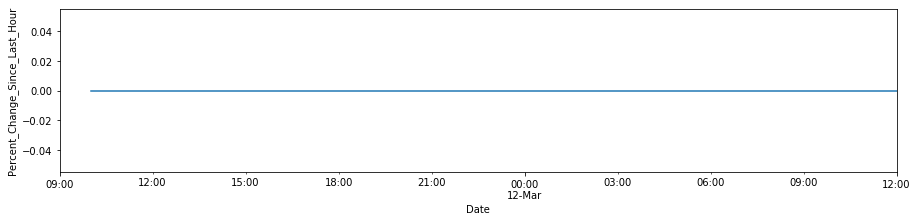

Cameroon


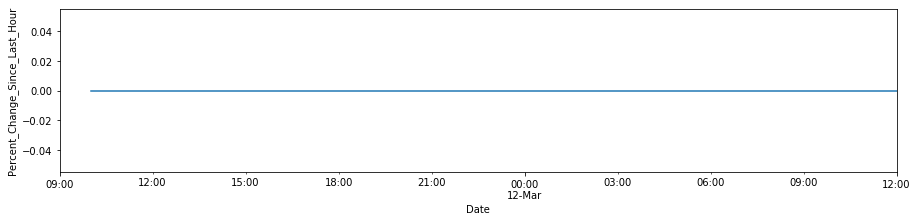

Estonia


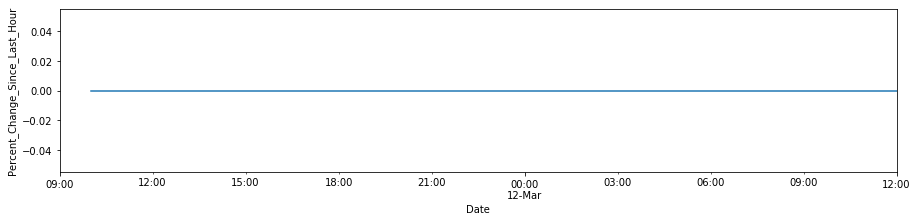

España


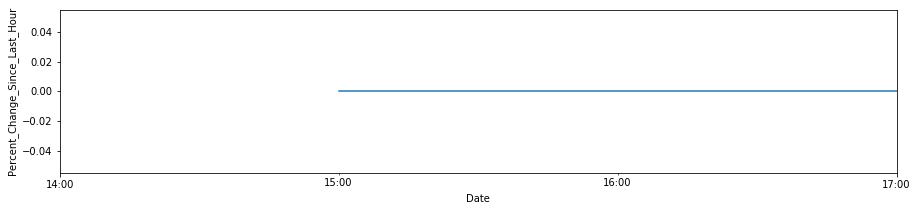

Dominican Republic


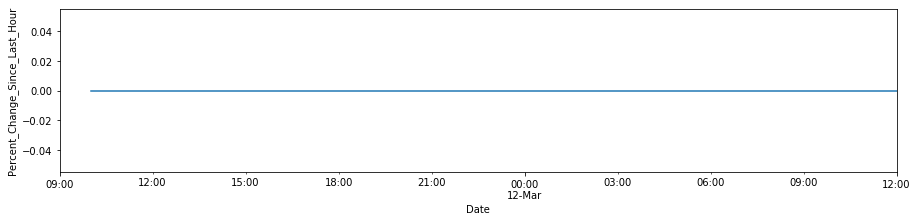

Finland


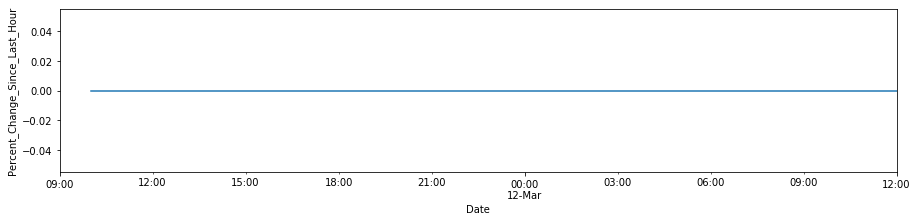

Florida


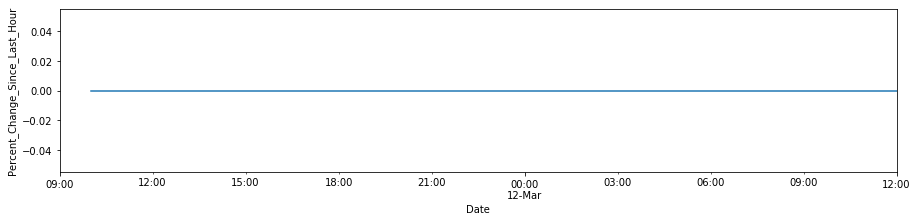

Cyprus


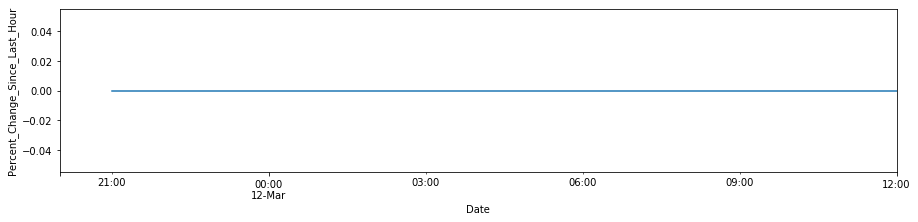

District of Columbia


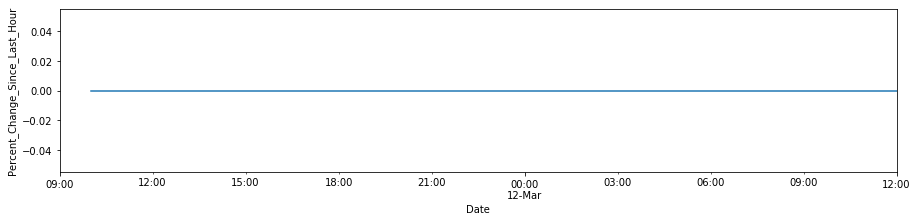

Diamond Princess


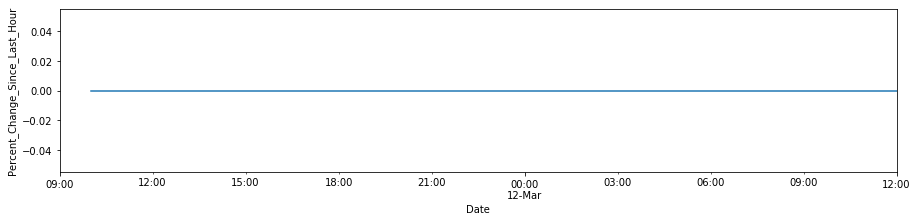

Armenia


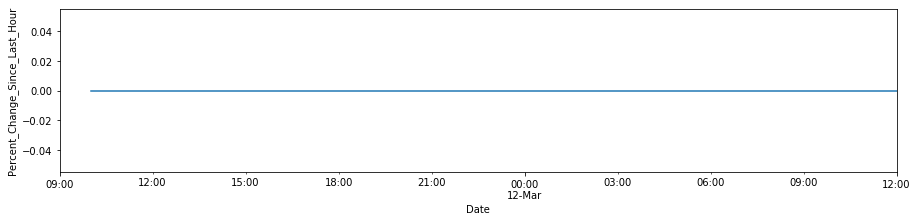

Andorra


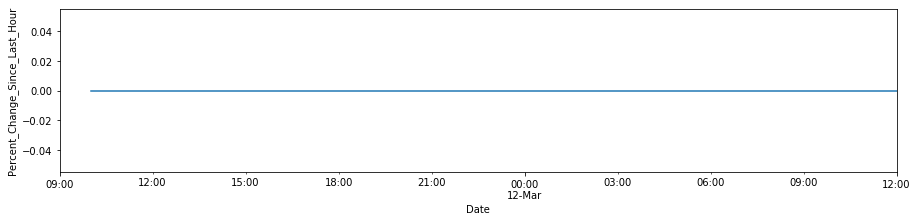

Bolivia


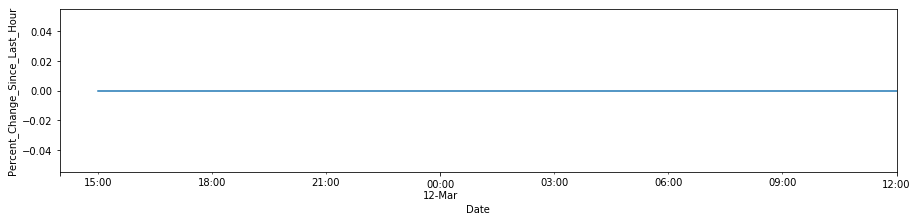

Bhutan


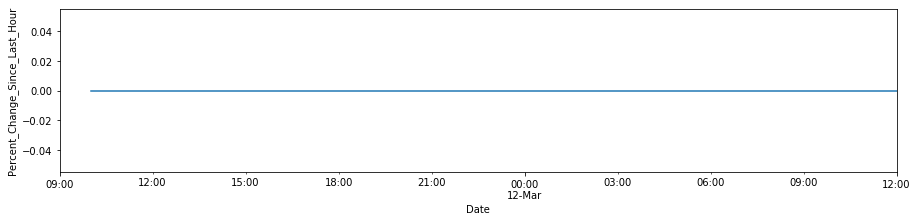

Bangladesh


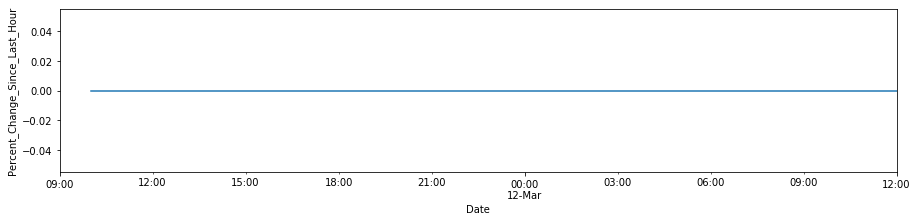

Beijing


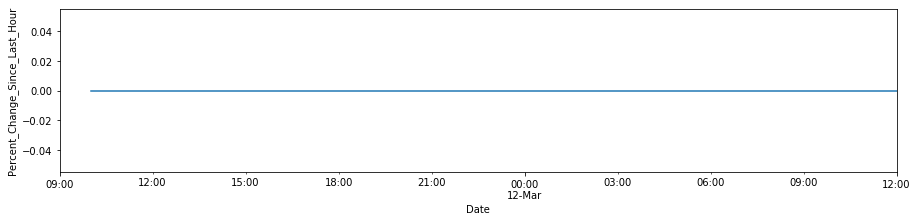

Belgium


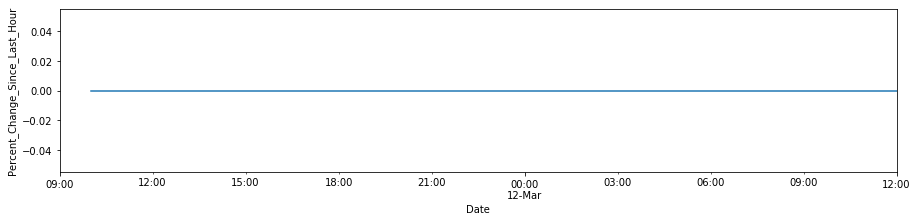

Kansas


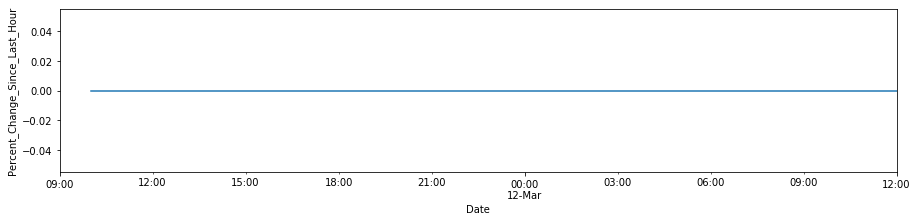

Kentucky


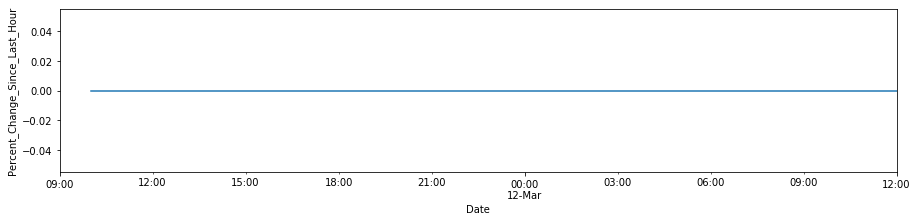

Jordan


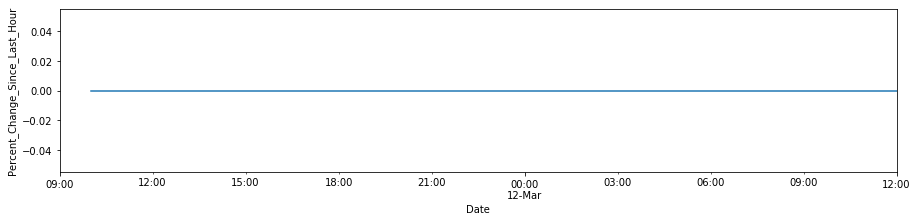

Lebanon


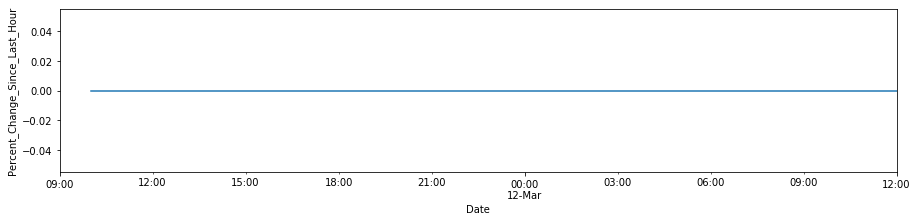

Jamaica


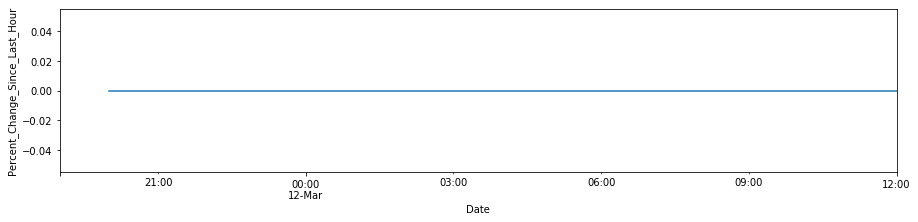

Malaysia


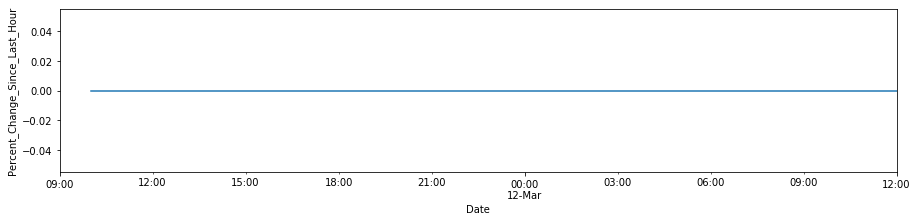

Maldives


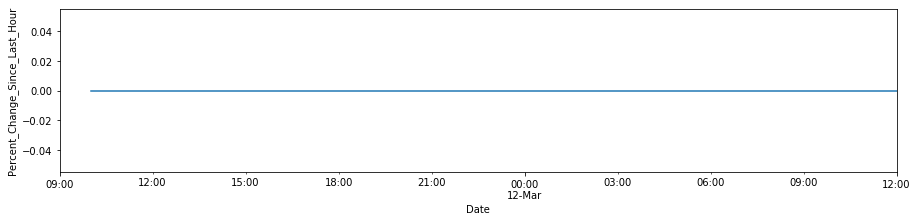

Macau


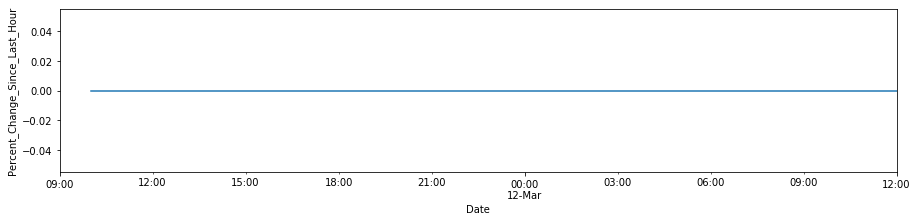

Lithuania


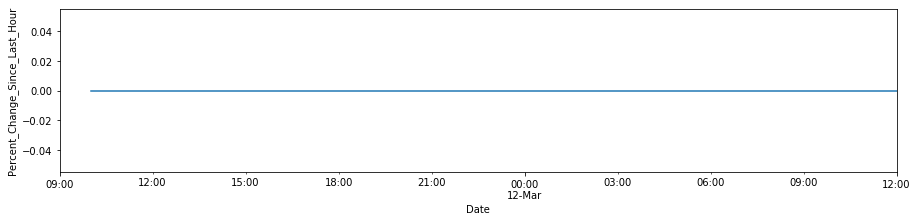

Liechtenstein


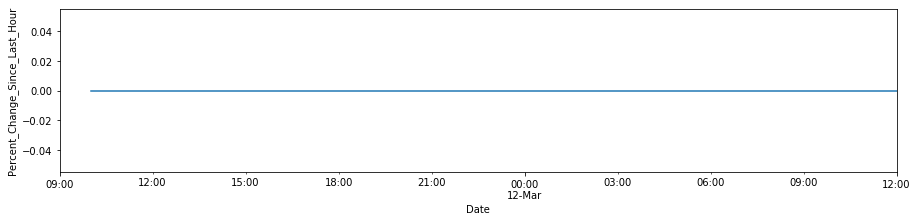

Louisiana


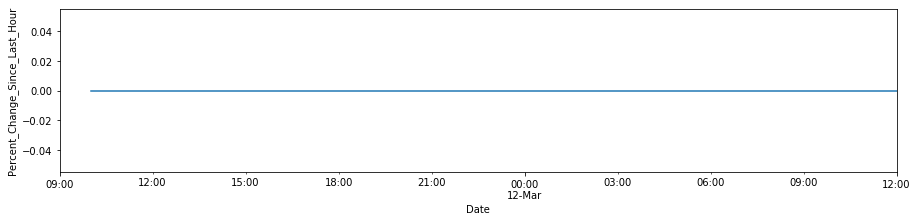

Guangdong province


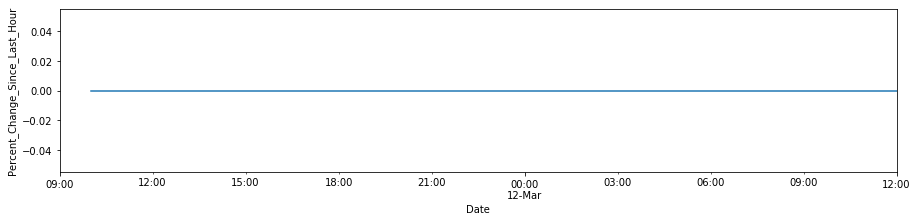

Hawaii


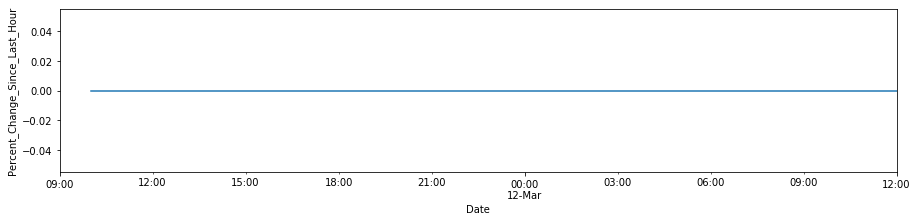

Honduras


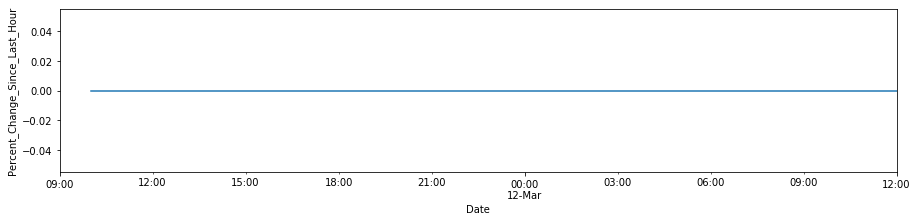

Henan province


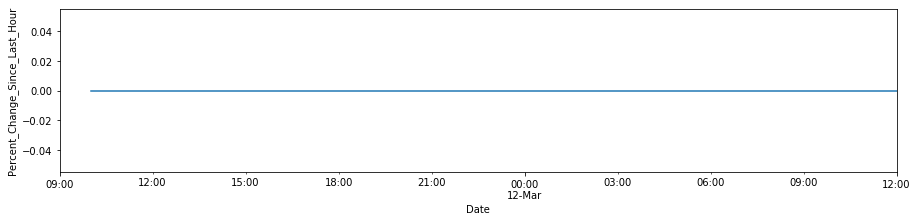

Georgia


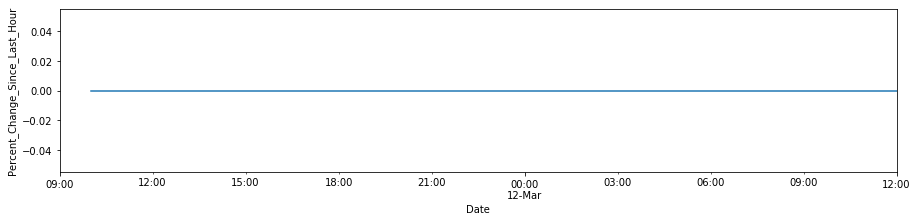

Grand Princess


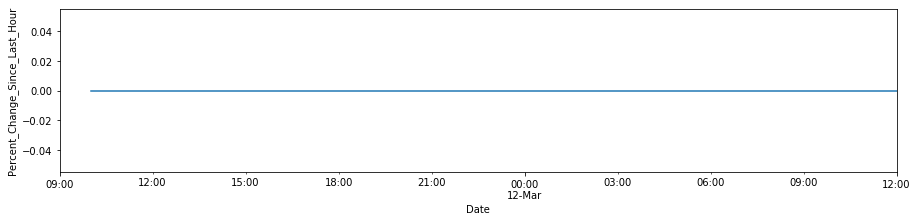

Gibraltar


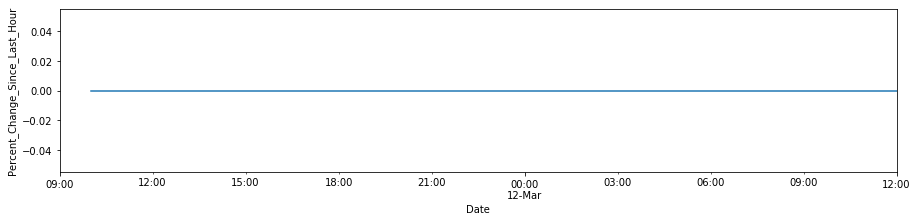

Indiana


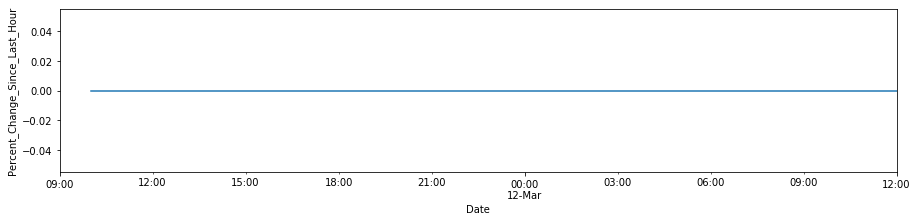

Indonesia


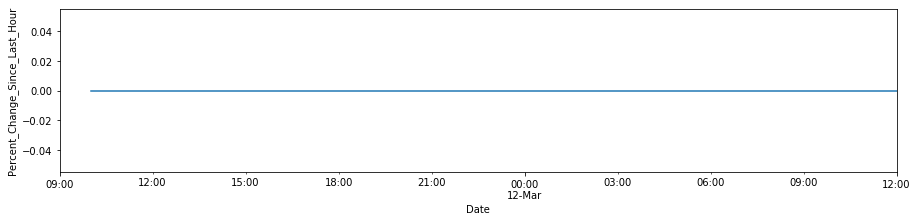

Illinois


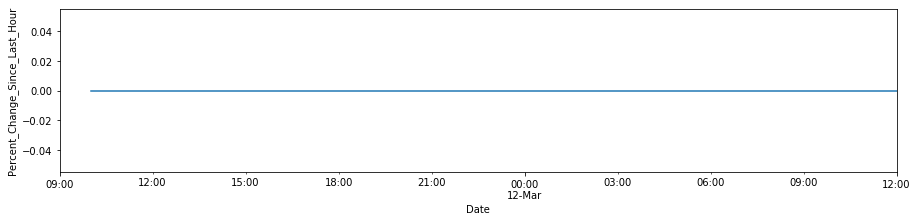

Hunan province


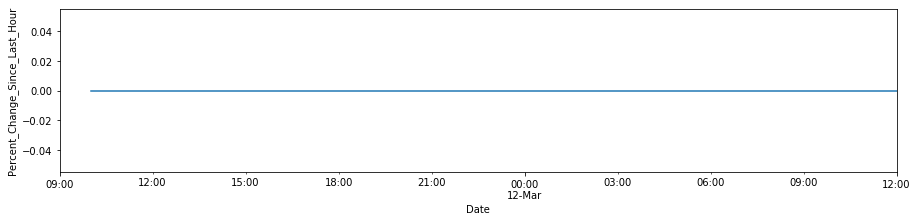

Iceland


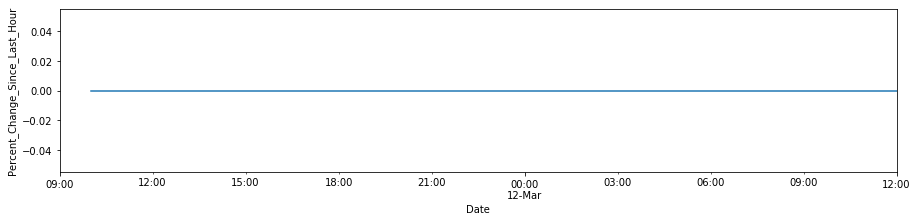

Alabama


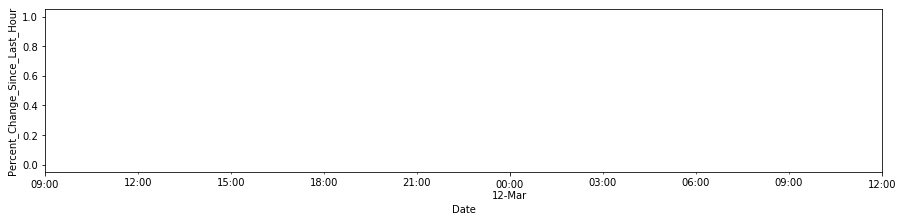

Alaska


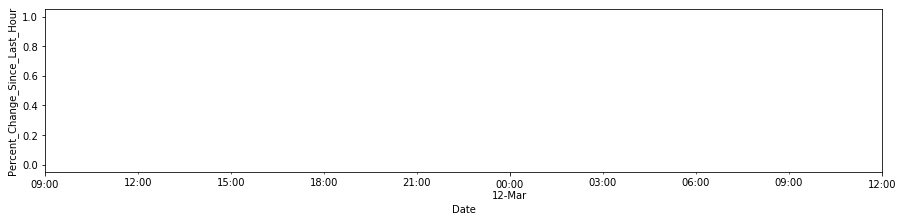

American Samoa


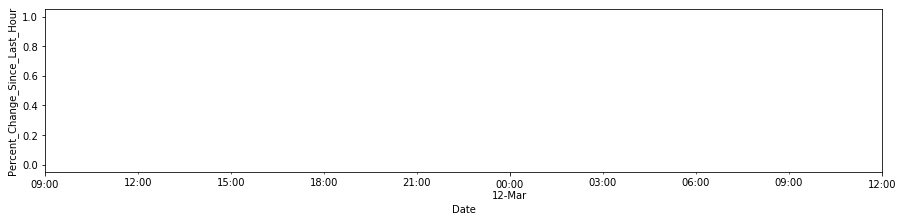

Arkansas


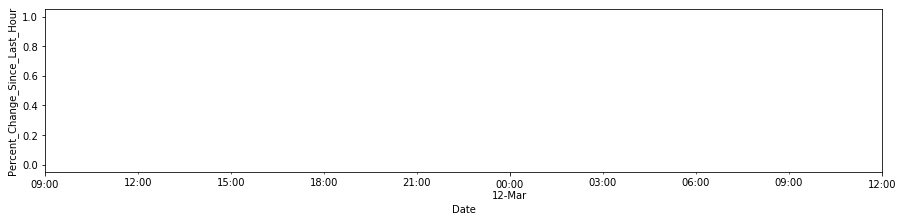

Canberra (ACT)


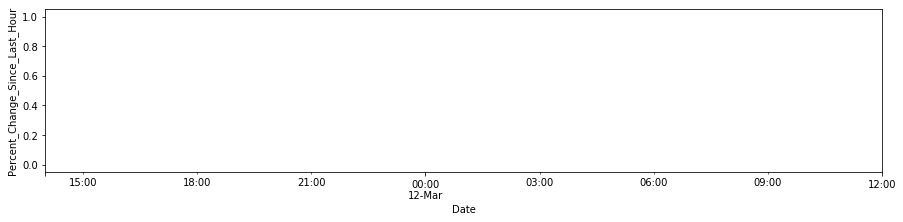

Delaware


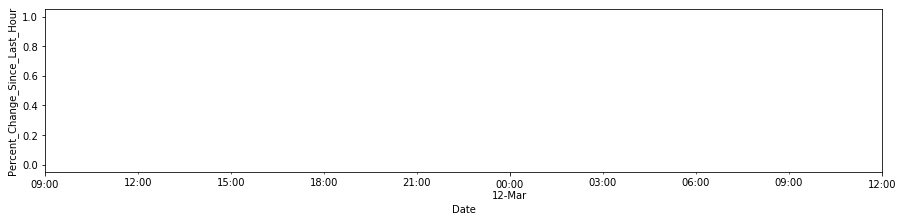

External territories


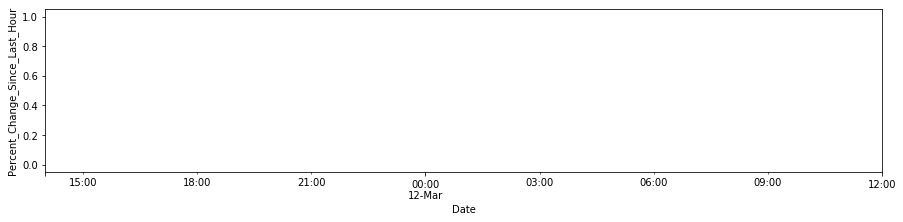

Guam


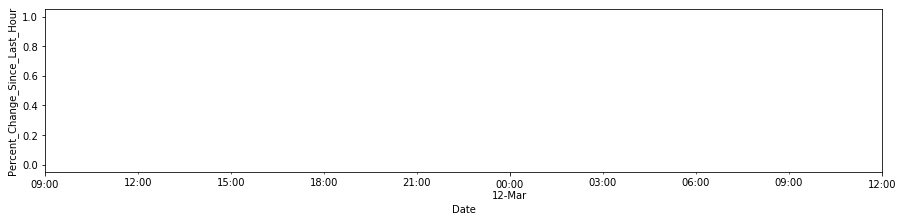

Idaho


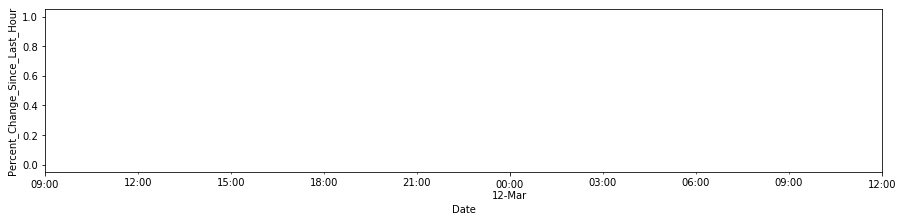

Jervis Bay Territory


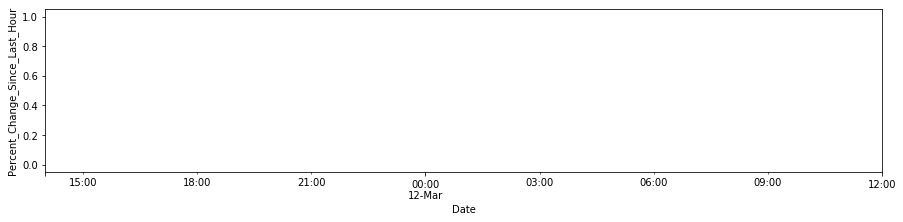

Maine


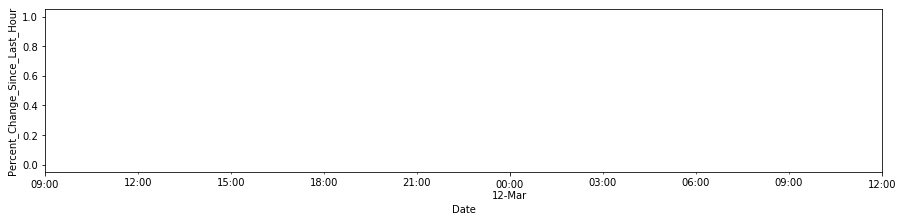

Manitoba


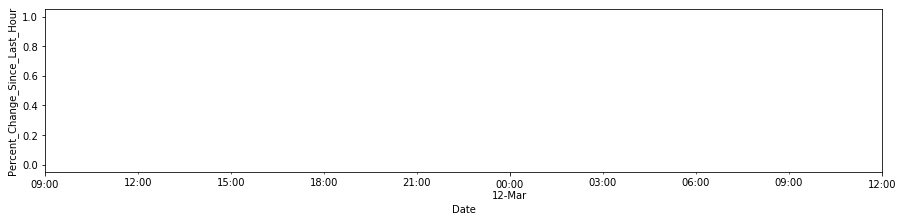

Montana


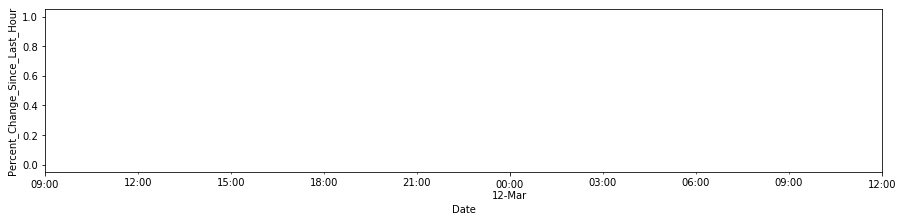

New Brunswick


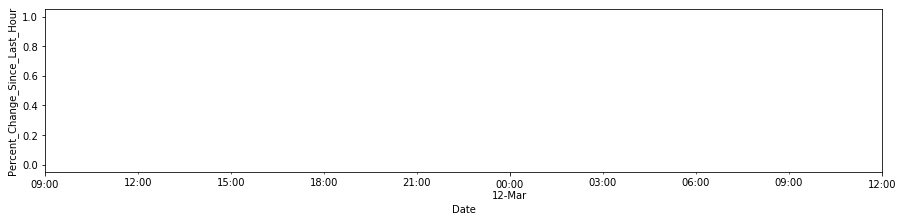

New Mexico


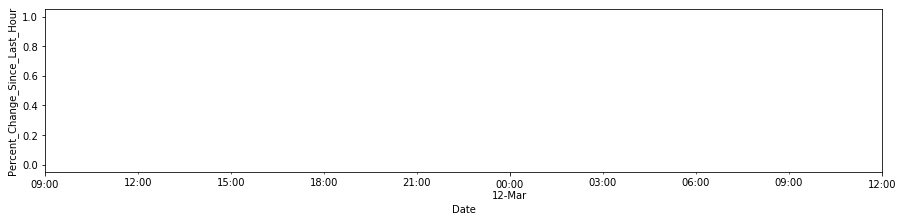

Newfoundland & Labrador


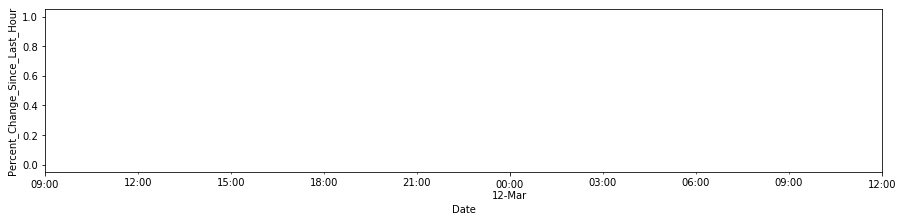

North Dakota


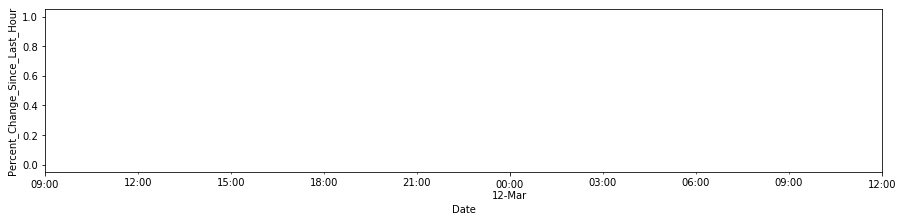

Northern Mariana Islands


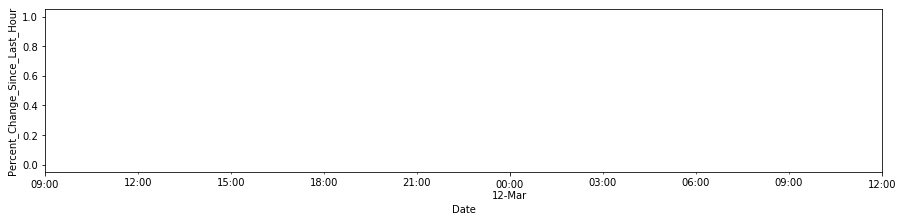

Northwest Territories


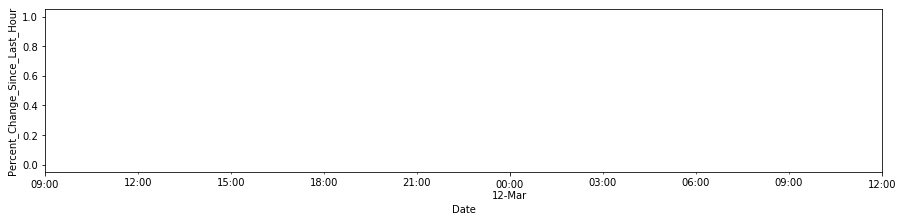

Nova Scotia


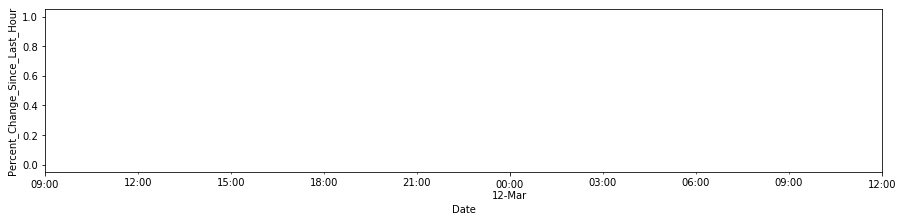

Nunavut


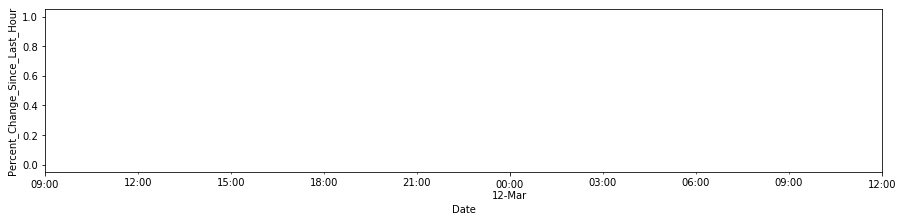

Prince Edward Island


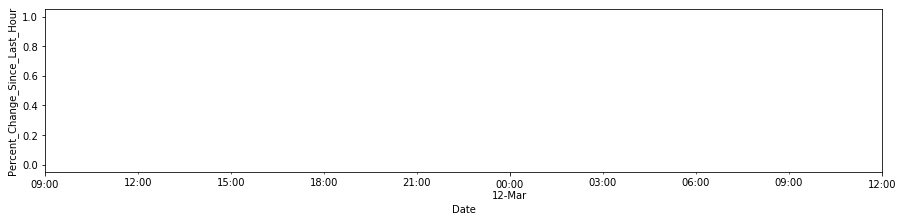

Puerto Rico


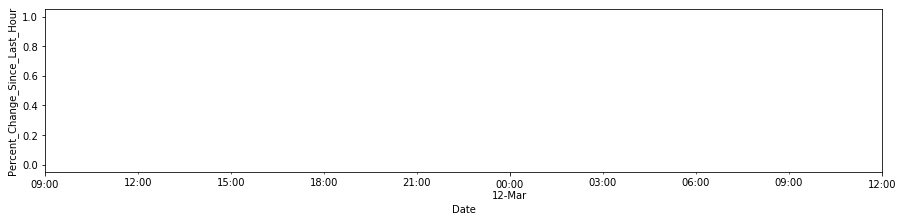

Saskatchewan


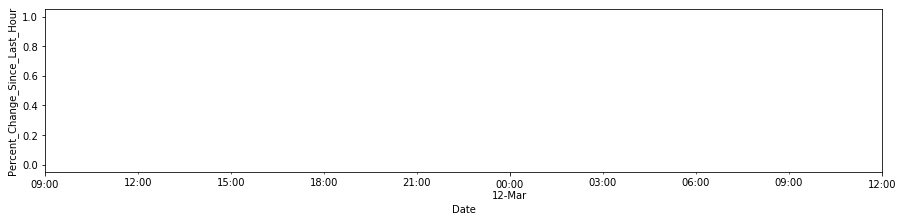

U.S. Virgin Islands


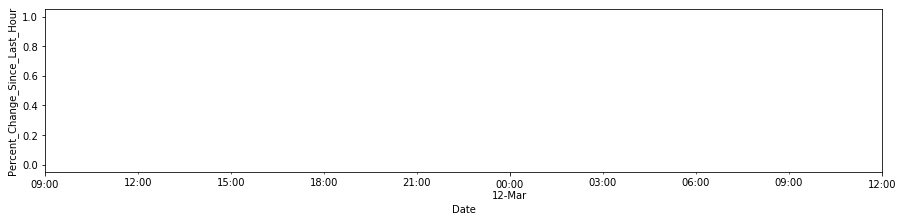

West Virginia


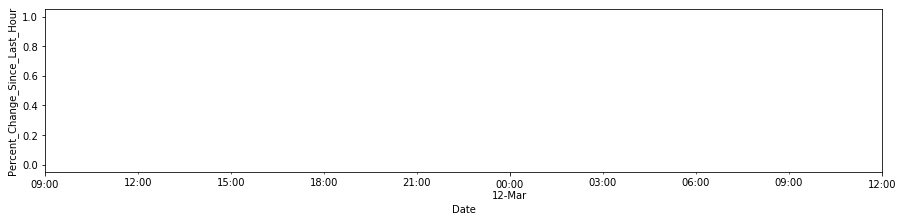

Wyoming


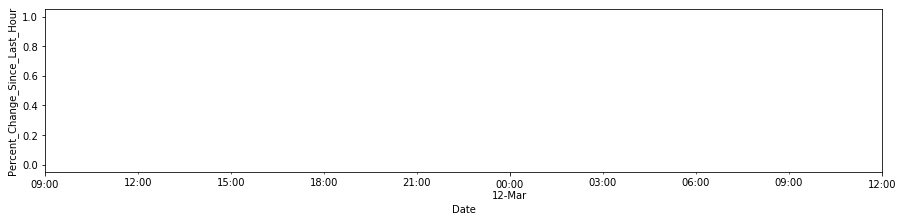

Yukon


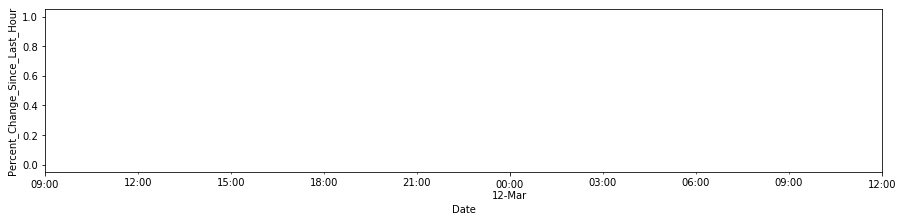

In [9]:
key = 'Percent_Change_Since_Last_Hour'
for region in df.sort_values(key, ascending=False)['Region'].unique():
    plt.figure(figsize=(15,3))
    print(region)
    display(df[df.Region == region][key].plot() ) ;
    plt.ylabel(key)
    plt.show();